In [715]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.2f}'.format   
#!pip install imblearn

In [716]:
credit = pd.read_excel('Company_Data2015.xlsx')

In [717]:
credit.head()

,Co_Code,Co_Name,Networth Next Year,Equity Paid Up,Networth,Capital Employed,Total Debt,Gross Block,Net Working Capital,Current Assets,Current Liabilities and Provisions,Total Assets/Liabilities,Gross Sales,Net Sales,Other Income,Value Of Output,Cost of Production,Selling Cost,PBIDT,PBDT,PBIT,PBT,PAT,Adjusted PAT,CP,Revenue earnings in forex,Revenue expenses in forex,Capital expenses in forex,Book Value (Unit Curr),Book Value (Adj.) (Unit Curr),Market Capitalisation,CEPS (annualised) (Unit Curr),Cash Flow From Operating Activities,Cash Flow From Investing Activities,Cash Flow From Financing Activities,ROG-Net Worth (%),ROG-Capital Employed (%),ROG-Gross Block (%),ROG-Gross Sales (%),ROG-Net Sales (%),ROG-Cost of Production (%),ROG-Total Assets (%),ROG-PBIDT (%),ROG-PBDT (%),ROG-PBIT (%),ROG-PBT (%),ROG-PAT (%),ROG-CP (%),ROG-Revenue earnings in forex (%),ROG-Revenue expenses in forex (%),ROG-Market Capitalisation (%),Current Ratio[Latest],Fixed Assets Ratio[Latest],Inventory Ratio[Latest],Debtors Ratio[Latest],Total Asset Turnover Ratio[Latest],Interest Cover Ratio[Latest],PBIDTM (%)[Latest],PBITM (%)[Latest],PBDTM (%)[Latest],CPM (%)[Latest],APATM (%)[Latest],Debtors Velocity (Days),Creditors Velocity (Days),Inventory Velocity (Days),Value of Output/Total Assets,Value of Output/Gross Block
0,16974,Hind.Cables,-8021.60,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,1116.85,109.60,0.00,0.00,7.60,-0.07,137.67,0.00,-179.06,-926.52,-185.53,-932.99,-932.99,-937.85,-926.52,0.00,0.00,0.00,-167.58,-167.58,0.00,-22.09,-102.47,1.46,92.58,-15.31,-20.76,-9.75,0.00,0.00,1.38,-25.75,5.23,-19.29,4.43,-19.33,-19.33,-19.29,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,-0.20,0.00,0.00,0.00,0.00,0.00,0,0,45.00,0.00,0.00
1,21214,Tata Tele. Mah.,-3986.19,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,1585.74,6043.94,2892.73,2892.73,46.27,2900.71,2572.46,40.51,646.46,-4.32,35.53,-615.25,-615.25,-617.14,-4.32,6.35,143.42,141.17,-15.18,-15.18,1544.39,-0.02,635.91,-785.00,176.93,-26.15,6.30,3.17,5.92,5.92,13.16,6.66,5.24,-108.77,614.89,-9.85,-9.85,-108.77,1.93,34.00,6.61,0.08,0.25,804.44,10.35,0.30,-0.84,-10.30,-39.74,-57.74,-57.74,-87.18,29,101,2.00,0.31,0.24
2,14852,ABG Shipyard,-3192.58,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,4601.39,12316.07,392.13,392.13,9.55,301.16,408.51,54.83,-281.92,-1086.71,-381.10,-1185.89,-897.70,-873.39,-798.52,0.00,86.36,2.27,94.14,94.14,1220.81,-148.31,-873.40,-458.27,1187.51,-61.86,15.66,-2.07,-75.87,-75.87,-69.93,-0.78,-169.69,-431.68,-221.85,-300.41,-350.43,-642.67,-100.00,-81.21,-6.31,1.06,0.03,0.01,0.42,0.00,-2.21,-5279.14,-5516.98,-7780.25,-7723.67,-7961.51,97,558,0.00,-0.03,-0.26
3,2439,GTL,-3054.51,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,3646.54,6000.42,1354.39,1354.39,223.85,1350.14,1326.99,3.34,-213.01,-677.57,-336.73,-801.29,-801.29,-770.18,-677.57,0.89,28.88,0.00,-39.64,-39.64,194.27,-43.08,324.47,17.31,-412.55,-450.67,-40.84,-1.80,8.33,8.33,16.59,-10.12,-203.84,-102.72,-455.28,-80.23,-70.57,-88.52,-52.91,-33.85,-13.94,0.09,5.08,411.15,9.26,0.00,-0.16,-3.33,-7.21,-48.13,-47.70,-51.58,93,63,2.00,0.24,1.90
4,23505,Bharati Defence,-2967.36,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,2849.58,7524.91,38.72,38.72,9.82,38.72,186.29,1.97,-647.86,-944.42,-710.13,-1006.69,-864.58,-327.77,-802.31,0.00,15.62,0.00,-212.89,-212.89,113.68,-159.50,-191.54,61.34,143.65,-559.83,-11.76,0.34,-80.61,-80.61,-48.80,-5.81,-40.07,3.28,-38.72,1.87,-2.59,-1.13,-100.00,-91.17,-12.91,0.50,0.05,0.02,1.28,0.01,-0.73,-295.55,-400.55,-845.88,379.79,274.79,3887,346,0.00,0.01,0.05


In [718]:
column_indices = [2,3,5,6,7,8,9,10,11,12,13,14,15,16,17,23,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66]
new_names = ['Networth_Next_Year','Equity_Paid_Up','Capital_Employed','Total_Debt','Gross_Block','Net_Working_Capital','Curr_Assets','Curr_Liab_and_Prov','Total_Assets_to_Liab','Gross_Sales','Net_Sales','Other_Income','Value_Of_Output','Cost_of_Prod','Selling_Cost','Adjusted_PAT','Rev_earn_in_forex','Rev_exp_in_forex','Capital_exp_in_forex','Book_Value_Unit_Curr','Book_Value_Adj_Unit_Curr','Market_Capitalisation','CEPS_annualised_Unit_Curr','Cash_Flow_From_Opr','Cash_Flow_From_Inv','Cash_Flow_From_Fin','ROG_Net_Worth_perc','ROG_Capital_Employed_perc','ROG_Gross_Block_perc','ROG_Gross_Sales_perc','ROG_Net_Sales_perc','ROG_Cost_of_Prod_perc','ROG_Total_Assets_perc','ROG_PBIDT_perc','ROG_PBDT_perc','ROG_PBIT_perc','ROG_PBT_perc','ROG_PAT_perc','ROG_CP_perc','ROG_Rev_earn_in_forex_perc','ROG_Rev_exp_in_forex_perc','ROG_Market_Capitalisation_perc','Curr_Ratio_Latest','Fixed_Assets_Ratio_Latest','Inventory_Ratio_Latest','Debtors_Ratio_Latest','Total_Asset_Turnover_Ratio_Latest','Interest_Cover_Ratio_Latest','PBIDTM_perc_Latest','PBITM_perc_Latest','PBDTM_perc_Latest','CPM_perc_Latest','APATM_perc_Latest','Debtors_Vel_Days','Creditors_Vel_Days','Inventory_Vel_Days','Value_of_Output_to_Total_Assets','Value_of_Output_to_Gross_Block']
old_names = credit.columns[column_indices]
credit.rename(columns=dict(zip(old_names, new_names)), inplace=True)

In [719]:
credit

,Co_Code,Co_Name,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block,Net_Working_Capital,Curr_Assets,Curr_Liab_and_Prov,Total_Assets_to_Liab,Gross_Sales,Net_Sales,Other_Income,Value_Of_Output,Cost_of_Prod,Selling_Cost,PBIDT,PBDT,PBIT,PBT,PAT,Adjusted_PAT,CP,Rev_earn_in_forex,Rev_exp_in_forex,Capital_exp_in_forex,Book_Value_Unit_Curr,Book_Value_Adj_Unit_Curr,Market_Capitalisation,CEPS_annualised_Unit_Curr,Cash_Flow_From_Opr,Cash_Flow_From_Inv,Cash_Flow_From_Fin,ROG_Net_Worth_perc,ROG_Capital_Employed_perc,ROG_Gross_Block_perc,ROG_Gross_Sales_perc,ROG_Net_Sales_perc,ROG_Cost_of_Prod_perc,ROG_Total_Assets_perc,ROG_PBIDT_perc,ROG_PBDT_perc,ROG_PBIT_perc,ROG_PBT_perc,ROG_PAT_perc,ROG_CP_perc,ROG_Rev_earn_in_forex_perc,ROG_Rev_exp_in_forex_perc,ROG_Market_Capitalisation_perc,Curr_Ratio_Latest,Fixed_Assets_Ratio_Latest,Inventory_Ratio_Latest,Debtors_Ratio_Latest,Total_Asset_Turnover_Ratio_Latest,Interest_Cover_Ratio_Latest,PBIDTM_perc_Latest,PBITM_perc_Latest,PBDTM_perc_Latest,CPM_perc_Latest,APATM_perc_Latest,Debtors_Vel_Days,Creditors_Vel_Days,Inventory_Vel_Days,Value_of_Output_to_Total_Assets,Value_of_Output_to_Gross_Block
0,16974,Hind.Cables,-8021.60,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,1116.85,109.60,0.00,0.00,7.60,-0.07,137.67,0.00,-179.06,-926.52,-185.53,-932.99,-932.99,-937.85,-926.52,0.00,0.00,0.00,-167.58,-167.58,0.00,-22.09,-102.47,1.46,92.58,-15.31,-20.76,-9.75,0.00,0.00,1.38,-25.75,5.23,-19.29,4.43,-19.33,-19.33,-19.29,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,-0.20,0.00,0.00,0.00,0.00,0.00,0,0,45.00,0.00,0.00
1,21214,Tata Tele. Mah.,-3986.19,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,1585.74,6043.94,2892.73,2892.73,46.27,2900.71,2572.46,40.51,646.46,-4.32,35.53,-615.25,-615.25,-617.14,-4.32,6.35,143.42,141.17,-15.18,-15.18,1544.39,-0.02,635.91,-785.00,176.93,-26.15,6.30,3.17,5.92,5.92,13.16,6.66,5.24,-108.77,614.89,-9.85,-9.85,-108.77,1.93,34.00,6.61,0.08,0.25,804.44,10.35,0.30,-0.84,-10.30,-39.74,-57.74,-57.74,-87.18,29,101,2.00,0.31,0.24
2,14852,ABG Shipyard,-3192.58,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,4601.39,12316.07,392.13,392.13,9.55,301.16,408.51,54.83,-281.92,-1086.71,-381.10,-1185.89,-897.70,-873.39,-798.52,0.00,86.36,2.27,94.14,94.14,1220.81,-148.31,-873.40,-458.27,1187.51,-61.86,15.66,-2.07,-75.87,-75.87,-69.93,-0.78,-169.69,-431.68,-221.85,-300.41,-350.43,-642.67,-100.00,-81.21,-6.31,1.06,0.03,0.01,0.42,0.00,-2.21,-5279.14,-5516.98,-7780.25,-7723.67,-7961.51,97,558,0.00,-0.03,-0.26
3,2439,GTL,-3054.51,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,3646.54,6000.42,1354.39,1354.39,223.85,1350.14,1326.99,3.34,-213.01,-677.57,-336.73,-801.29,-801.29,-770.18,-677.57,0.89,28.88,0.00,-39.64,-39.64,194.27,-43.08,324.47,17.31,-412.55,-450.67,-40.84,-1.80,8.33,8.33,16.59,-10.12,-203.84,-102.72,-455.28,-80.23,-70.57,-88.52,-52.91,-33.85,-13.94,0.09,5.08,411.15,9.26,0.00,-0.16,-3.33,-7.21,-48.13,-47.70,-51.58,93,63,2.00,0.24,1.90
4,23505,Bharati Defence,-2967.36,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,2849.58,7524.91,38.72,38.72,9.82,38.72,186.29,1.97,-647.86,-944.42,-710.13,-1006.69,-864.58,-327.77,-802.31,0.00,15.62,0.00,-212.89,-212.89,113.68,-159.50,-191.54,61.34,143.65,-559.83,-11.76,0.34,-80.61,-80.61,-48.80,-5.81,-40.07,3.28,-38.72,1.87,-2.59,-1.13,-100.00,-91.17,-12.91,0.50,0.05,0.02,1.28,0.01,-0.73,-295.55,-400.55,-845.88,379.79,274.79,3887,346,0.00,0.01,0.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3581,4987,HDFC Bank,72677.77,501.30,62009.42,590576.00,496009.19,8463.30,0.00,444633.50,32557.39,94566.81,48469.90,48469.90,8996.35,48469.90,6705.18,187.47,42059.26,15985.02,41402.96,15328.72,10215.92,10208.55,10872.22,0.00,0.00,0.00,247.39,247.39,256376.88,41.75,-15862.27,-1933.36,14543.4

In [720]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 67 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Co_Code                            3586 non-null   int64  
 1   Co_Name                            3586 non-null   object 
 2   Networth_Next_Year                 3586 non-null   float64
 3   Equity_Paid_Up                     3586 non-null   float64
 4   Networth                           3586 non-null   float64
 5   Capital_Employed                   3586 non-null   float64
 6   Total_Debt                         3586 non-null   float64
 7   Gross_Block                        3586 non-null   float64
 8   Net_Working_Capital                3586 non-null   float64
 9   Curr_Assets                        3586 non-null   float64
 10  Curr_Liab_and_Prov                 3586 non-null   float64
 11  Total_Assets_to_Liab               3586 non-null   float

In [721]:
credit.isnull().sum()

Co_Code                              0
Co_Name                              0
Networth_Next_Year                   0
Equity_Paid_Up                       0
Networth                             0
                                  ... 
Debtors_Vel_Days                     0
Creditors_Vel_Days                   0
Inventory_Vel_Days                 103
Value_of_Output_to_Total_Assets      0
Value_of_Output_to_Gross_Block       0
Length: 67, dtype: int64

In [722]:
credit.isnull().sum().sum()

118

In [723]:
credit['Inventory_Vel_Days'].head(30)

0     45.00
1      2.00
2      0.00
3      2.00
4      0.00
5      0.00
6    392.00
7    799.00
8      2.00
9     62.00
10     5.00
11    66.00
12   220.00
13     3.00
14    81.00
15    54.00
16     0.00
17   127.00
18     0.00
19     0.00
20   193.00
21   322.00
22   421.00
23   539.00
24      nan
25     0.00
26     0.00
27   103.00
28    19.00
29   350.00
Name: Inventory_Vel_Days, dtype: float64

In [724]:
credit.duplicated().sum()

0

In [725]:
print('The number of rows (observations) is',credit.shape[0],'\n''The number of columns (variables) is',credit.shape[1])

The number of rows (observations) is 3586 
The number of columns (variables) is 67


In [726]:
credit.describe()

,Co_Code,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block,Net_Working_Capital,Curr_Assets,Curr_Liab_and_Prov,Total_Assets_to_Liab,Gross_Sales,Net_Sales,Other_Income,Value_Of_Output,Cost_of_Prod,Selling_Cost,PBIDT,PBDT,PBIT,PBT,PAT,Adjusted_PAT,CP,Rev_earn_in_forex,Rev_exp_in_forex,Capital_exp_in_forex,Book_Value_Unit_Curr,Book_Value_Adj_Unit_Curr,Market_Capitalisation,CEPS_annualised_Unit_Curr,Cash_Flow_From_Opr,Cash_Flow_From_Inv,Cash_Flow_From_Fin,ROG_Net_Worth_perc,ROG_Capital_Employed_perc,ROG_Gross_Block_perc,ROG_Gross_Sales_perc,ROG_Net_Sales_perc,ROG_Cost_of_Prod_perc,ROG_Total_Assets_perc,ROG_PBIDT_perc,ROG_PBDT_perc,ROG_PBIT_perc,ROG_PBT_perc,ROG_PAT_perc,ROG_CP_perc,ROG_Rev_earn_in_forex_perc,ROG_Rev_exp_in_forex_perc,ROG_Market_Capitalisation_perc,Curr_Ratio_Latest,Fixed_Assets_Ratio_Latest,Inventory_Ratio_Latest,Debtors_Ratio_Latest,Total_Asset_Turnover_Ratio_Latest,Interest_Cover_Ratio_Latest,PBIDTM_perc_Latest,PBITM_perc_Latest,PBDTM_perc_Latest,CPM_perc_Latest,APATM_perc_Latest,Debtors_Vel_Days,Creditors_Vel_Days,Inventory_Vel_Days,Value_of_Output_to_Total_Assets,Value_of_Output_to_Gross_Block
count,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3582.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3585.00,3585.00,3585.00,3585.00,3585.00,3585.00,3585.00,3585.00,3585.00,3585.00,3585.00,3586.00,3586.00,3483.00,3586.00,3586.00
mean,16065.39,725.05,62.97,649.75,2799.61,1994.82,594.18,410.81,1960.35,391.99,1778.45,1123.74,1079.70,48.73,1077.19,798.54,25.55,248.18,116.27,217.66,85.75,61.22,60.06,91.73,131.17,256.33,7.66,157.24,2243.15,1664.09,36.02,65.77,-60.87,11.44,1237.62,2988.88,37.55,242.67,242.59,310.49,2793.28,375.85,336.38,374.70,224.07,112.23,221.09,37.23,364.86,63.68,12.06,51.54,37.80,33.03,1.24,16.39,-51.16,-109.21,-311.57,-307.01,-365.06,603.89,2057.85,79.64,0.82,61.88
std,19776.82,4769.68,778.76,4091.99,26975.14,23652.84,4871.55,6301.22,22577.57,2675.00,11437.57,10603.70,9996.57,426.04,9843.88,9076.70,194.24,1949.59,956.20,1850.97,799.93,620.30,580.43,780.79,1150.73,4132.34,111.43,1622.66,128283.73,12805.17,828.42,1455.05,701.97,1272.26,41041.93,126472.87,893.62,6103.53,6103.49,5573.22,125941.65,23278.40,20353.40,22462.79,19659.23,13480.52,13980.20,658.67,15233.64,1047.93,108.41,681.15,458.19,489.56,2.67,351.74,1795.13,3057.64,10921.59,10676.15,12500.05,10636.76,54169.48,137.85,1.20,976.82
min,4.00,-8021.60,0.00,-7027.48,-1824.75,-0.72,-41.19,-13162.42,-0.91,-0.23,-4.51,-62.59,-62.59,-448.72,-119.10,-22.65,0.00,-4655.14,-5874.53,-4812.95,-6032.34,-6032.34,-4418.72,-5874.53,0.00,0.00,0.00,-3371.57,-33715.70,0.00,-1808.00,-25469.23,-23843.45,-38374.04,-14485.71,-8614.63,-116.12,-5503.70,-5503.70,-2130.23,-136.13,-52200.00,-52200.00,-58500.00,-78900.00,-114500.00,-52200.00,-100.00,-100.00,-98.05,0.00,0.00,0.00,0.00,0.00,-5450.00,-78870.45,-141600.00,-590500.00,-572000.00,-688600.00,0.00,0.00,-199.00,-0.33,-61.00
25%,3029.25,3.98,3.75,3.89,7.60,0.03,0.57,0.94,4.00,0.73,10.55,1.44,1.44,0.02,1.41,0.94,0.00,0.04,0.00,0.00,-0.06,-0.06,-0.09,0.00,0.00,0.00,0.00,7.96,7.06,0.00,0.00,-0.31,-5.12,-5.85,-1.49,-3.83,0.00,-8.08,-8.12,-7.24,-3.97,-23.36,-30.60,-31.35,-41.23,-43.73,-29.50,0.00,0.00,0.00,0.88,0.27,0.00,0.42,0.07,0.00,0.00,0.00,0.00,0.00,0.00,8.00,8.00,0.00,0.07,0.27
50%,6077.50,19.02,8.29,18.58,39.09,7.49,15.87,10.14,24.54,9.23,52.01,31.21,30.44,0.45,30.89,25.99,0.16,2.04,0.80,1.15,0.31,0.26,0.21,0.74,0.00,0.00,0.00,21.66,18.93,8.37,1.15,0.45,-0.12,0.00,1.84,1.38,0.25,3.31,3.21,4.42,1.48,4.57,3.37,2.13,0.03,0.00,4.62,0.00,0.00,0.00,1.36,1.56,3.56,3.82,0.60,1.08,8.07,5.23,4.69,3.89,1.59,49.00,39.00,35.00,0.48,1.53
75%,24269.50,123.80,19.52,117.30,226.61,72.35,131.90,61.17,135.28,65

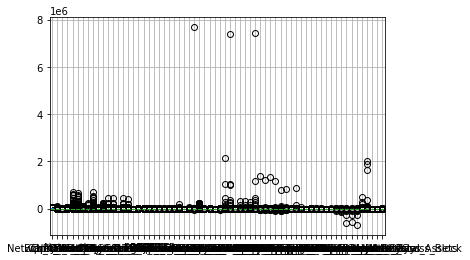

In [727]:
credit.boxplot()

In [728]:
credit = credit.drop('Co_Name',axis=1)
credit.head()

,Co_Code,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block,Net_Working_Capital,Curr_Assets,Curr_Liab_and_Prov,Total_Assets_to_Liab,Gross_Sales,Net_Sales,Other_Income,Value_Of_Output,Cost_of_Prod,Selling_Cost,PBIDT,PBDT,PBIT,PBT,PAT,Adjusted_PAT,CP,Rev_earn_in_forex,Rev_exp_in_forex,Capital_exp_in_forex,Book_Value_Unit_Curr,Book_Value_Adj_Unit_Curr,Market_Capitalisation,CEPS_annualised_Unit_Curr,Cash_Flow_From_Opr,Cash_Flow_From_Inv,Cash_Flow_From_Fin,ROG_Net_Worth_perc,ROG_Capital_Employed_perc,ROG_Gross_Block_perc,ROG_Gross_Sales_perc,ROG_Net_Sales_perc,ROG_Cost_of_Prod_perc,ROG_Total_Assets_perc,ROG_PBIDT_perc,ROG_PBDT_perc,ROG_PBIT_perc,ROG_PBT_perc,ROG_PAT_perc,ROG_CP_perc,ROG_Rev_earn_in_forex_perc,ROG_Rev_exp_in_forex_perc,ROG_Market_Capitalisation_perc,Curr_Ratio_Latest,Fixed_Assets_Ratio_Latest,Inventory_Ratio_Latest,Debtors_Ratio_Latest,Total_Asset_Turnover_Ratio_Latest,Interest_Cover_Ratio_Latest,PBIDTM_perc_Latest,PBITM_perc_Latest,PBDTM_perc_Latest,CPM_perc_Latest,APATM_perc_Latest,Debtors_Vel_Days,Creditors_Vel_Days,Inventory_Vel_Days,Value_of_Output_to_Total_Assets,Value_of_Output_to_Gross_Block
0,16974,-8021.60,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,1116.85,109.60,0.00,0.00,7.60,-0.07,137.67,0.00,-179.06,-926.52,-185.53,-932.99,-932.99,-937.85,-926.52,0.00,0.00,0.00,-167.58,-167.58,0.00,-22.09,-102.47,1.46,92.58,-15.31,-20.76,-9.75,0.00,0.00,1.38,-25.75,5.23,-19.29,4.43,-19.33,-19.33,-19.29,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,-0.20,0.00,0.00,0.00,0.00,0.00,0,0,45.00,0.00,0.00
1,21214,-3986.19,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,1585.74,6043.94,2892.73,2892.73,46.27,2900.71,2572.46,40.51,646.46,-4.32,35.53,-615.25,-615.25,-617.14,-4.32,6.35,143.42,141.17,-15.18,-15.18,1544.39,-0.02,635.91,-785.00,176.93,-26.15,6.30,3.17,5.92,5.92,13.16,6.66,5.24,-108.77,614.89,-9.85,-9.85,-108.77,1.93,34.00,6.61,0.08,0.25,804.44,10.35,0.30,-0.84,-10.30,-39.74,-57.74,-57.74,-87.18,29,101,2.00,0.31,0.24
2,14852,-3192.58,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,4601.39,12316.07,392.13,392.13,9.55,301.16,408.51,54.83,-281.92,-1086.71,-381.10,-1185.89,-897.70,-873.39,-798.52,0.00,86.36,2.27,94.14,94.14,1220.81,-148.31,-873.40,-458.27,1187.51,-61.86,15.66,-2.07,-75.87,-75.87,-69.93,-0.78,-169.69,-431.68,-221.85,-300.41,-350.43,-642.67,-100.00,-81.21,-6.31,1.06,0.03,0.01,0.42,0.00,-2.21,-5279.14,-5516.98,-7780.25,-7723.67,-7961.51,97,558,0.00,-0.03,-0.26
3,2439,-3054.51,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,3646.54,6000.42,1354.39,1354.39,223.85,1350.14,1326.99,3.34,-213.01,-677.57,-336.73,-801.29,-801.29,-770.18,-677.57,0.89,28.88,0.00,-39.64,-39.64,194.27,-43.08,324.47,17.31,-412.55,-450.67,-40.84,-1.80,8.33,8.33,16.59,-10.12,-203.84,-102.72,-455.28,-80.23,-70.57,-88.52,-52.91,-33.85,-13.94,0.09,5.08,411.15,9.26,0.00,-0.16,-3.33,-7.21,-48.13,-47.70,-51.58,93,63,2.00,0.24,1.90
4,23505,-2967.36,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,2849.58,7524.91,38.72,38.72,9.82,38.72,186.29,1.97,-647.86,-944.42,-710.13,-1006.69,-864.58,-327.77,-802.31,0.00,15.62,0.00,-212.89,-212.89,113.68,-159.50,-191.54,61.34,143.65,-559.83,-11.76,0.34,-80.61,-80.61,-48.80,-5.81,-40.07,3.28,-38.72,1.87,-2.59,-1.13,-100.00,-91.17,-12.91,0.50,0.05,0.02,1.28,0.01,-0.73,-295.55,-400.55,-845.88,379.79,274.79,3887,346,0.00,0.01,0.05


In [729]:
credit_df = credit.copy()
credit_df.head()

,Co_Code,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block,Net_Working_Capital,Curr_Assets,Curr_Liab_and_Prov,Total_Assets_to_Liab,Gross_Sales,Net_Sales,Other_Income,Value_Of_Output,Cost_of_Prod,Selling_Cost,PBIDT,PBDT,PBIT,PBT,PAT,Adjusted_PAT,CP,Rev_earn_in_forex,Rev_exp_in_forex,Capital_exp_in_forex,Book_Value_Unit_Curr,Book_Value_Adj_Unit_Curr,Market_Capitalisation,CEPS_annualised_Unit_Curr,Cash_Flow_From_Opr,Cash_Flow_From_Inv,Cash_Flow_From_Fin,ROG_Net_Worth_perc,ROG_Capital_Employed_perc,ROG_Gross_Block_perc,ROG_Gross_Sales_perc,ROG_Net_Sales_perc,ROG_Cost_of_Prod_perc,ROG_Total_Assets_perc,ROG_PBIDT_perc,ROG_PBDT_perc,ROG_PBIT_perc,ROG_PBT_perc,ROG_PAT_perc,ROG_CP_perc,ROG_Rev_earn_in_forex_perc,ROG_Rev_exp_in_forex_perc,ROG_Market_Capitalisation_perc,Curr_Ratio_Latest,Fixed_Assets_Ratio_Latest,Inventory_Ratio_Latest,Debtors_Ratio_Latest,Total_Asset_Turnover_Ratio_Latest,Interest_Cover_Ratio_Latest,PBIDTM_perc_Latest,PBITM_perc_Latest,PBDTM_perc_Latest,CPM_perc_Latest,APATM_perc_Latest,Debtors_Vel_Days,Creditors_Vel_Days,Inventory_Vel_Days,Value_of_Output_to_Total_Assets,Value_of_Output_to_Gross_Block
0,16974,-8021.60,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,1116.85,109.60,0.00,0.00,7.60,-0.07,137.67,0.00,-179.06,-926.52,-185.53,-932.99,-932.99,-937.85,-926.52,0.00,0.00,0.00,-167.58,-167.58,0.00,-22.09,-102.47,1.46,92.58,-15.31,-20.76,-9.75,0.00,0.00,1.38,-25.75,5.23,-19.29,4.43,-19.33,-19.33,-19.29,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,-0.20,0.00,0.00,0.00,0.00,0.00,0,0,45.00,0.00,0.00
1,21214,-3986.19,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,1585.74,6043.94,2892.73,2892.73,46.27,2900.71,2572.46,40.51,646.46,-4.32,35.53,-615.25,-615.25,-617.14,-4.32,6.35,143.42,141.17,-15.18,-15.18,1544.39,-0.02,635.91,-785.00,176.93,-26.15,6.30,3.17,5.92,5.92,13.16,6.66,5.24,-108.77,614.89,-9.85,-9.85,-108.77,1.93,34.00,6.61,0.08,0.25,804.44,10.35,0.30,-0.84,-10.30,-39.74,-57.74,-57.74,-87.18,29,101,2.00,0.31,0.24
2,14852,-3192.58,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,4601.39,12316.07,392.13,392.13,9.55,301.16,408.51,54.83,-281.92,-1086.71,-381.10,-1185.89,-897.70,-873.39,-798.52,0.00,86.36,2.27,94.14,94.14,1220.81,-148.31,-873.40,-458.27,1187.51,-61.86,15.66,-2.07,-75.87,-75.87,-69.93,-0.78,-169.69,-431.68,-221.85,-300.41,-350.43,-642.67,-100.00,-81.21,-6.31,1.06,0.03,0.01,0.42,0.00,-2.21,-5279.14,-5516.98,-7780.25,-7723.67,-7961.51,97,558,0.00,-0.03,-0.26
3,2439,-3054.51,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,3646.54,6000.42,1354.39,1354.39,223.85,1350.14,1326.99,3.34,-213.01,-677.57,-336.73,-801.29,-801.29,-770.18,-677.57,0.89,28.88,0.00,-39.64,-39.64,194.27,-43.08,324.47,17.31,-412.55,-450.67,-40.84,-1.80,8.33,8.33,16.59,-10.12,-203.84,-102.72,-455.28,-80.23,-70.57,-88.52,-52.91,-33.85,-13.94,0.09,5.08,411.15,9.26,0.00,-0.16,-3.33,-7.21,-48.13,-47.70,-51.58,93,63,2.00,0.24,1.90
4,23505,-2967.36,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,2849.58,7524.91,38.72,38.72,9.82,38.72,186.29,1.97,-647.86,-944.42,-710.13,-1006.69,-864.58,-327.77,-802.31,0.00,15.62,0.00,-212.89,-212.89,113.68,-159.50,-191.54,61.34,143.65,-559.83,-11.76,0.34,-80.61,-80.61,-48.80,-5.81,-40.07,3.28,-38.72,1.87,-2.59,-1.13,-100.00,-91.17,-12.91,0.50,0.05,0.02,1.28,0.01,-0.73,-295.55,-400.55,-845.88,379.79,274.79,3887,346,0.00,0.01,0.05


## Missing Value Treatment

In [730]:
credit.interpolate(method='linear', direction = 'forward', inplace=True) 
credit.head(10)

,Co_Code,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block,Net_Working_Capital,Curr_Assets,Curr_Liab_and_Prov,Total_Assets_to_Liab,Gross_Sales,Net_Sales,Other_Income,Value_Of_Output,Cost_of_Prod,Selling_Cost,PBIDT,PBDT,PBIT,PBT,PAT,Adjusted_PAT,CP,Rev_earn_in_forex,Rev_exp_in_forex,Capital_exp_in_forex,Book_Value_Unit_Curr,Book_Value_Adj_Unit_Curr,Market_Capitalisation,CEPS_annualised_Unit_Curr,Cash_Flow_From_Opr,Cash_Flow_From_Inv,Cash_Flow_From_Fin,ROG_Net_Worth_perc,ROG_Capital_Employed_perc,ROG_Gross_Block_perc,ROG_Gross_Sales_perc,ROG_Net_Sales_perc,ROG_Cost_of_Prod_perc,ROG_Total_Assets_perc,ROG_PBIDT_perc,ROG_PBDT_perc,ROG_PBIT_perc,ROG_PBT_perc,ROG_PAT_perc,ROG_CP_perc,ROG_Rev_earn_in_forex_perc,ROG_Rev_exp_in_forex_perc,ROG_Market_Capitalisation_perc,Curr_Ratio_Latest,Fixed_Assets_Ratio_Latest,Inventory_Ratio_Latest,Debtors_Ratio_Latest,Total_Asset_Turnover_Ratio_Latest,Interest_Cover_Ratio_Latest,PBIDTM_perc_Latest,PBITM_perc_Latest,PBDTM_perc_Latest,CPM_perc_Latest,APATM_perc_Latest,Debtors_Vel_Days,Creditors_Vel_Days,Inventory_Vel_Days,Value_of_Output_to_Total_Assets,Value_of_Output_to_Gross_Block
0,16974,-8021.60,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,1116.85,109.60,0.00,0.00,7.60,-0.07,137.67,0.00,-179.06,-926.52,-185.53,-932.99,-932.99,-937.85,-926.52,0.00,0.00,0.00,-167.58,-167.58,0.00,-22.09,-102.47,1.46,92.58,-15.31,-20.76,-9.75,0.00,0.00,1.38,-25.75,5.23,-19.29,4.43,-19.33,-19.33,-19.29,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,-0.20,0.00,0.00,0.00,0.00,0.00,0,0,45.00,0.00,0.00
1,21214,-3986.19,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,1585.74,6043.94,2892.73,2892.73,46.27,2900.71,2572.46,40.51,646.46,-4.32,35.53,-615.25,-615.25,-617.14,-4.32,6.35,143.42,141.17,-15.18,-15.18,1544.39,-0.02,635.91,-785.00,176.93,-26.15,6.30,3.17,5.92,5.92,13.16,6.66,5.24,-108.77,614.89,-9.85,-9.85,-108.77,1.93,34.00,6.61,0.08,0.25,804.44,10.35,0.30,-0.84,-10.30,-39.74,-57.74,-57.74,-87.18,29,101,2.00,0.31,0.24
2,14852,-3192.58,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,4601.39,12316.07,392.13,392.13,9.55,301.16,408.51,54.83,-281.92,-1086.71,-381.10,-1185.89,-897.70,-873.39,-798.52,0.00,86.36,2.27,94.14,94.14,1220.81,-148.31,-873.40,-458.27,1187.51,-61.86,15.66,-2.07,-75.87,-75.87,-69.93,-0.78,-169.69,-431.68,-221.85,-300.41,-350.43,-642.67,-100.00,-81.21,-6.31,1.06,0.03,0.01,0.42,0.00,-2.21,-5279.14,-5516.98,-7780.25,-7723.67,-7961.51,97,558,0.00,-0.03,-0.26
3,2439,-3054.51,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,3646.54,6000.42,1354.39,1354.39,223.85,1350.14,1326.99,3.34,-213.01,-677.57,-336.73,-801.29,-801.29,-770.18,-677.57,0.89,28.88,0.00,-39.64,-39.64,194.27,-43.08,324.47,17.31,-412.55,-450.67,-40.84,-1.80,8.33,8.33,16.59,-10.12,-203.84,-102.72,-455.28,-80.23,-70.57,-88.52,-52.91,-33.85,-13.94,0.09,5.08,411.15,9.26,0.00,-0.16,-3.33,-7.21,-48.13,-47.70,-51.58,93,63,2.00,0.24,1.90
4,23505,-2967.36,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,2849.58,7524.91,38.72,38.72,9.82,38.72,186.29,1.97,-647.86,-944.42,-710.13,-1006.69,-864.58,-327.77,-802.31,0.00,15.62,0.00,-212.89,-212.89,113.68,-159.50,-191.54,61.34,143.65,-559.83,-11.76,0.34,-80.61,-80.61,-48.80,-5.81,-40.07,3.28,-38.72,1.87,-2.59,-1.13,-100.00,-91.17,-12.91,0.50,0.05,0.02,1.28,0.01,-0.73,-295.55,-400.55,-845.88,379.79,274.79,3887,346,0.00,0.01,0.05
5,2484,-2519.40,179.35,-2519.39,-1824.75,694.64,0.02,-1843.74,0.00,1843.74,18.99,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-140.47,-140.47,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-100.00,0.00,100.00,100.00,100.00,100.00,100.00,100.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0.00,0.00,0.00
6,23633,-2125.05,30.82,-1031.57,1536.08,2567.65,949.98,804.82,834.86,30.04,1566.12,136.09,135.79,0.63,-119.10,896.34,1.66,-933.14,-1204.87,-995.50,-1267.23,-1267.23,-1218.21,-1204.87,27.26,9.87,0.00,-337.17,-337.17,58.26,-390.94,-10.44,4.94,10.32,-556.33,-39.0

In [731]:
credit['Inventory_Vel_Days'].head(30)

0     45.00
1      2.00
2      0.00
3      2.00
4      0.00
5      0.00
6    392.00
7    799.00
8      2.00
9     62.00
10     5.00
11    66.00
12   220.00
13     3.00
14    81.00
15    54.00
16     0.00
17   127.00
18     0.00
19     0.00
20   193.00
21   322.00
22   421.00
23   539.00
24   269.50
25     0.00
26     0.00
27   103.00
28    19.00
29   350.00
Name: Inventory_Vel_Days, dtype: float64

In [732]:
credit.isna().sum()

Co_Code                            0
Networth_Next_Year                 0
Equity_Paid_Up                     0
Networth                           0
Capital_Employed                   0
                                  ..
Debtors_Vel_Days                   0
Creditors_Vel_Days                 0
Inventory_Vel_Days                 0
Value_of_Output_to_Total_Assets    0
Value_of_Output_to_Gross_Block     0
Length: 66, dtype: int64

In [733]:
credit.isna().sum().sum()

0

In [734]:
credit.describe()

,Co_Code,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block,Net_Working_Capital,Curr_Assets,Curr_Liab_and_Prov,Total_Assets_to_Liab,Gross_Sales,Net_Sales,Other_Income,Value_Of_Output,Cost_of_Prod,Selling_Cost,PBIDT,PBDT,PBIT,PBT,PAT,Adjusted_PAT,CP,Rev_earn_in_forex,Rev_exp_in_forex,Capital_exp_in_forex,Book_Value_Unit_Curr,Book_Value_Adj_Unit_Curr,Market_Capitalisation,CEPS_annualised_Unit_Curr,Cash_Flow_From_Opr,Cash_Flow_From_Inv,Cash_Flow_From_Fin,ROG_Net_Worth_perc,ROG_Capital_Employed_perc,ROG_Gross_Block_perc,ROG_Gross_Sales_perc,ROG_Net_Sales_perc,ROG_Cost_of_Prod_perc,ROG_Total_Assets_perc,ROG_PBIDT_perc,ROG_PBDT_perc,ROG_PBIT_perc,ROG_PBT_perc,ROG_PAT_perc,ROG_CP_perc,ROG_Rev_earn_in_forex_perc,ROG_Rev_exp_in_forex_perc,ROG_Market_Capitalisation_perc,Curr_Ratio_Latest,Fixed_Assets_Ratio_Latest,Inventory_Ratio_Latest,Debtors_Ratio_Latest,Total_Asset_Turnover_Ratio_Latest,Interest_Cover_Ratio_Latest,PBIDTM_perc_Latest,PBITM_perc_Latest,PBDTM_perc_Latest,CPM_perc_Latest,APATM_perc_Latest,Debtors_Vel_Days,Creditors_Vel_Days,Inventory_Vel_Days,Value_of_Output_to_Total_Assets,Value_of_Output_to_Gross_Block
count,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00
mean,16065.39,725.05,62.97,649.75,2799.61,1994.82,594.18,410.81,1960.35,391.99,1778.45,1123.74,1079.70,48.73,1077.19,798.54,25.55,248.18,116.27,217.66,85.75,61.22,60.06,91.73,131.17,256.33,7.66,157.24,2240.68,1664.09,36.02,65.77,-60.87,11.44,1237.62,2988.88,37.55,242.67,242.59,310.49,2793.28,375.85,336.38,374.70,224.07,112.23,221.09,37.23,364.86,63.68,12.05,51.53,39.95,33.03,1.24,16.38,-51.15,-109.18,-311.48,-306.92,-364.95,603.89,2057.85,79.81,0.82,61.88
std,19776.82,4769.68,778.76,4091.99,26975.14,23652.84,4871.55,6301.22,22577.57,2675.00,11437.57,10603.70,9996.57,426.04,9843.88,9076.70,194.24,1949.59,956.20,1850.97,799.93,620.30,580.43,780.79,1150.73,4132.34,111.43,1622.66,128212.16,12805.17,828.42,1455.05,701.97,1272.26,41041.93,126472.87,893.62,6103.53,6103.49,5573.22,125941.65,23278.40,20353.40,22462.79,19659.23,13480.52,13980.20,658.67,15233.64,1047.93,108.40,681.06,475.83,489.50,2.67,351.69,1794.88,3057.21,10920.07,10674.66,12498.31,10636.76,54169.48,137.20,1.20,976.82
min,4.00,-8021.60,0.00,-7027.48,-1824.75,-0.72,-41.19,-13162.42,-0.91,-0.23,-4.51,-62.59,-62.59,-448.72,-119.10,-22.65,0.00,-4655.14,-5874.53,-4812.95,-6032.34,-6032.34,-4418.72,-5874.53,0.00,0.00,0.00,-3371.57,-33715.70,0.00,-1808.00,-25469.23,-23843.45,-38374.04,-14485.71,-8614.63,-116.12,-5503.70,-5503.70,-2130.23,-136.13,-52200.00,-52200.00,-58500.00,-78900.00,-114500.00,-52200.00,-100.00,-100.00,-98.05,0.00,0.00,0.00,0.00,0.00,-5450.00,-78870.45,-141600.00,-590500.00,-572000.00,-688600.00,0.00,0.00,-199.00,-0.33,-61.00
25%,3029.25,3.98,3.75,3.89,7.60,0.03,0.57,0.94,4.00,0.73,10.55,1.44,1.44,0.02,1.41,0.94,0.00,0.04,0.00,0.00,-0.06,-0.06,-0.09,0.00,0.00,0.00,0.00,7.96,7.06,0.00,0.00,-0.31,-5.12,-5.85,-1.49,-3.83,0.00,-8.08,-8.12,-7.24,-3.97,-23.36,-30.60,-31.35,-41.23,-43.73,-29.50,0.00,0.00,0.00,0.88,0.27,0.00,0.42,0.07,0.00,0.00,0.00,0.00,0.00,0.00,8.00,8.00,0.00,0.07,0.27
50%,6077.50,19.02,8.29,18.58,39.09,7.49,15.87,10.14,24.54,9.23,52.01,31.21,30.44,0.45,30.89,25.99,0.16,2.04,0.80,1.15,0.31,0.26,0.21,0.74,0.00,0.00,0.00,21.66,18.93,8.37,1.15,0.45,-0.12,0.00,1.84,1.38,0.25,3.31,3.21,4.42,1.48,4.57,3.37,2.13,0.03,0.00,4.62,0.00,0.00,0.00,1.36,1.56,3.56,3.82,0.60,1.08,8.07,5.24,4.69,3.90,1.59,49.00,39.00,36.00,0.48,1.53
75%,24269.50,123.80,19.52,117.30,226.61,72.35,131.90,61.17,135.28,65

In [735]:
credit['default'] = np.where((credit['Networth_Next_Year'] > 0), 0, 1)

In [736]:
credit['default'].value_counts()

0    3198
1     388
Name: default, dtype: int64

In [737]:
credit['default'].value_counts(normalize = True)

0   0.89
1   0.11
Name: default, dtype: float64

In [738]:
credit=credit.drop('Networth_Next_Year',axis=1)
credit.head()

,Co_Code,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block,Net_Working_Capital,Curr_Assets,Curr_Liab_and_Prov,Total_Assets_to_Liab,Gross_Sales,Net_Sales,Other_Income,Value_Of_Output,Cost_of_Prod,Selling_Cost,PBIDT,PBDT,PBIT,PBT,PAT,Adjusted_PAT,CP,Rev_earn_in_forex,Rev_exp_in_forex,Capital_exp_in_forex,Book_Value_Unit_Curr,Book_Value_Adj_Unit_Curr,Market_Capitalisation,CEPS_annualised_Unit_Curr,Cash_Flow_From_Opr,Cash_Flow_From_Inv,Cash_Flow_From_Fin,ROG_Net_Worth_perc,ROG_Capital_Employed_perc,ROG_Gross_Block_perc,ROG_Gross_Sales_perc,ROG_Net_Sales_perc,ROG_Cost_of_Prod_perc,ROG_Total_Assets_perc,ROG_PBIDT_perc,ROG_PBDT_perc,ROG_PBIT_perc,ROG_PBT_perc,ROG_PAT_perc,ROG_CP_perc,ROG_Rev_earn_in_forex_perc,ROG_Rev_exp_in_forex_perc,ROG_Market_Capitalisation_perc,Curr_Ratio_Latest,Fixed_Assets_Ratio_Latest,Inventory_Ratio_Latest,Debtors_Ratio_Latest,Total_Asset_Turnover_Ratio_Latest,Interest_Cover_Ratio_Latest,PBIDTM_perc_Latest,PBITM_perc_Latest,PBDTM_perc_Latest,CPM_perc_Latest,APATM_perc_Latest,Debtors_Vel_Days,Creditors_Vel_Days,Inventory_Vel_Days,Value_of_Output_to_Total_Assets,Value_of_Output_to_Gross_Block,default
0,16974,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,1116.85,109.60,0.00,0.00,7.60,-0.07,137.67,0.00,-179.06,-926.52,-185.53,-932.99,-932.99,-937.85,-926.52,0.00,0.00,0.00,-167.58,-167.58,0.00,-22.09,-102.47,1.46,92.58,-15.31,-20.76,-9.75,0.00,0.00,1.38,-25.75,5.23,-19.29,4.43,-19.33,-19.33,-19.29,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,-0.20,0.00,0.00,0.00,0.00,0.00,0,0,45.00,0.00,0.00,1
1,21214,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,1585.74,6043.94,2892.73,2892.73,46.27,2900.71,2572.46,40.51,646.46,-4.32,35.53,-615.25,-615.25,-617.14,-4.32,6.35,143.42,141.17,-15.18,-15.18,1544.39,-0.02,635.91,-785.00,176.93,-26.15,6.30,3.17,5.92,5.92,13.16,6.66,5.24,-108.77,614.89,-9.85,-9.85,-108.77,1.93,34.00,6.61,0.08,0.25,804.44,10.35,0.30,-0.84,-10.30,-39.74,-57.74,-57.74,-87.18,29,101,2.00,0.31,0.24,1
2,14852,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,4601.39,12316.07,392.13,392.13,9.55,301.16,408.51,54.83,-281.92,-1086.71,-381.10,-1185.89,-897.70,-873.39,-798.52,0.00,86.36,2.27,94.14,94.14,1220.81,-148.31,-873.40,-458.27,1187.51,-61.86,15.66,-2.07,-75.87,-75.87,-69.93,-0.78,-169.69,-431.68,-221.85,-300.41,-350.43,-642.67,-100.00,-81.21,-6.31,1.06,0.03,0.01,0.42,0.00,-2.21,-5279.14,-5516.98,-7780.25,-7723.67,-7961.51,97,558,0.00,-0.03,-0.26,1
3,2439,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,3646.54,6000.42,1354.39,1354.39,223.85,1350.14,1326.99,3.34,-213.01,-677.57,-336.73,-801.29,-801.29,-770.18,-677.57,0.89,28.88,0.00,-39.64,-39.64,194.27,-43.08,324.47,17.31,-412.55,-450.67,-40.84,-1.80,8.33,8.33,16.59,-10.12,-203.84,-102.72,-455.28,-80.23,-70.57,-88.52,-52.91,-33.85,-13.94,0.09,5.08,411.15,9.26,0.00,-0.16,-3.33,-7.21,-48.13,-47.70,-51.58,93,63,2.00,0.24,1.90,1
4,23505,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,2849.58,7524.91,38.72,38.72,9.82,38.72,186.29,1.97,-647.86,-944.42,-710.13,-1006.69,-864.58,-327.77,-802.31,0.00,15.62,0.00,-212.89,-212.89,113.68,-159.50,-191.54,61.34,143.65,-559.83,-11.76,0.34,-80.61,-80.61,-48.80,-5.81,-40.07,3.28,-38.72,1.87,-2.59,-1.13,-100.00,-91.17,-12.91,0.50,0.05,0.02,1.28,0.01,-0.73,-295.55,-400.55,-845.88,379.79,274.79,3887,346,0.00,0.01,0.05,1


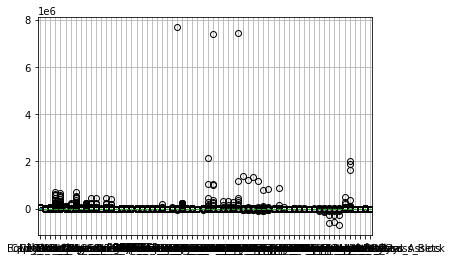

In [739]:
credit.boxplot()

## Outlier Treatment

In [740]:
Q1 = credit.quantile(0.25)
Q3 = credit.quantile(0.75)
IQR = Q3-Q1

In [741]:
credit[((credit < (Q1 - 1.5 * IQR)) |(credit > (Q3 + 1.5 * IQR))).any(axis=1)]

,Co_Code,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block,Net_Working_Capital,Curr_Assets,Curr_Liab_and_Prov,Total_Assets_to_Liab,Gross_Sales,Net_Sales,Other_Income,Value_Of_Output,Cost_of_Prod,Selling_Cost,PBIDT,PBDT,PBIT,PBT,PAT,Adjusted_PAT,CP,Rev_earn_in_forex,Rev_exp_in_forex,Capital_exp_in_forex,Book_Value_Unit_Curr,Book_Value_Adj_Unit_Curr,Market_Capitalisation,CEPS_annualised_Unit_Curr,Cash_Flow_From_Opr,Cash_Flow_From_Inv,Cash_Flow_From_Fin,ROG_Net_Worth_perc,ROG_Capital_Employed_perc,ROG_Gross_Block_perc,ROG_Gross_Sales_perc,ROG_Net_Sales_perc,ROG_Cost_of_Prod_perc,ROG_Total_Assets_perc,ROG_PBIDT_perc,ROG_PBDT_perc,ROG_PBIT_perc,ROG_PBT_perc,ROG_PAT_perc,ROG_CP_perc,ROG_Rev_earn_in_forex_perc,ROG_Rev_exp_in_forex_perc,ROG_Market_Capitalisation_perc,Curr_Ratio_Latest,Fixed_Assets_Ratio_Latest,Inventory_Ratio_Latest,Debtors_Ratio_Latest,Total_Asset_Turnover_Ratio_Latest,Interest_Cover_Ratio_Latest,PBIDTM_perc_Latest,PBITM_perc_Latest,PBDTM_perc_Latest,CPM_perc_Latest,APATM_perc_Latest,Debtors_Vel_Days,Creditors_Vel_Days,Inventory_Vel_Days,Value_of_Output_to_Total_Assets,Value_of_Output_to_Gross_Block,default
0,16974,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,1116.85,109.60,0.00,0.00,7.60,-0.07,137.67,0.00,-179.06,-926.52,-185.53,-932.99,-932.99,-937.85,-926.52,0.00,0.00,0.00,-167.58,-167.58,0.00,-22.09,-102.47,1.46,92.58,-15.31,-20.76,-9.75,0.00,0.00,1.38,-25.75,5.23,-19.29,4.43,-19.33,-19.33,-19.29,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,-0.20,0.00,0.00,0.00,0.00,0.00,0,0,45.00,0.00,0.00,1
1,21214,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,1585.74,6043.94,2892.73,2892.73,46.27,2900.71,2572.46,40.51,646.46,-4.32,35.53,-615.25,-615.25,-617.14,-4.32,6.35,143.42,141.17,-15.18,-15.18,1544.39,-0.02,635.91,-785.00,176.93,-26.15,6.30,3.17,5.92,5.92,13.16,6.66,5.24,-108.77,614.89,-9.85,-9.85,-108.77,1.93,34.00,6.61,0.08,0.25,804.44,10.35,0.30,-0.84,-10.30,-39.74,-57.74,-57.74,-87.18,29,101,2.00,0.31,0.24,1
2,14852,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,4601.39,12316.07,392.13,392.13,9.55,301.16,408.51,54.83,-281.92,-1086.71,-381.10,-1185.89,-897.70,-873.39,-798.52,0.00,86.36,2.27,94.14,94.14,1220.81,-148.31,-873.40,-458.27,1187.51,-61.86,15.66,-2.07,-75.87,-75.87,-69.93,-0.78,-169.69,-431.68,-221.85,-300.41,-350.43,-642.67,-100.00,-81.21,-6.31,1.06,0.03,0.01,0.42,0.00,-2.21,-5279.14,-5516.98,-7780.25,-7723.67,-7961.51,97,558,0.00,-0.03,-0.26,1
3,2439,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,3646.54,6000.42,1354.39,1354.39,223.85,1350.14,1326.99,3.34,-213.01,-677.57,-336.73,-801.29,-801.29,-770.18,-677.57,0.89,28.88,0.00,-39.64,-39.64,194.27,-43.08,324.47,17.31,-412.55,-450.67,-40.84,-1.80,8.33,8.33,16.59,-10.12,-203.84,-102.72,-455.28,-80.23,-70.57,-88.52,-52.91,-33.85,-13.94,0.09,5.08,411.15,9.26,0.00,-0.16,-3.33,-7.21,-48.13,-47.70,-51.58,93,63,2.00,0.24,1.90,1
4,23505,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,2849.58,7524.91,38.72,38.72,9.82,38.72,186.29,1.97,-647.86,-944.42,-710.13,-1006.69,-864.58,-327.77,-802.31,0.00,15.62,0.00,-212.89,-212.89,113.68,-159.50,-191.54,61.34,143.65,-559.83,-11.76,0.34,-80.61,-80.61,-48.80,-5.81,-40.07,3.28,-38.72,1.87,-2.59,-1.13,-100.00,-91.17,-12.91,0.50,0.05,0.02,1.28,0.01,-0.73,-295.55,-400.55,-845.88,379.79,274.79,3887,346,0.00,0.01,0.05,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3581,4987,501.30,62009.42,590576.00,496009.19,8463.30,0.00,444633.50,32557.39,94566.81,48469.90,48469.90,8996.35,48469.90,6705.18,187.47,42059.26,15985.02,41402.96,15328.72,10215.92,10208.55,10872.22,0.00,0.00,0.00,247.39,247.39,256376.88,41.75,-15862.27,-1933.36,14543.44,42.62,20.12,9.83,17.83,17.83,12.11,11.41,16.52,18.90,16.88,20.02,20.49,18.82,0.00,0.00,42.71,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0

In [742]:
credit_X = credit.drop('default', axis = 1)
credit_Y = credit['default']

In [743]:
credit_temp = credit.drop(['default','Capital_exp_in_forex','ROG_Rev_earn_in_forex_perc','ROG_Rev_exp_in_forex_perc'],axis=1)

In [744]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [745]:
for column in credit_temp.columns:
    lr,ur=remove_outlier(credit[column])
    credit_X[column]=np.where(credit_X[column]>ur,ur,credit_X[column])
    credit_X[column]=np.where(credit_X[column]<lr,lr,credit_X[column])

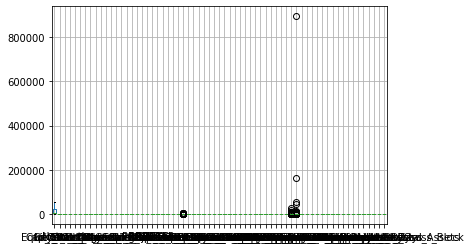

In [746]:
credit_X.boxplot()

In [747]:
from scipy.stats import zscore
credit_X = credit_X.apply(zscore)
credit_X.head()

,Co_Code,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block,Net_Working_Capital,Curr_Assets,Curr_Liab_and_Prov,Total_Assets_to_Liab,Gross_Sales,Net_Sales,Other_Income,Value_Of_Output,Cost_of_Prod,Selling_Cost,PBIDT,PBDT,PBIT,PBT,PAT,Adjusted_PAT,CP,Rev_earn_in_forex,Rev_exp_in_forex,Capital_exp_in_forex,Book_Value_Unit_Curr,Book_Value_Adj_Unit_Curr,Market_Capitalisation,CEPS_annualised_Unit_Curr,Cash_Flow_From_Opr,Cash_Flow_From_Inv,Cash_Flow_From_Fin,ROG_Net_Worth_perc,ROG_Capital_Employed_perc,ROG_Gross_Block_perc,ROG_Gross_Sales_perc,ROG_Net_Sales_perc,ROG_Cost_of_Prod_perc,ROG_Total_Assets_perc,ROG_PBIDT_perc,ROG_PBDT_perc,ROG_PBIT_perc,ROG_PBT_perc,ROG_PAT_perc,ROG_CP_perc,ROG_Rev_earn_in_forex_perc,ROG_Rev_exp_in_forex_perc,ROG_Market_Capitalisation_perc,Curr_Ratio_Latest,Fixed_Assets_Ratio_Latest,Inventory_Ratio_Latest,Debtors_Ratio_Latest,Total_Asset_Turnover_Ratio_Latest,Interest_Cover_Ratio_Latest,PBIDTM_perc_Latest,PBITM_perc_Latest,PBDTM_perc_Latest,CPM_perc_Latest,APATM_perc_Latest,Debtors_Vel_Days,Creditors_Vel_Days,Inventory_Vel_Days,Value_of_Output_to_Total_Assets,Value_of_Output_to_Gross_Block
0,0.11,2.08,-2.12,-2.28,1.96,2.01,-2.13,-0.42,1.96,-0.35,-0.71,-0.71,1.50,-0.71,0.07,-0.67,-2.08,-1.86,-1.97,-1.70,-1.68,-1.67,-1.86,-0.61,-0.62,-0.07,-2.21,-2.20,-0.67,-2.00,-1.82,0.65,1.60,-1.36,-1.48,-1.66,-0.21,-0.21,-0.20,-1.83,-0.10,-0.35,-0.06,-0.26,-0.26,-0.36,-0.06,-0.02,-0.48,-1.14,-0.83,-0.83,-0.90,-0.89,-0.58,-0.56,-0.47,-0.44,-0.43,-0.32,-0.92,-0.92,-0.23,-0.94,-0.82
1,0.36,2.08,-2.12,1.94,1.96,2.01,-2.13,1.97,1.96,1.97,1.98,1.98,1.92,1.99,1.99,1.94,1.88,-0.80,1.50,-1.70,-1.68,-1.67,-0.86,0.25,1.86,1.20,-1.01,-1.06,1.92,-0.54,1.79,-1.75,1.60,-1.74,0.12,0.03,-0.02,-0.02,0.16,0.15,-0.10,-1.38,1.90,-0.17,-0.17,-1.39,-0.05,-0.02,-0.34,-1.11,-0.77,2.22,0.66,-0.62,-0.75,-1.10,-1.87,-1.84,-1.82,-1.60,-0.57,0.57,-0.81,-0.54,-0.76
2,-0.01,2.08,1.89,1.94,1.96,2.01,1.93,1.97,1.96,1.97,1.04,1.10,1.92,0.67,1.62,1.94,-2.08,-1.86,-1.97,-1.70,-1.68,-1.67,-1.86,-0.61,1.86,-0.05,0.81,1.12,1.92,-2.00,-1.82,-1.75,1.60,-1.74,0.67,-0.66,-1.85,-1.85,-1.83,-0.31,-1.90,-1.91,-1.91,-1.92,-1.94,-1.90,-0.21,-0.03,-0.61,-0.57,-0.83,-0.83,-0.84,-0.89,-1.10,-2.06,-1.87,-1.84,-1.82,-1.60,0.27,2.17,-0.84,-0.98,-0.88
3,-0.73,2.08,-2.12,1.94,1.96,2.01,-2.13,1.97,1.96,1.97,1.98,1.98,1.92,1.99,1.99,0.23,-2.08,-1.86,-1.97,-1.70,-1.68,-1.67,-1.86,-0.49,1.86,-0.07,-1.42,-1.55,1.14,-2.00,1.79,1.74,-1.72,-1.74,-1.94,-0.62,0.05,0.05,0.26,-0.88,-1.90,-1.31,-1.91,-0.83,-0.71,-1.15,-0.14,-0.03,-0.76,-1.10,0.45,2.22,0.49,-0.89,-0.57,-0.73,-0.94,-1.84,-1.82,-1.60,0.22,0.01,-0.81,-0.63,-0.36
4,0.49,2.08,-2.12,1.94,1.96,2.01,1.93,1.97,1.96,1.97,-0.54,-0.53,1.92,-0.53,0.35,-0.14,-2.08,-1.86,-1.97,-1.70,-1.68,-1.67,-1.86,-0.61,1.60,-0.07,-2.21,-2.20,0.38,-2.00,-1.82,1.74,1.60,-1.74,-0.95,-0.34,-1.85,-1.85,-1.71,-0.62,-0.70,-0.09,-0.57,-0.06,-0.11,-0.15,-0.21,-0.03,-0.74,-0.88,-0.82,-0.83,-0.71,-0.88,-0.72,-2.06,-1.87,-1.84,1.88,1.80,2.17,2.17,-0.84,-0.93,-0.81


In [748]:
credit_X.describe()

,Co_Code,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block,Net_Working_Capital,Curr_Assets,Curr_Liab_and_Prov,Total_Assets_to_Liab,Gross_Sales,Net_Sales,Other_Income,Value_Of_Output,Cost_of_Prod,Selling_Cost,PBIDT,PBDT,PBIT,PBT,PAT,Adjusted_PAT,CP,Rev_earn_in_forex,Rev_exp_in_forex,Capital_exp_in_forex,Book_Value_Unit_Curr,Book_Value_Adj_Unit_Curr,Market_Capitalisation,CEPS_annualised_Unit_Curr,Cash_Flow_From_Opr,Cash_Flow_From_Inv,Cash_Flow_From_Fin,ROG_Net_Worth_perc,ROG_Capital_Employed_perc,ROG_Gross_Block_perc,ROG_Gross_Sales_perc,ROG_Net_Sales_perc,ROG_Cost_of_Prod_perc,ROG_Total_Assets_perc,ROG_PBIDT_perc,ROG_PBDT_perc,ROG_PBIT_perc,ROG_PBT_perc,ROG_PAT_perc,ROG_CP_perc,ROG_Rev_earn_in_forex_perc,ROG_Rev_exp_in_forex_perc,ROG_Market_Capitalisation_perc,Curr_Ratio_Latest,Fixed_Assets_Ratio_Latest,Inventory_Ratio_Latest,Debtors_Ratio_Latest,Total_Asset_Turnover_Ratio_Latest,Interest_Cover_Ratio_Latest,PBIDTM_perc_Latest,PBITM_perc_Latest,PBDTM_perc_Latest,CPM_perc_Latest,APATM_perc_Latest,Debtors_Vel_Days,Creditors_Vel_Days,Inventory_Vel_Days,Value_of_Output_to_Total_Assets,Value_of_Output_to_Gross_Block
count,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00
mean,-0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.88,-1.00,-2.12,-2.28,-0.71,-1.04,-2.13,-0.76,-0.72,-0.76,-0.99,-1.00,-2.28,-1.26,-0.84,-0.67,-2.08,-1.86,-1.97,-1.70,-1.68,-1.67,-1.86,-0.61,-0.62,-0.07,-2.21,-2.20,-0.67,-2.00,-1.82,-1.75,-1.72,-1.74,-1.94,-1.70,-1.85,-1.85,-1.83,-2.01,-1.90,-1.91,-1.91,-1.92,-1.94,-1.90,-0.21,-0.03,-1.93,-1.15,-0.83,-0.83,-0.90,-0.89,-1.95,-2.06,-1.87,-1.84,-1.82,-1.60,-0.92,-0.92,-2.78,-1.37,-2.45
25%,-0.70,-0.73,-0.62,-0.70,-0.70,-0.70,-0.60,-0.72,-0.70,-0.71,-0.70,-0.70,-0.70,-0.70,-0.71,-0.67,-0.59,-0.49,-0.54,-0.41,-0.40,-0.39,-0.50,-0.61,-0.62,-0.07,-0.62,-0.62,-0.67,-0.54,-0.47,-0.44,-0.48,-0.39,-0.48,-0.39,-0.46,-0.46,-0.46,-0.50,-0.48,-0.48,-0.48,-0.46,-0.47,-0.48,-0.06,-0.02,-0.48,-0.67,-0.77,-0.83,-0.84,-0.83,-0.53,-0.56,-0.47,-0.44,-0.43,-0.32,-0.82,-0.80,-0.84,-0.85,-0.75
50%,-0.52,-0.41,-0.49,-0.55,-0.59,-0.57,-0.45,-0.55,-0.56,-0.56,-0.57,-0.57,-0.58,-0.57,-0.56,-0.62,-0.51,-0.44,-0.47,-0.37,-0.35,-0.35,-0.43,-0.61,-0.62,-0.07,-0.40,-0.38,-0.60,-0.41,-0.41,0.39,0.30,-0.16,-0.18,-0.35,-0.10,-0.11,-0.10,-0.17,-0.11,-0.09,-0.09,-0.08,-0.08,-0.09,-0.06,-0.02,-0.48,-0.40,-0.44,-0.34,-0.33,-0.35,-0.25,-0.13,-0.13,-0.13,-0.12,-0.14,-0.32,-0.34,-0.35,-0.32,-0.45
75%,0.54,0.39,0.39,0.36,0.37,0.39,0.41,0.36,0.36,0.36,0.37,0.37,0.35,0.37,0.37,0.38,0.39,0.42,0.42,0.45,0.45,0.46,0.42,0.37,0.37,-0.07,0.44,0.44,0.36,0.44,0.43,0.43,0.36,0.51,0.49,0.49,0.47,0.47,0.46,0.50,0.47,0.48,0.47,0.50,0.50,0.47,-0.06,-0.02,0.49,0.38,0.36,0.39,0.38,0.50,0.42,0.45,0.46,0.49,0.49,0.53,0.38,0.39,0.45,0.55,0.38
max,2.40,2.08,1.89,1.94,1.96,2.01,1.93,1.97,1.96,1.97,1.98,1.98,1.92,1.99,1.99,1.94,1.88,1.78,1.85,1.74,1.73,1.74,1.78,1.83,1.86,

In [749]:
credit_X[['Capital_exp_in_forex','ROG_Rev_earn_in_forex_perc','ROG_Rev_exp_in_forex_perc']].head()

,Capital_exp_in_forex,ROG_Rev_earn_in_forex_perc,ROG_Rev_exp_in_forex_perc
0,-0.07,-0.06,-0.02
1,1.20,-0.05,-0.02
2,-0.05,-0.21,-0.03
3,-0.07,-0.14,-0.03
4,-0.07,-0.21,-0.03


In [750]:
df_credit = pd.concat([credit_X, credit_Y], axis = 1)

In [751]:
df_credit.head()

,Co_Code,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block,Net_Working_Capital,Curr_Assets,Curr_Liab_and_Prov,Total_Assets_to_Liab,Gross_Sales,Net_Sales,Other_Income,Value_Of_Output,Cost_of_Prod,Selling_Cost,PBIDT,PBDT,PBIT,PBT,PAT,Adjusted_PAT,CP,Rev_earn_in_forex,Rev_exp_in_forex,Capital_exp_in_forex,Book_Value_Unit_Curr,Book_Value_Adj_Unit_Curr,Market_Capitalisation,CEPS_annualised_Unit_Curr,Cash_Flow_From_Opr,Cash_Flow_From_Inv,Cash_Flow_From_Fin,ROG_Net_Worth_perc,ROG_Capital_Employed_perc,ROG_Gross_Block_perc,ROG_Gross_Sales_perc,ROG_Net_Sales_perc,ROG_Cost_of_Prod_perc,ROG_Total_Assets_perc,ROG_PBIDT_perc,ROG_PBDT_perc,ROG_PBIT_perc,ROG_PBT_perc,ROG_PAT_perc,ROG_CP_perc,ROG_Rev_earn_in_forex_perc,ROG_Rev_exp_in_forex_perc,ROG_Market_Capitalisation_perc,Curr_Ratio_Latest,Fixed_Assets_Ratio_Latest,Inventory_Ratio_Latest,Debtors_Ratio_Latest,Total_Asset_Turnover_Ratio_Latest,Interest_Cover_Ratio_Latest,PBIDTM_perc_Latest,PBITM_perc_Latest,PBDTM_perc_Latest,CPM_perc_Latest,APATM_perc_Latest,Debtors_Vel_Days,Creditors_Vel_Days,Inventory_Vel_Days,Value_of_Output_to_Total_Assets,Value_of_Output_to_Gross_Block,default
0,0.11,2.08,-2.12,-2.28,1.96,2.01,-2.13,-0.42,1.96,-0.35,-0.71,-0.71,1.50,-0.71,0.07,-0.67,-2.08,-1.86,-1.97,-1.70,-1.68,-1.67,-1.86,-0.61,-0.62,-0.07,-2.21,-2.20,-0.67,-2.00,-1.82,0.65,1.60,-1.36,-1.48,-1.66,-0.21,-0.21,-0.20,-1.83,-0.10,-0.35,-0.06,-0.26,-0.26,-0.36,-0.06,-0.02,-0.48,-1.14,-0.83,-0.83,-0.90,-0.89,-0.58,-0.56,-0.47,-0.44,-0.43,-0.32,-0.92,-0.92,-0.23,-0.94,-0.82,1
1,0.36,2.08,-2.12,1.94,1.96,2.01,-2.13,1.97,1.96,1.97,1.98,1.98,1.92,1.99,1.99,1.94,1.88,-0.80,1.50,-1.70,-1.68,-1.67,-0.86,0.25,1.86,1.20,-1.01,-1.06,1.92,-0.54,1.79,-1.75,1.60,-1.74,0.12,0.03,-0.02,-0.02,0.16,0.15,-0.10,-1.38,1.90,-0.17,-0.17,-1.39,-0.05,-0.02,-0.34,-1.11,-0.77,2.22,0.66,-0.62,-0.75,-1.10,-1.87,-1.84,-1.82,-1.60,-0.57,0.57,-0.81,-0.54,-0.76,1
2,-0.01,2.08,1.89,1.94,1.96,2.01,1.93,1.97,1.96,1.97,1.04,1.10,1.92,0.67,1.62,1.94,-2.08,-1.86,-1.97,-1.70,-1.68,-1.67,-1.86,-0.61,1.86,-0.05,0.81,1.12,1.92,-2.00,-1.82,-1.75,1.60,-1.74,0.67,-0.66,-1.85,-1.85,-1.83,-0.31,-1.90,-1.91,-1.91,-1.92,-1.94,-1.90,-0.21,-0.03,-0.61,-0.57,-0.83,-0.83,-0.84,-0.89,-1.10,-2.06,-1.87,-1.84,-1.82,-1.60,0.27,2.17,-0.84,-0.98,-0.88,1
3,-0.73,2.08,-2.12,1.94,1.96,2.01,-2.13,1.97,1.96,1.97,1.98,1.98,1.92,1.99,1.99,0.23,-2.08,-1.86,-1.97,-1.70,-1.68,-1.67,-1.86,-0.49,1.86,-0.07,-1.42,-1.55,1.14,-2.00,1.79,1.74,-1.72,-1.74,-1.94,-0.62,0.05,0.05,0.26,-0.88,-1.90,-1.31,-1.91,-0.83,-0.71,-1.15,-0.14,-0.03,-0.76,-1.10,0.45,2.22,0.49,-0.89,-0.57,-0.73,-0.94,-1.84,-1.82,-1.60,0.22,0.01,-0.81,-0.63,-0.36,1
4,0.49,2.08,-2.12,1.94,1.96,2.01,1.93,1.97,1.96,1.97,-0.54,-0.53,1.92,-0.53,0.35,-0.14,-2.08,-1.86,-1.97,-1.70,-1.68,-1.67,-1.86,-0.61,1.60,-0.07,-2.21,-2.20,0.38,-2.00,-1.82,1.74,1.60,-1.74,-0.95,-0.34,-1.85,-1.85,-1.71,-0.62,-0.70,-0.09,-0.57,-0.06,-0.11,-0.15,-0.21,-0.03,-0.74,-0.88,-0.82,-0.83,-0.71,-0.88,-0.72,-2.06,-1.87,-1.84,1.88,1.80,2.17,2.17,-0.84,-0.93,-0.81,1


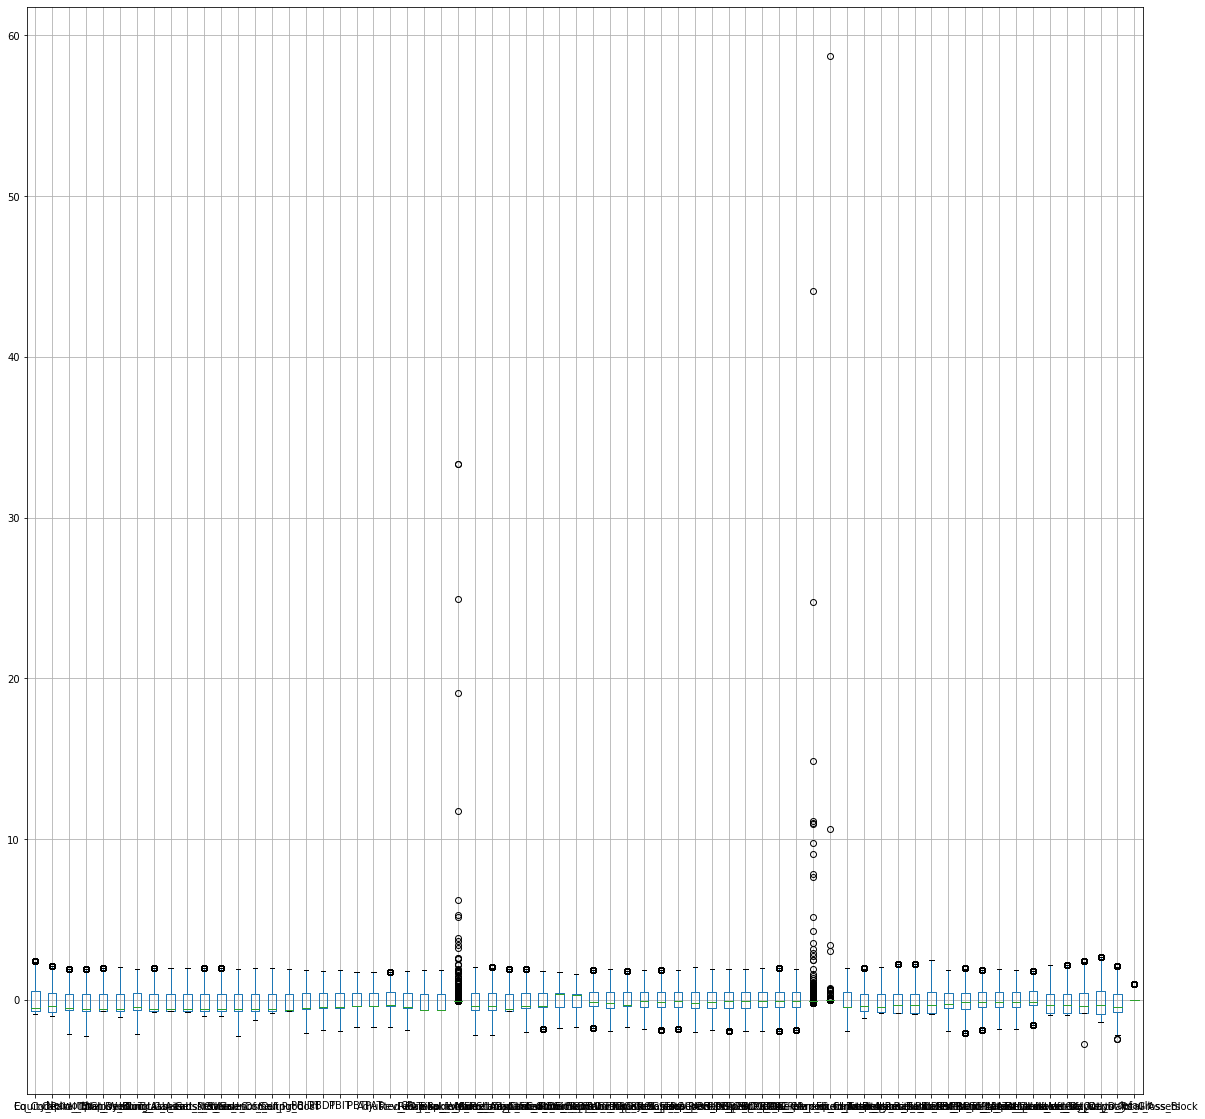

In [752]:
plt.figure(figsize=(20,20))
df_credit.boxplot()

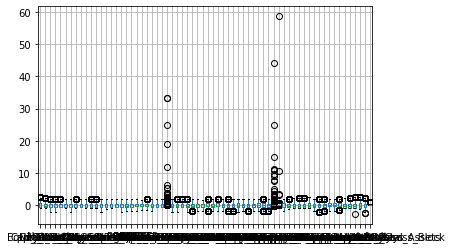

In [753]:
df_credit.boxplot()

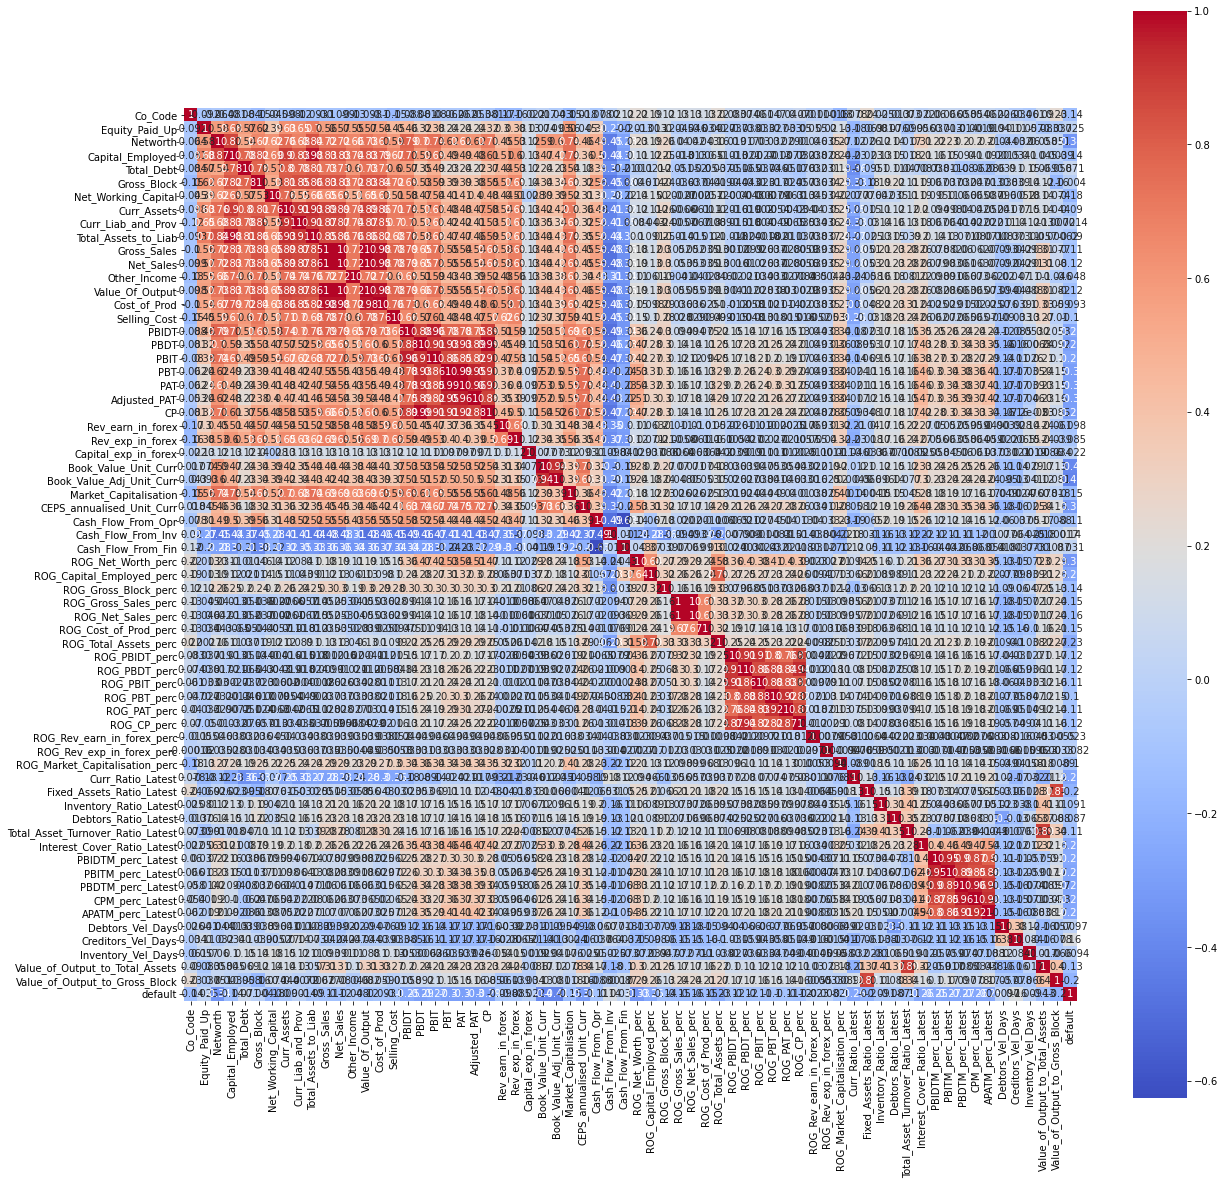

In [754]:
plt.figure(figsize=(20,20))
sns.heatmap(df_credit.corr(), annot=True,cmap='coolwarm',square=True)

In [755]:
df_credit['default'].value_counts()

0    3198
1     388
Name: default, dtype: int64

#### Checking the Variance Inflation Factor

In [756]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [757]:
X = df_credit.drop('default', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
11,Net_Sales,1127.77
10,Gross_Sales,638.01
36,ROG_Gross_Sales_perc,519.48
37,ROG_Net_Sales_perc,519.07
13,Value_Of_Output,460.94
...,...,...
0,Co_Code,1.28
62,Inventory_Vel_Days,1.16
25,Capital_exp_in_forex,1.12
47,ROG_Rev_exp_in_forex_perc,1.03


In [758]:
X = X.drop('Net_Sales', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
35,ROG_Gross_Sales_perc,504.59
36,ROG_Net_Sales_perc,503.77
10,Gross_Sales,276.62
12,Value_Of_Output,269.16
16,PBDT,94.80
...,...,...
0,Co_Code,1.28
61,Inventory_Vel_Days,1.16
24,Capital_exp_in_forex,1.12
46,ROG_Rev_exp_in_forex_perc,1.03


In [759]:
X = X.drop('ROG_Gross_Sales_perc', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
10,Gross_Sales,273.31
12,Value_Of_Output,266.13
16,PBDT,94.43
21,CP,83.38
9,Total_Assets_to_Liab,68.09
...,...,...
0,Co_Code,1.28
60,Inventory_Vel_Days,1.16
24,Capital_exp_in_forex,1.12
45,ROG_Rev_exp_in_forex_perc,1.03


In [760]:
X = X.drop('Gross_Sales', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
15,PBDT,94.41
20,CP,83.37
9,Total_Assets_to_Liab,68.08
18,PAT,66.36
17,PBT,64.83
...,...,...
0,Co_Code,1.28
59,Inventory_Vel_Days,1.16
23,Capital_exp_in_forex,1.12
44,ROG_Rev_exp_in_forex_perc,1.03


In [761]:
X = X.drop('PBDT', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
9,Total_Assets_to_Liab,68.02
17,PAT,58.43
3,Capital_Employed,47.80
16,PBT,47.64
11,Value_Of_Output,38.90
...,...,...
0,Co_Code,1.28
58,Inventory_Vel_Days,1.16
22,Capital_exp_in_forex,1.12
43,ROG_Rev_exp_in_forex_perc,1.03


In [762]:
X = X.drop('Total_Assets_to_Liab', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
16,PAT,58.41
15,PBT,47.61
10,Value_Of_Output,38.85
11,Cost_of_Prod,31.31
53,CPM_perc_Latest,27.77
50,PBIDTM_perc_Latest,24.98
51,PBITM_perc_Latest,24.71
36,ROG_PBDT_perc,24.00
13,PBIDT,23.34
52,PBDTM_perc_Latest,23.12


In [763]:
X = X.drop('PAT', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
10,Value_Of_Output,38.76
11,Cost_of_Prod,31.29
52,CPM_perc_Latest,27.76
49,PBIDTM_perc_Latest,24.98
50,PBITM_perc_Latest,24.70
35,ROG_PBDT_perc,24.00
13,PBIDT,23.25
51,PBDTM_perc_Latest,23.12
14,PBIT,22.67
7,Curr_Assets,20.45


In [764]:
X = X.drop('Value_Of_Output', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
51,CPM_perc_Latest,27.60
48,PBIDTM_perc_Latest,24.74
49,PBITM_perc_Latest,24.56
34,ROG_PBDT_perc,23.99
50,PBDTM_perc_Latest,23.11
13,PBIT,22.67
12,PBIDT,22.50
7,Curr_Assets,20.42
36,ROG_PBT_perc,18.91
14,PBT,18.74


In [765]:
X = X.drop('CPM_perc_Latest', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
34,ROG_PBDT_perc,23.99
13,PBIT,22.67
12,PBIDT,22.49
7,Curr_Assets,20.37
48,PBIDTM_perc_Latest,19.55
36,ROG_PBT_perc,18.90
14,PBT,18.69
49,PBITM_perc_Latest,17.99
38,ROG_CP_perc,17.57
3,Capital_Employed,15.62


In [766]:
X = X.drop('ROG_PBDT_perc', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
13,PBIT,22.64
12,PBIDT,22.39
7,Curr_Assets,20.36
47,PBIDTM_perc_Latest,19.55
14,PBT,18.68
48,PBITM_perc_Latest,17.99
3,Capital_Employed,15.62
49,PBDTM_perc_Latest,14.86
16,CP,14.73
15,Adjusted_PAT,12.92


In [767]:
X = X.drop('PBIT', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
7,Curr_Assets,20.34
46,PBIDTM_perc_Latest,19.45
47,PBITM_perc_Latest,17.66
13,PBT,17.46
3,Capital_Employed,15.61
48,PBDTM_perc_Latest,14.82
15,CP,14.51
14,Adjusted_PAT,12.92
8,Curr_Liab_and_Prov,11.79
32,ROG_PBIDT_perc,11.77


In [768]:
X = X.drop('Curr_Assets', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
45,PBIDTM_perc_Latest,19.44
46,PBITM_perc_Latest,17.66
12,PBT,17.39
47,PBDTM_perc_Latest,14.82
14,CP,14.51
3,Capital_Employed,13.92
13,Adjusted_PAT,12.78
31,ROG_PBIDT_perc,11.77
18,Book_Value_Unit_Curr,11.27
32,ROG_PBIT_perc,11.26


In [769]:
X = X.drop('PBIDTM_perc_Latest', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
12,PBT,17.39
14,CP,14.47
3,Capital_Employed,13.89
13,Adjusted_PAT,12.76
31,ROG_PBIDT_perc,11.75
18,Book_Value_Unit_Curr,11.27
32,ROG_PBIT_perc,11.26
34,ROG_PAT_perc,11.18
33,ROG_PBT_perc,10.34
11,PBIDT,9.74


In [770]:
X = X.drop('PBT', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
3,Capital_Employed,13.88
13,CP,12.67
30,ROG_PBIDT_perc,11.68
17,Book_Value_Unit_Curr,11.27
31,ROG_PBIT_perc,11.18
33,ROG_PAT_perc,11.18
32,ROG_PBT_perc,10.09
11,PBIDT,9.68
34,ROG_CP_perc,9.15
18,Book_Value_Adj_Unit_Curr,8.92


In [771]:
X = X.drop('Capital_Employed', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
12,CP,12.61
29,ROG_PBIDT_perc,11.67
16,Book_Value_Unit_Curr,11.25
30,ROG_PBIT_perc,11.18
32,ROG_PAT_perc,11.18
31,ROG_PBT_perc,10.09
10,PBIDT,9.64
33,ROG_CP_perc,9.14
17,Book_Value_Adj_Unit_Curr,8.91
44,PBDTM_perc_Latest,8.67


In [772]:
X = X.drop('CP', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
28,ROG_PBIDT_perc,11.37
29,ROG_PBIT_perc,11.13
31,ROG_PAT_perc,11.12
15,Book_Value_Unit_Curr,11.06
30,ROG_PBT_perc,10.09
16,Book_Value_Adj_Unit_Curr,8.90
32,ROG_CP_perc,8.78
43,PBDTM_perc_Latest,8.58
8,Cost_of_Prod,7.63
44,APATM_perc_Latest,7.27


In [773]:
X = X.drop('ROG_PBIDT_perc', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
15,Book_Value_Unit_Curr,11.05
29,ROG_PBT_perc,10.06
30,ROG_PAT_perc,9.54
16,Book_Value_Adj_Unit_Curr,8.90
42,PBDTM_perc_Latest,8.57
8,Cost_of_Prod,7.63
43,APATM_perc_Latest,7.27
6,Curr_Liab_and_Prov,7.11
4,Gross_Block,7.04
47,Value_of_Output_to_Total_Assets,6.72


In [774]:
X = X.drop('Book_Value_Unit_Curr', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
28,ROG_PBT_perc,10.06
29,ROG_PAT_perc,9.53
41,PBDTM_perc_Latest,8.57
8,Cost_of_Prod,7.63
42,APATM_perc_Latest,7.27
6,Curr_Liab_and_Prov,7.08
4,Gross_Block,7.03
46,Value_of_Output_to_Total_Assets,6.72
10,PBIDT,6.27
40,PBITM_perc_Latest,6.25


In [775]:
X = X.drop('ROG_PBT_perc', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
40,PBDTM_perc_Latest,8.55
8,Cost_of_Prod,7.63
41,APATM_perc_Latest,7.27
6,Curr_Liab_and_Prov,7.08
4,Gross_Block,7.03
45,Value_of_Output_to_Total_Assets,6.72
10,PBIDT,6.25
39,PBITM_perc_Latest,6.23
37,Total_Asset_Turnover_Ratio_Latest,6.15
2,Networth,5.45


In [776]:
X = X.drop('PBDTM_perc_Latest', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
8,Cost_of_Prod,7.63
6,Curr_Liab_and_Prov,7.06
4,Gross_Block,6.97
44,Value_of_Output_to_Total_Assets,6.72
10,PBIDT,6.25
37,Total_Asset_Turnover_Ratio_Latest,6.15
2,Networth,5.45
28,ROG_PAT_perc,5.36
45,Value_of_Output_to_Gross_Block,5.20
40,APATM_perc_Latest,5.06


In [777]:
X = X.drop('Cost_of_Prod', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
43,Value_of_Output_to_Total_Assets,6.66
4,Gross_Block,6.42
9,PBIDT,6.23
6,Curr_Liab_and_Prov,6.22
36,Total_Asset_Turnover_Ratio_Latest,6.12
2,Networth,5.44
27,ROG_PAT_perc,5.36
44,Value_of_Output_to_Gross_Block,5.20
39,APATM_perc_Latest,5.05
33,Fixed_Assets_Ratio_Latest,5.03


In [778]:
X = X.drop('Value_of_Output_to_Total_Assets', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
4,Gross_Block,6.42
9,PBIDT,6.23
6,Curr_Liab_and_Prov,6.18
2,Networth,5.43
27,ROG_PAT_perc,5.36
39,APATM_perc_Latest,5.05
28,ROG_CP_perc,4.82
33,Fixed_Assets_Ratio_Latest,4.75
43,Value_of_Output_to_Gross_Block,4.71
38,PBITM_perc_Latest,4.49


In [779]:
X = X.drop('Gross_Block', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
8,PBIDT,6.20
5,Curr_Liab_and_Prov,5.49
2,Networth,5.42
26,ROG_PAT_perc,5.35
38,APATM_perc_Latest,5.02
27,ROG_CP_perc,4.82
32,Fixed_Assets_Ratio_Latest,4.73
42,Value_of_Output_to_Gross_Block,4.67
37,PBITM_perc_Latest,4.44
9,Adjusted_PAT,4.17


In [780]:
X = X.drop('PBIDT', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
5,Curr_Liab_and_Prov,5.41
25,ROG_PAT_perc,5.27
37,APATM_perc_Latest,4.96
2,Networth,4.89
26,ROG_CP_perc,4.82
31,Fixed_Assets_Ratio_Latest,4.72
41,Value_of_Output_to_Gross_Block,4.67
36,PBITM_perc_Latest,4.37
24,ROG_PBIT_perc,3.86
14,CEPS_annualised_Unit_Curr,3.67


In [781]:
X = X.drop('Curr_Liab_and_Prov', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
24,ROG_PAT_perc,5.27
36,APATM_perc_Latest,4.96
2,Networth,4.85
25,ROG_CP_perc,4.82
30,Fixed_Assets_Ratio_Latest,4.72
40,Value_of_Output_to_Gross_Block,4.67
35,PBITM_perc_Latest,4.37
23,ROG_PBIT_perc,3.86
13,CEPS_annualised_Unit_Curr,3.67
18,ROG_Capital_Employed_perc,3.65


In [782]:
X = X.drop('ROG_PAT_perc', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
35,APATM_perc_Latest,4.96
2,Networth,4.84
29,Fixed_Assets_Ratio_Latest,4.72
39,Value_of_Output_to_Gross_Block,4.67
34,PBITM_perc_Latest,4.37
13,CEPS_annualised_Unit_Curr,3.67
18,ROG_Capital_Employed_perc,3.64
7,Adjusted_PAT,3.51
24,ROG_CP_perc,3.21
23,ROG_PBIT_perc,3.20


In [783]:
#model_1 = SM.logit(formula = 'default ~ APATM_perc_Latest + Networth + Fixed_Assets_Ratio_Latest + Value_of_Output_to_Gross_Block + PBITM_perc_Latest + CEPS_annualised_Unit_Curr + ROG_Capital_Employed_perc + Adjusted_PAT + ROG_CP_perc + ROG_PBIT_perc + Market_Capitalisation + Cash_Flow_From_Opr + ROG_Total_Assets_perc + Selling_Cost + Total_Debt + ROG_Net_Worth_perc + Rev_exp_in_forex + Book_Value_Adj_Unit_Curr + Cash_Flow_From_Fin + Other_Income + Net_Working_Capital + Equity_Paid_Up + Rev_earn_in_forex + Cash_Flow_From_Inv + Total_Asset_Turnover_Ratio_Latest + ROG_Net_Sales_perc + ROG_Cost_of_Prod_perc + Interest_Cover_Ratio_Latest + Curr_Ratio_Latest + Debtors_Ratio_Latest + Debtors_Vel_Days + ROG_Market_Capitalisation_perc + Inventory_Ratio_Latest + ROG_Gross_Block_perc + Creditors_Vel_Days + Co_Code + Inventory_Vel_Days + Capital_exp_in_forex + ROG_Rev_earn_in_forex_perc + ROG_Rev_exp_in_forex_perc', data= train.astype(float)).fit()

In [784]:
from sklearn.model_selection import train_test_split

In [785]:
X = df_credit.drop('default', axis = 1)
y = df_credit['default']

In [786]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42, stratify = y)

In [787]:
print(X_train.shape)
print(X_test.shape)

(2402, 65)
(1184, 65)


# Model Building using Logistic Regression for 'Probability at default'

In [788]:
import statsmodels.formula.api as SM

In [789]:
train = pd.concat([X_train, y_train], axis = 1)
test = pd.concat([X_test, y_test], axis = 1)

In [790]:
#f_1 = 'default ~ Equity_Paid_Up + Networth + Capital_Employed + Total_Debt + Gross_Block + Net_Working_Capital + Current_Assets + Current_Liabilities_and_Provisions + Total_Assets/Liabilities + Gross_Sales + Net_Sales + Other_Income + Value_Of_Output + Cost_of_Production + Selling_Cost + PBIDT + PBDT + PBIT + PBT + PAT + Adjusted_PAT + CP + Revenue_earnings_in_forex + Revenue_expenses_in_forex + Capital_expenses_in_forex + Book_Value_(Unit_Curr) + Book_Value_(Adj.)_(Unit_Curr) + Market_Capitalisation + CEPS_(annualised)_(Unit_Curr) + Cash_Flow_From_Operating_Activities + Cash_Flow_From_Investing_Activities + Cash_Flow_From_Financing_Activities + ROG-Net_Worth_(%) + ROG-Capital_Employed_(%) + ROG-Gross_Block_(%) + ROG-Gross_Sales_(%) + ROG-Net_Sales_(%) + ROG-Cost_of_Production_(%)', 'ROG-Total_Assets_(%) + ROG-PBIDT_(%) + ROG-PBDT_(%) + ROG-PBIT_(%) + ROG-PBT_(%) + ROG-PAT_(%) + ROG-CP_(%) + ROG-Revenue_earnings_in_forex_(%) + ROG-Revenue_expenses_in_forex_(%) + ROG-Market_Capitalisation_(%) + Current_Ratio[Latest] + Fixed_Assets_Ratio[Latest] + Inventory_Ratio[Latest] + Debtors_Ratio[Latest] + Total_Asset_Turnover_Ratio[Latest] + Interest_Cover_Ratio[Latest] + PBIDTM_(%)[Latest] + PBITM_(%)[Latest] + PBDTM_(%)[Latest] + CPM_(%)[Latest] + APATM_(%)[Latest] + Debtors_Velocity_(Days) + Creditors_Velocity_(Days) + Inventory_Velocity_(Days) + Value_of_Output/Total_Assets + Value_of_Output/Gross_Block'

In [791]:
model_1 = SM.logit(formula = 'default ~ APATM_perc_Latest + Networth + Fixed_Assets_Ratio_Latest + Value_of_Output_to_Gross_Block + PBITM_perc_Latest + CEPS_annualised_Unit_Curr + ROG_Capital_Employed_perc + Adjusted_PAT + ROG_CP_perc + ROG_PBIT_perc + Market_Capitalisation + Cash_Flow_From_Opr + ROG_Total_Assets_perc + Selling_Cost + Total_Debt + ROG_Net_Worth_perc + Rev_exp_in_forex + Book_Value_Adj_Unit_Curr + Cash_Flow_From_Fin + Other_Income + Net_Working_Capital + Equity_Paid_Up + Rev_earn_in_forex + Cash_Flow_From_Inv + Total_Asset_Turnover_Ratio_Latest + ROG_Net_Sales_perc + ROG_Cost_of_Prod_perc + Interest_Cover_Ratio_Latest + Curr_Ratio_Latest + Debtors_Ratio_Latest + Debtors_Vel_Days + ROG_Market_Capitalisation_perc + Inventory_Ratio_Latest + ROG_Gross_Block_perc + Creditors_Vel_Days + Co_Code + Inventory_Vel_Days + Capital_exp_in_forex + ROG_Rev_earn_in_forex_perc + ROG_Rev_exp_in_forex_perc', data= train.astype(float)).fit()

Optimization terminated successfully.
         Current function value: 0.110671
         Iterations 15


In [792]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2361
Method:                           MLE   Df Model:                           40
Date:                Sun, 23 May 2021   Pseudo R-squ.:                  0.6772
Time:                        12:10:39   Log-Likelihood:                -265.83
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                8.548e-208
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -8.2080      0.936     -8.768      0.000     -10.043      -6.373
APATM_perc_Latest                     0.6641      0.319      2.083      0.037       0.039       1.289
Networth                             -0.8283      0.376     -2.202      0.028      -1.566      -0.091
Fixed_Assets_Ratio_Latest            -0.1266      0.396     -0.320      0.749      -0.902       0.649
Value_of_Output_to_Gross_Block       -0.0814      0.397     -0.205      0.837      -0.859       0.696
PBITM_perc_Latest                    -0.9526      0.304     -3.137      0.002      -1.548      -0.357
CEPS_annualised_Unit_Curr            -0.7193      0.344     -2.092      0.036      -1.393      -0.045
ROG_Capital_Employed_perc             0.3685      0.171      2.155      0.031       0.033       0.704
Adjusted_PAT                         -0.1022      0.341     -0.300      0.764      -0.770       0.565
ROG_CP_perc                          -0.1402      0.212     -0.661      0.509      -0.556       0.275
ROG_PBIT_perc                         0.2244      0.213      1.052      0.293      -0.194       0.642
Market_Capitalisation                -0.4647      0.330     -1.410      0.158      -1.111       0.181
Cash_Flow_From_Opr                   -0.0107      0.332     -0.032      0.974      -0.661       0.639
ROG_Total_Assets_perc                -0.3350      0.159     -2.103      0.035      -0.647      -0.023
Selling_Cost                         -0.4126      0.341     -1.211      0.226      -1.080       0.255
Total_Debt                            1.4518      0.328      4.426      0.000       0.809       2.095
ROG_Net_Worth_perc                   -0.3455      0.171     -2.018      0.044      -0.681      -0.010
Rev_exp_in_forex                      0.3488      0.257      1.359      0.174      -0.154       0.852
Book_Value_Adj_Unit_Curr             -4.3983      0.506     -8.690      0.000      -5.390      -3.406
Cash_Flow_From_Fin                    0.0457      0.306      0.149      0.881      -0.553       0.645
Other_Income                          0.0067      0.240      0.028      0.978      -0.463       0.477
Net_Working_Capital                  -0.4590      0.302     -1.518      0.129      -1.052       0.134
Equity_Paid_Up                       -0.1017      0.180     -0.566      0.571      -0.454       0.250
Rev_earn_in_forex                    -0.1608      0.255     -0.630      0.529      -0.661       0.339
Cash_Flow_From_Inv                   -0.3021      0.272     -1.110      0.267      -0.836       0.231
Total_Asset_Turnover_Ratio_Latest     0.2328      0.156      1.488      0.137      -0.074       0.539
ROG_Net_Sales_perc                   -0.0377      0.135     -0.279      0.780      -0.302       0.227
ROG_Cost_of_Prod_perc                -0.2253      0.136     -1.658      0.097      -0.492       0.041
Interest_Cover_Ratio_Latest          -0.3214      0.195     -1.646      0.100  

In [793]:
model_2 = SM.logit(formula = 'default ~ APATM_perc_Latest + Networth + Fixed_Assets_Ratio_Latest + Value_of_Output_to_Gross_Block + PBITM_perc_Latest + CEPS_annualised_Unit_Curr + ROG_Capital_Employed_perc + Adjusted_PAT + ROG_CP_perc + ROG_PBIT_perc + Market_Capitalisation + Cash_Flow_From_Opr + ROG_Total_Assets_perc + Selling_Cost + Total_Debt + ROG_Net_Worth_perc + Rev_exp_in_forex + Book_Value_Adj_Unit_Curr + Cash_Flow_From_Fin + Net_Working_Capital + Equity_Paid_Up + Rev_earn_in_forex + Cash_Flow_From_Inv + Total_Asset_Turnover_Ratio_Latest + ROG_Net_Sales_perc + ROG_Cost_of_Prod_perc + Interest_Cover_Ratio_Latest + Curr_Ratio_Latest + Debtors_Ratio_Latest + Debtors_Vel_Days + ROG_Market_Capitalisation_perc + Inventory_Ratio_Latest + ROG_Gross_Block_perc + Creditors_Vel_Days + Co_Code + Inventory_Vel_Days + Capital_exp_in_forex + ROG_Rev_earn_in_forex_perc + ROG_Rev_exp_in_forex_perc', data= train.astype(float)).fit()

Optimization terminated successfully.
         Current function value: 0.110671
         Iterations 15


In [794]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2362
Method:                           MLE   Df Model:                           39
Date:                Sun, 23 May 2021   Pseudo R-squ.:                  0.6772
Time:                        12:10:39   Log-Likelihood:                -265.83
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                1.587e-208
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -8.2074      0.936     -8.771      0.000     -10.042      -6.373
APATM_perc_Latest                     0.6635      0.318      2.086      0.037       0.040       1.287
Networth                             -0.8272      0.374     -2.212      0.027      -1.560      -0.094
Fixed_Assets_Ratio_Latest            -0.1264      0.395     -0.320      0.749      -0.901       0.648
Value_of_Output_to_Gross_Block       -0.0814      0.396     -0.205      0.837      -0.858       0.696
PBITM_perc_Latest                    -0.9520      0.303     -3.145      0.002      -1.545      -0.359
CEPS_annualised_Unit_Curr            -0.7172      0.336     -2.136      0.033      -1.375      -0.059
ROG_Capital_Employed_perc             0.3683      0.171      2.156      0.031       0.033       0.703
Adjusted_PAT                         -0.1041      0.334     -0.312      0.755      -0.758       0.550
ROG_CP_perc                          -0.1399      0.212     -0.660      0.509      -0.555       0.275
ROG_PBIT_perc                         0.2245      0.213      1.053      0.293      -0.193       0.642
Market_Capitalisation                -0.4637      0.328     -1.416      0.157      -1.106       0.178
Cash_Flow_From_Opr                   -0.0121      0.327     -0.037      0.970      -0.654       0.630
ROG_Total_Assets_perc                -0.3350      0.159     -2.103      0.035      -0.647      -0.023
Selling_Cost                         -0.4122      0.340     -1.211      0.226      -1.080       0.255
Total_Debt                            1.4543      0.316      4.605      0.000       0.835       2.073
ROG_Net_Worth_perc                   -0.3452      0.171     -2.020      0.043      -0.680      -0.010
Rev_exp_in_forex                      0.3485      0.256      1.359      0.174      -0.154       0.851
Book_Value_Adj_Unit_Curr             -4.3988      0.506     -8.696      0.000      -5.390      -3.407
Cash_Flow_From_Fin                    0.0442      0.301      0.147      0.883      -0.545       0.634
Net_Working_Capital                  -0.4590      0.302     -1.518      0.129      -1.052       0.134
Equity_Paid_Up                       -0.1012      0.179     -0.566      0.571      -0.452       0.249
Rev_earn_in_forex                    -0.1603      0.255     -0.630      0.529      -0.659       0.339
Cash_Flow_From_Inv                   -0.3022      0.272     -1.110      0.267      -0.836       0.231
Total_Asset_Turnover_Ratio_Latest     0.2329      0.156      1.489      0.136      -0.074       0.539
ROG_Net_Sales_perc                   -0.0380      0.135     -0.282      0.778      -0.302       0.226
ROG_Cost_of_Prod_perc                -0.2250      0.136     -1.660      0.097      -0.491       0.041
Interest_Cover_Ratio_Latest          -0.3215      0.195     -1.646      0.100      -0.704       0.061
Curr_Ratio_Latest                    -0.9925      0.170     -5.842      0.000  

In [795]:
model_3 = SM.logit(formula = 'default ~ APATM_perc_Latest + Networth + Fixed_Assets_Ratio_Latest + Value_of_Output_to_Gross_Block + PBITM_perc_Latest + CEPS_annualised_Unit_Curr + ROG_Capital_Employed_perc + Adjusted_PAT + ROG_CP_perc + ROG_PBIT_perc + Market_Capitalisation + ROG_Total_Assets_perc + Selling_Cost + Total_Debt + ROG_Net_Worth_perc + Rev_exp_in_forex + Book_Value_Adj_Unit_Curr + Cash_Flow_From_Fin + Net_Working_Capital + Equity_Paid_Up + Rev_earn_in_forex + Cash_Flow_From_Inv + Total_Asset_Turnover_Ratio_Latest + ROG_Net_Sales_perc + ROG_Cost_of_Prod_perc + Interest_Cover_Ratio_Latest + Curr_Ratio_Latest + Debtors_Ratio_Latest + Debtors_Vel_Days + ROG_Market_Capitalisation_perc + Inventory_Ratio_Latest + ROG_Gross_Block_perc + Creditors_Vel_Days + Co_Code + Inventory_Vel_Days + Capital_exp_in_forex + ROG_Rev_earn_in_forex_perc + ROG_Rev_exp_in_forex_perc', data= train.astype(float)).fit()

Optimization terminated successfully.
         Current function value: 0.110671
         Iterations 15


In [796]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2363
Method:                           MLE   Df Model:                           38
Date:                Sun, 23 May 2021   Pseudo R-squ.:                  0.6772
Time:                        12:10:40   Log-Likelihood:                -265.83
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                2.910e-209
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -8.2093      0.935     -8.780      0.000     -10.042      -6.377
APATM_perc_Latest                     0.6635      0.318      2.087      0.037       0.040       1.287
Networth                             -0.8261      0.373     -2.217      0.027      -1.557      -0.096
Fixed_Assets_Ratio_Latest            -0.1262      0.395     -0.319      0.749      -0.901       0.648
Value_of_Output_to_Gross_Block       -0.0812      0.396     -0.205      0.838      -0.858       0.696
PBITM_perc_Latest                    -0.9523      0.303     -3.148      0.002      -1.545      -0.359
CEPS_annualised_Unit_Curr            -0.7181      0.335     -2.144      0.032      -1.374      -0.062
ROG_Capital_Employed_perc             0.3681      0.171      2.156      0.031       0.033       0.703
Adjusted_PAT                         -0.1053      0.332     -0.317      0.751      -0.756       0.545
ROG_CP_perc                          -0.1393      0.211     -0.660      0.509      -0.553       0.275
ROG_PBIT_perc                         0.2241      0.213      1.052      0.293      -0.193       0.642
Market_Capitalisation                -0.4640      0.327     -1.417      0.156      -1.106       0.178
ROG_Total_Assets_perc                -0.3356      0.159     -2.116      0.034      -0.646      -0.025
Selling_Cost                         -0.4114      0.340     -1.211      0.226      -1.077       0.254
Total_Debt                            1.4552      0.315      4.624      0.000       0.838       2.072
ROG_Net_Worth_perc                   -0.3446      0.170     -2.027      0.043      -0.678      -0.011
Rev_exp_in_forex                      0.3473      0.254      1.365      0.172      -0.151       0.846
Book_Value_Adj_Unit_Curr             -4.3994      0.506     -8.701      0.000      -5.390      -3.408
Cash_Flow_From_Fin                    0.0523      0.204      0.256      0.798      -0.348       0.453
Net_Working_Capital                  -0.4591      0.302     -1.520      0.129      -1.051       0.133
Equity_Paid_Up                       -0.1014      0.179     -0.567      0.571      -0.452       0.249
Rev_earn_in_forex                    -0.1609      0.254     -0.633      0.527      -0.659       0.337
Cash_Flow_From_Inv                   -0.2975      0.241     -1.237      0.216      -0.769       0.174
Total_Asset_Turnover_Ratio_Latest     0.2328      0.156      1.489      0.136      -0.074       0.539
ROG_Net_Sales_perc                   -0.0378      0.135     -0.281      0.779      -0.302       0.226
ROG_Cost_of_Prod_perc                -0.2253      0.135     -1.663      0.096      -0.491       0.040
Interest_Cover_Ratio_Latest          -0.3214      0.195     -1.646      0.100      -0.704       0.061
Curr_Ratio_Latest                    -0.9925      0.170     -5.843      0.000      -1.325      -0.660
Debtors_Ratio_Latest                 -0.1500      0.155     -0.969      0.332  

In [797]:
model_4 = SM.logit(formula = 'default ~ APATM_perc_Latest + Networth + Fixed_Assets_Ratio_Latest + Value_of_Output_to_Gross_Block + PBITM_perc_Latest + CEPS_annualised_Unit_Curr + ROG_Capital_Employed_perc + Adjusted_PAT + ROG_CP_perc + ROG_PBIT_perc + Market_Capitalisation + ROG_Total_Assets_perc + Selling_Cost + Total_Debt + ROG_Net_Worth_perc + Rev_exp_in_forex + Book_Value_Adj_Unit_Curr + Net_Working_Capital + Equity_Paid_Up + Rev_earn_in_forex + Cash_Flow_From_Inv + Total_Asset_Turnover_Ratio_Latest + ROG_Net_Sales_perc + ROG_Cost_of_Prod_perc + Interest_Cover_Ratio_Latest + Curr_Ratio_Latest + Debtors_Ratio_Latest + Debtors_Vel_Days + ROG_Market_Capitalisation_perc + Inventory_Ratio_Latest + ROG_Gross_Block_perc + Creditors_Vel_Days + Co_Code + Inventory_Vel_Days + Capital_exp_in_forex + ROG_Rev_earn_in_forex_perc + ROG_Rev_exp_in_forex_perc', data= train.astype(float)).fit()

Optimization terminated successfully.
         Current function value: 0.110685
         Iterations 15


In [798]:
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2364
Method:                           MLE   Df Model:                           37
Date:                Sun, 23 May 2021   Pseudo R-squ.:                  0.6771
Time:                        12:10:40   Log-Likelihood:                -265.87
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                5.431e-210
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -8.2235      0.934     -8.809      0.000     -10.053      -6.394
APATM_perc_Latest                     0.6620      0.318      2.080      0.038       0.038       1.286
Networth                             -0.8355      0.370     -2.257      0.024      -1.561      -0.110
Fixed_Assets_Ratio_Latest            -0.1349      0.393     -0.343      0.731      -0.905       0.636
Value_of_Output_to_Gross_Block       -0.0725      0.394     -0.184      0.854      -0.845       0.700
PBITM_perc_Latest                    -0.9543      0.303     -3.152      0.002      -1.548      -0.361
CEPS_annualised_Unit_Curr            -0.7270      0.334     -2.177      0.029      -1.381      -0.072
ROG_Capital_Employed_perc             0.3816      0.163      2.348      0.019       0.063       0.700
Adjusted_PAT                         -0.1048      0.331     -0.316      0.752      -0.754       0.544
ROG_CP_perc                          -0.1385      0.211     -0.656      0.512      -0.552       0.275
ROG_PBIT_perc                         0.2229      0.213      1.047      0.295      -0.194       0.640
Market_Capitalisation                -0.4584      0.326     -1.408      0.159      -1.097       0.180
ROG_Total_Assets_perc                -0.3338      0.159     -2.106      0.035      -0.645      -0.023
Selling_Cost                         -0.4285      0.333     -1.286      0.199      -1.082       0.225
Total_Debt                            1.4478      0.313      4.621      0.000       0.834       2.062
ROG_Net_Worth_perc                   -0.3522      0.168     -2.101      0.036      -0.681      -0.024
Rev_exp_in_forex                      0.3444      0.254      1.356      0.175      -0.153       0.842
Book_Value_Adj_Unit_Curr             -4.4022      0.507     -8.676      0.000      -5.397      -3.408
Net_Working_Capital                  -0.4554      0.301     -1.514      0.130      -1.045       0.134
Equity_Paid_Up                       -0.0995      0.179     -0.557      0.577      -0.449       0.250
Rev_earn_in_forex                    -0.1632      0.254     -0.642      0.521      -0.661       0.335
Cash_Flow_From_Inv                   -0.3154      0.230     -1.372      0.170      -0.766       0.135
Total_Asset_Turnover_Ratio_Latest     0.2330      0.156      1.489      0.136      -0.074       0.540
ROG_Net_Sales_perc                   -0.0397      0.135     -0.295      0.768      -0.304       0.224
ROG_Cost_of_Prod_perc                -0.2236      0.135     -1.653      0.098      -0.489       0.042
Interest_Cover_Ratio_Latest          -0.3227      0.195     -1.651      0.099      -0.706       0.060
Curr_Ratio_Latest                    -0.9900      0.169     -5.845      0.000      -1.322      -0.658
Debtors_Ratio_Latest                 -0.1506      0.155     -0.972      0.331      -0.454       0.153
Debtors_Vel_Days                     -0.3048      0.118     -2.578      0.010  

In [799]:
model_5 = SM.logit(formula = 'default ~ APATM_perc_Latest + Networth + Fixed_Assets_Ratio_Latest + PBITM_perc_Latest + CEPS_annualised_Unit_Curr + ROG_Capital_Employed_perc + Adjusted_PAT + ROG_CP_perc + ROG_PBIT_perc + Market_Capitalisation + ROG_Total_Assets_perc + Selling_Cost + Total_Debt + ROG_Net_Worth_perc + Rev_exp_in_forex + Book_Value_Adj_Unit_Curr + Net_Working_Capital + Equity_Paid_Up + Rev_earn_in_forex + Cash_Flow_From_Inv + Total_Asset_Turnover_Ratio_Latest + ROG_Net_Sales_perc + ROG_Cost_of_Prod_perc + Interest_Cover_Ratio_Latest + Curr_Ratio_Latest + Debtors_Ratio_Latest + Debtors_Vel_Days + ROG_Market_Capitalisation_perc + Inventory_Ratio_Latest + ROG_Gross_Block_perc + Creditors_Vel_Days + Co_Code + Inventory_Vel_Days + Capital_exp_in_forex + ROG_Rev_earn_in_forex_perc + ROG_Rev_exp_in_forex_perc', data= train.astype(float)).fit()

Optimization terminated successfully.
         Current function value: 0.110692
         Iterations 15


In [800]:
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2365
Method:                           MLE   Df Model:                           36
Date:                Sun, 23 May 2021   Pseudo R-squ.:                  0.6771
Time:                        12:10:40   Log-Likelihood:                -265.88
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                9.841e-211
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -8.2279      0.934     -8.809      0.000     -10.059      -6.397
APATM_perc_Latest                     0.6604      0.318      2.076      0.038       0.037       1.284
Networth                             -0.8359      0.371     -2.254      0.024      -1.563      -0.109
Fixed_Assets_Ratio_Latest            -0.1984      0.191     -1.038      0.299      -0.573       0.176
PBITM_perc_Latest                    -0.9539      0.303     -3.151      0.002      -1.547      -0.361
CEPS_annualised_Unit_Curr            -0.7278      0.334     -2.180      0.029      -1.382      -0.073
ROG_Capital_Employed_perc             0.3822      0.162      2.353      0.019       0.064       0.701
Adjusted_PAT                         -0.1095      0.330     -0.332      0.740      -0.756       0.537
ROG_CP_perc                          -0.1372      0.211     -0.651      0.515      -0.550       0.276
ROG_PBIT_perc                         0.2213      0.212      1.041      0.298      -0.195       0.638
Market_Capitalisation                -0.4549      0.325     -1.401      0.161      -1.091       0.181
ROG_Total_Assets_perc                -0.3336      0.158     -2.106      0.035      -0.644      -0.023
Selling_Cost                         -0.4291      0.333     -1.289      0.197      -1.082       0.223
Total_Debt                            1.4469      0.313      4.618      0.000       0.833       2.061
ROG_Net_Worth_perc                   -0.3529      0.168     -2.106      0.035      -0.681      -0.024
Rev_exp_in_forex                      0.3466      0.254      1.365      0.172      -0.151       0.844
Book_Value_Adj_Unit_Curr             -4.4057      0.507     -8.685      0.000      -5.400      -3.411
Net_Working_Capital                  -0.4578      0.301     -1.522      0.128      -1.047       0.132
Equity_Paid_Up                       -0.1005      0.178     -0.564      0.573      -0.450       0.249
Rev_earn_in_forex                    -0.1626      0.254     -0.640      0.522      -0.661       0.335
Cash_Flow_From_Inv                   -0.3164      0.230     -1.377      0.169      -0.767       0.134
Total_Asset_Turnover_Ratio_Latest     0.2308      0.156      1.479      0.139      -0.075       0.537
ROG_Net_Sales_perc                   -0.0401      0.135     -0.298      0.765      -0.304       0.224
ROG_Cost_of_Prod_perc                -0.2238      0.135     -1.655      0.098      -0.489       0.041
Interest_Cover_Ratio_Latest          -0.3220      0.195     -1.648      0.099      -0.705       0.061
Curr_Ratio_Latest                    -0.9902      0.169     -5.846      0.000      -1.322      -0.658
Debtors_Ratio_Latest                 -0.1493      0.155     -0.966      0.334      -0.452       0.154
Debtors_Vel_Days                     -0.3053      0.118     -2.582      0.010      -0.537      -0.074
ROG_Market_Capitalisation_perc       -0.1214      0.141     -0.858      0.391  

In [801]:
model_6 = SM.logit(formula = 'default ~ APATM_perc_Latest + Networth + Fixed_Assets_Ratio_Latest + PBITM_perc_Latest + CEPS_annualised_Unit_Curr + ROG_Capital_Employed_perc + Adjusted_PAT + ROG_CP_perc + ROG_PBIT_perc + Market_Capitalisation + ROG_Total_Assets_perc + Selling_Cost + Total_Debt + ROG_Net_Worth_perc + Rev_exp_in_forex + Book_Value_Adj_Unit_Curr + Net_Working_Capital + Equity_Paid_Up + Rev_earn_in_forex + Cash_Flow_From_Inv + Total_Asset_Turnover_Ratio_Latest + ROG_Net_Sales_perc + ROG_Cost_of_Prod_perc + Interest_Cover_Ratio_Latest + Curr_Ratio_Latest + Debtors_Ratio_Latest + Debtors_Vel_Days + ROG_Market_Capitalisation_perc + Inventory_Ratio_Latest + ROG_Gross_Block_perc + Creditors_Vel_Days + Co_Code + Inventory_Vel_Days + Capital_exp_in_forex + ROG_Rev_earn_in_forex_perc', data= train.astype(float)).fit()

Optimization terminated successfully.
         Current function value: 0.110717
         Iterations 13


In [802]:
model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2366
Method:                           MLE   Df Model:                           35
Date:                Sun, 23 May 2021   Pseudo R-squ.:                  0.6770
Time:                        12:10:40   Log-Likelihood:                -265.94
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                1.832e-211
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -8.0973      0.813     -9.959      0.000      -9.691      -6.504
APATM_perc_Latest                     0.6593      0.318      2.070      0.038       0.035       1.283
Networth                             -0.8442      0.371     -2.277      0.023      -1.571      -0.117
Fixed_Assets_Ratio_Latest            -0.1980      0.191     -1.035      0.301      -0.573       0.177
PBITM_perc_Latest                    -0.9549      0.303     -3.153      0.002      -1.548      -0.361
CEPS_annualised_Unit_Curr            -0.7244      0.333     -2.172      0.030      -1.378      -0.071
ROG_Capital_Employed_perc             0.3823      0.162      2.354      0.019       0.064       0.701
Adjusted_PAT                         -0.1085      0.330     -0.329      0.742      -0.755       0.538
ROG_CP_perc                          -0.1349      0.211     -0.640      0.522      -0.548       0.278
ROG_PBIT_perc                         0.2193      0.212      1.032      0.302      -0.197       0.636
Market_Capitalisation                -0.4548      0.324     -1.404      0.160      -1.090       0.180
ROG_Total_Assets_perc                -0.3334      0.159     -2.103      0.035      -0.644      -0.023
Selling_Cost                         -0.4211      0.332     -1.269      0.204      -1.071       0.229
Total_Debt                            1.4364      0.311      4.611      0.000       0.826       2.047
ROG_Net_Worth_perc                   -0.3542      0.167     -2.115      0.034      -0.682      -0.026
Rev_exp_in_forex                      0.3374      0.252      1.340      0.180      -0.156       0.831
Book_Value_Adj_Unit_Curr             -4.4050      0.507     -8.689      0.000      -5.399      -3.411
Net_Working_Capital                  -0.4475      0.302     -1.483      0.138      -1.039       0.144
Equity_Paid_Up                       -0.1021      0.178     -0.574      0.566      -0.451       0.247
Rev_earn_in_forex                    -0.1575      0.253     -0.622      0.534      -0.654       0.339
Cash_Flow_From_Inv                   -0.3139      0.230     -1.365      0.172      -0.764       0.137
Total_Asset_Turnover_Ratio_Latest     0.2304      0.156      1.473      0.141      -0.076       0.537
ROG_Net_Sales_perc                   -0.0421      0.134     -0.313      0.754      -0.306       0.221
ROG_Cost_of_Prod_perc                -0.2254      0.135     -1.667      0.095      -0.490       0.040
Interest_Cover_Ratio_Latest          -0.3233      0.196     -1.652      0.099      -0.707       0.060
Curr_Ratio_Latest                    -0.9897      0.169     -5.846      0.000      -1.322      -0.658
Debtors_Ratio_Latest                 -0.1532      0.154     -0.993      0.321      -0.456       0.149
Debtors_Vel_Days                     -0.3048      0.118     -2.578      0.010      -0.537      -0.073
ROG_Market_Capitalisation_perc       -0.1225      0.141     -0.866      0.386  

In [803]:
model_7 = SM.logit(formula = 'default ~ APATM_perc_Latest + Networth + Fixed_Assets_Ratio_Latest + PBITM_perc_Latest + CEPS_annualised_Unit_Curr + ROG_Capital_Employed_perc + Adjusted_PAT + ROG_CP_perc + ROG_PBIT_perc + Market_Capitalisation + ROG_Total_Assets_perc + Selling_Cost + Total_Debt + ROG_Net_Worth_perc + Rev_exp_in_forex + Book_Value_Adj_Unit_Curr + Net_Working_Capital + Equity_Paid_Up + Rev_earn_in_forex + Cash_Flow_From_Inv + Total_Asset_Turnover_Ratio_Latest + ROG_Cost_of_Prod_perc + Interest_Cover_Ratio_Latest + Curr_Ratio_Latest + Debtors_Ratio_Latest + Debtors_Vel_Days + ROG_Market_Capitalisation_perc + Inventory_Ratio_Latest + ROG_Gross_Block_perc + Creditors_Vel_Days + Co_Code + Inventory_Vel_Days + Capital_exp_in_forex + ROG_Rev_earn_in_forex_perc', data= train.astype(float)).fit()

Optimization terminated successfully.
         Current function value: 0.110737
         Iterations 13


In [804]:
model_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2367
Method:                           MLE   Df Model:                           34
Date:                Sun, 23 May 2021   Pseudo R-squ.:                  0.6770
Time:                        12:10:41   Log-Likelihood:                -265.99
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                3.327e-212
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -8.0998      0.814     -9.955      0.000      -9.695      -6.505
APATM_perc_Latest                     0.6614      0.318      2.079      0.038       0.038       1.285
Networth                             -0.8450      0.371     -2.277      0.023      -1.572      -0.118
Fixed_Assets_Ratio_Latest            -0.1999      0.191     -1.047      0.295      -0.574       0.174
PBITM_perc_Latest                    -0.9555      0.302     -3.159      0.002      -1.548      -0.363
CEPS_annualised_Unit_Curr            -0.7214      0.333     -2.164      0.030      -1.375      -0.068
ROG_Capital_Employed_perc             0.3797      0.162      2.342      0.019       0.062       0.697
Adjusted_PAT                         -0.1145      0.329     -0.348      0.728      -0.759       0.530
ROG_CP_perc                          -0.1341      0.210     -0.638      0.523      -0.546       0.278
ROG_PBIT_perc                         0.2116      0.211      1.005      0.315      -0.201       0.625
Market_Capitalisation                -0.4536      0.324     -1.400      0.162      -1.089       0.182
ROG_Total_Assets_perc                -0.3323      0.158     -2.098      0.036      -0.643      -0.022
Selling_Cost                         -0.4233      0.331     -1.277      0.201      -1.073       0.226
Total_Debt                            1.4374      0.312      4.610      0.000       0.826       2.048
ROG_Net_Worth_perc                   -0.3548      0.167     -2.120      0.034      -0.683      -0.027
Rev_exp_in_forex                      0.3385      0.252      1.343      0.179      -0.156       0.833
Book_Value_Adj_Unit_Curr             -4.4003      0.506     -8.689      0.000      -5.393      -3.408
Net_Working_Capital                  -0.4434      0.302     -1.469      0.142      -1.035       0.148
Equity_Paid_Up                       -0.1020      0.178     -0.573      0.567      -0.451       0.247
Rev_earn_in_forex                    -0.1540      0.253     -0.609      0.542      -0.650       0.342
Cash_Flow_From_Inv                   -0.3151      0.230     -1.372      0.170      -0.765       0.135
Total_Asset_Turnover_Ratio_Latest     0.2279      0.156      1.461      0.144      -0.078       0.534
ROG_Cost_of_Prod_perc                -0.2477      0.115     -2.152      0.031      -0.473      -0.022
Interest_Cover_Ratio_Latest          -0.3239      0.196     -1.656      0.098      -0.707       0.059
Curr_Ratio_Latest                    -0.9904      0.169     -5.854      0.000      -1.322      -0.659
Debtors_Ratio_Latest                 -0.1546      0.154     -1.003      0.316      -0.457       0.148
Debtors_Vel_Days                     -0.3056      0.118     -2.585      0.010      -0.537      -0.074
ROG_Market_Capitalisation_perc       -0.1259      0.141     -0.893      0.372      -0.402       0.151
Inventory_Ratio_Latest               -0.4590      0.175     -2.627      0.009  

In [805]:
model_8 = SM.logit(formula = 'default ~ APATM_perc_Latest + Networth + Fixed_Assets_Ratio_Latest + PBITM_perc_Latest + CEPS_annualised_Unit_Curr + ROG_Capital_Employed_perc + Adjusted_PAT + ROG_CP_perc + ROG_PBIT_perc + Market_Capitalisation + ROG_Total_Assets_perc + Selling_Cost + Total_Debt + ROG_Net_Worth_perc + Rev_exp_in_forex + Book_Value_Adj_Unit_Curr + Net_Working_Capital + Equity_Paid_Up + Rev_earn_in_forex + Cash_Flow_From_Inv + Total_Asset_Turnover_Ratio_Latest + ROG_Cost_of_Prod_perc + Interest_Cover_Ratio_Latest + Curr_Ratio_Latest + Debtors_Ratio_Latest + Debtors_Vel_Days + ROG_Market_Capitalisation_perc + Inventory_Ratio_Latest + ROG_Gross_Block_perc + Creditors_Vel_Days + Co_Code + Capital_exp_in_forex + ROG_Rev_earn_in_forex_perc', data= train.astype(float)).fit()

Optimization terminated successfully.
         Current function value: 0.110758
         Iterations 13


In [806]:
model_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2368
Method:                           MLE   Df Model:                           33
Date:                Sun, 23 May 2021   Pseudo R-squ.:                  0.6769
Time:                        12:10:41   Log-Likelihood:                -266.04
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                5.962e-213
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -8.0954      0.813     -9.962      0.000      -9.688      -6.503
APATM_perc_Latest                     0.6539      0.317      2.060      0.039       0.032       1.276
Networth                             -0.8456      0.371     -2.281      0.023      -1.572      -0.119
Fixed_Assets_Ratio_Latest            -0.1998      0.191     -1.046      0.295      -0.574       0.174
PBITM_perc_Latest                    -0.9507      0.302     -3.144      0.002      -1.543      -0.358
CEPS_annualised_Unit_Curr            -0.7165      0.333     -2.153      0.031      -1.369      -0.064
ROG_Capital_Employed_perc             0.3769      0.162      2.333      0.020       0.060       0.694
Adjusted_PAT                         -0.1257      0.327     -0.384      0.701      -0.767       0.516
ROG_CP_perc                          -0.1301      0.210     -0.619      0.536      -0.542       0.282
ROG_PBIT_perc                         0.2081      0.211      0.987      0.323      -0.205       0.621
Market_Capitalisation                -0.4470      0.323     -1.383      0.167      -1.081       0.187
ROG_Total_Assets_perc                -0.3318      0.158     -2.095      0.036      -0.642      -0.021
Selling_Cost                         -0.4301      0.331     -1.301      0.193      -1.078       0.218
Total_Debt                            1.4404      0.312      4.614      0.000       0.829       2.052
ROG_Net_Worth_perc                   -0.3563      0.167     -2.128      0.033      -0.684      -0.028
Rev_exp_in_forex                      0.3380      0.253      1.338      0.181      -0.157       0.833
Book_Value_Adj_Unit_Curr             -4.3809      0.502     -8.727      0.000      -5.365      -3.397
Net_Working_Capital                  -0.4388      0.301     -1.457      0.145      -1.029       0.151
Equity_Paid_Up                       -0.1048      0.178     -0.589      0.556      -0.453       0.244
Rev_earn_in_forex                    -0.1454      0.251     -0.578      0.563      -0.638       0.347
Cash_Flow_From_Inv                   -0.3167      0.230     -1.378      0.168      -0.767       0.134
Total_Asset_Turnover_Ratio_Latest     0.2332      0.155      1.503      0.133      -0.071       0.537
ROG_Cost_of_Prod_perc                -0.2518      0.114     -2.201      0.028      -0.476      -0.028
Interest_Cover_Ratio_Latest          -0.3203      0.195     -1.640      0.101      -0.703       0.062
Curr_Ratio_Latest                    -0.9874      0.169     -5.853      0.000      -1.318      -0.657
Debtors_Ratio_Latest                 -0.1485      0.153     -0.971      0.331      -0.448       0.151
Debtors_Vel_Days                     -0.3004      0.117     -2.570      0.010      -0.529      -0.071
ROG_Market_Capitalisation_perc       -0.1249      0.141     -0.886      0.376      -0.401       0.151
Inventory_Ratio_Latest               -0.4639      0.174     -2.670      0.008  

In [807]:
model_9 = SM.logit(formula = 'default ~ APATM_perc_Latest + Networth + Fixed_Assets_Ratio_Latest + PBITM_perc_Latest + CEPS_annualised_Unit_Curr + ROG_Capital_Employed_perc + ROG_CP_perc + ROG_PBIT_perc + Market_Capitalisation + ROG_Total_Assets_perc + Selling_Cost + Total_Debt + ROG_Net_Worth_perc + Rev_exp_in_forex + Book_Value_Adj_Unit_Curr + Net_Working_Capital + Equity_Paid_Up + Rev_earn_in_forex + Cash_Flow_From_Inv + Total_Asset_Turnover_Ratio_Latest + ROG_Cost_of_Prod_perc + Interest_Cover_Ratio_Latest + Curr_Ratio_Latest + Debtors_Ratio_Latest + Debtors_Vel_Days + ROG_Market_Capitalisation_perc + Inventory_Ratio_Latest + ROG_Gross_Block_perc + Creditors_Vel_Days + Co_Code + Capital_exp_in_forex + ROG_Rev_earn_in_forex_perc', data= train.astype(float)).fit()

Optimization terminated successfully.
         Current function value: 0.110789
         Iterations 13


In [808]:
model_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2369
Method:                           MLE   Df Model:                           32
Date:                Sun, 23 May 2021   Pseudo R-squ.:                  0.6768
Time:                        12:10:41   Log-Likelihood:                -266.12
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                1.077e-213
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -8.0488      0.800    -10.065      0.000      -9.616      -6.482
APATM_perc_Latest                     0.6468      0.318      2.035      0.042       0.024       1.270
Networth                             -0.8685      0.369     -2.351      0.019      -1.592      -0.145
Fixed_Assets_Ratio_Latest            -0.1999      0.191     -1.047      0.295      -0.574       0.174
PBITM_perc_Latest                    -0.9458      0.303     -3.123      0.002      -1.539      -0.352
CEPS_annualised_Unit_Curr            -0.7683      0.306     -2.511      0.012      -1.368      -0.169
ROG_Capital_Employed_perc             0.3774      0.162      2.336      0.019       0.061       0.694
ROG_CP_perc                          -0.1311      0.210     -0.624      0.533      -0.543       0.281
ROG_PBIT_perc                         0.2081      0.211      0.988      0.323      -0.205       0.621
Market_Capitalisation                -0.4532      0.323     -1.403      0.161      -1.086       0.180
ROG_Total_Assets_perc                -0.3307      0.158     -2.088      0.037      -0.641      -0.020
Selling_Cost                         -0.4312      0.329     -1.310      0.190      -1.076       0.214
Total_Debt                            1.4698      0.302      4.865      0.000       0.878       2.062
ROG_Net_Worth_perc                   -0.3725      0.162     -2.297      0.022      -0.690      -0.055
Rev_exp_in_forex                      0.3411      0.252      1.355      0.175      -0.152       0.834
Book_Value_Adj_Unit_Curr             -4.3714      0.501     -8.717      0.000      -5.354      -3.389
Net_Working_Capital                  -0.4358      0.300     -1.451      0.147      -1.025       0.153
Equity_Paid_Up                       -0.0955      0.176     -0.542      0.588      -0.441       0.250
Rev_earn_in_forex                    -0.1471      0.250     -0.588      0.556      -0.637       0.343
Cash_Flow_From_Inv                   -0.2951      0.223     -1.323      0.186      -0.732       0.142
Total_Asset_Turnover_Ratio_Latest     0.2337      0.155      1.504      0.133      -0.071       0.538
ROG_Cost_of_Prod_perc                -0.2516      0.114     -2.199      0.028      -0.476      -0.027
Interest_Cover_Ratio_Latest          -0.3258      0.195     -1.673      0.094      -0.708       0.056
Curr_Ratio_Latest                    -0.9883      0.169     -5.854      0.000      -1.319      -0.657
Debtors_Ratio_Latest                 -0.1441      0.152     -0.946      0.344      -0.443       0.155
Debtors_Vel_Days                     -0.2993      0.117     -2.562      0.010      -0.528      -0.070
ROG_Market_Capitalisation_perc       -0.1288      0.141     -0.917      0.359      -0.404       0.147
Inventory_Ratio_Latest               -0.4619      0.173     -2.663      0.008      -0.802      -0.122
ROG_Gross_Block_perc                 -0.1610      0.160     -1.008      0.314  

In [809]:
model_10 = SM.logit(formula = 'default ~ APATM_perc_Latest + Networth + Fixed_Assets_Ratio_Latest + PBITM_perc_Latest + CEPS_annualised_Unit_Curr + ROG_Capital_Employed_perc + ROG_CP_perc + ROG_PBIT_perc + Market_Capitalisation + ROG_Total_Assets_perc + Selling_Cost + Total_Debt + ROG_Net_Worth_perc + Rev_exp_in_forex + Book_Value_Adj_Unit_Curr + Net_Working_Capital + Equity_Paid_Up + Cash_Flow_From_Inv + Total_Asset_Turnover_Ratio_Latest + ROG_Cost_of_Prod_perc + Interest_Cover_Ratio_Latest + Curr_Ratio_Latest + Debtors_Ratio_Latest + Debtors_Vel_Days + ROG_Market_Capitalisation_perc + Inventory_Ratio_Latest + ROG_Gross_Block_perc + Creditors_Vel_Days + Co_Code + Capital_exp_in_forex + ROG_Rev_earn_in_forex_perc', data= train.astype(float)).fit()

Optimization terminated successfully.
         Current function value: 0.110863
         Iterations 13


In [810]:
model_10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2370
Method:                           MLE   Df Model:                           31
Date:                Sun, 23 May 2021   Pseudo R-squ.:                  0.6766
Time:                        12:10:41   Log-Likelihood:                -266.29
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                2.113e-214
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -8.0247      0.795    -10.098      0.000      -9.582      -6.467
APATM_perc_Latest                     0.6630      0.316      2.096      0.036       0.043       1.283
Networth                             -0.8849      0.370     -2.391      0.017      -1.610      -0.160
Fixed_Assets_Ratio_Latest            -0.1907      0.190     -1.004      0.315      -0.563       0.181
PBITM_perc_Latest                    -0.9593      0.302     -3.180      0.001      -1.551      -0.368
CEPS_annualised_Unit_Curr            -0.7894      0.303     -2.602      0.009      -1.384      -0.195
ROG_Capital_Employed_perc             0.3755      0.161      2.329      0.020       0.059       0.692
ROG_CP_perc                          -0.1314      0.210     -0.626      0.531      -0.543       0.280
ROG_PBIT_perc                         0.2063      0.211      0.980      0.327      -0.206       0.619
Market_Capitalisation                -0.4495      0.324     -1.387      0.165      -1.085       0.186
ROG_Total_Assets_perc                -0.3293      0.158     -2.082      0.037      -0.639      -0.019
Selling_Cost                         -0.4920      0.315     -1.564      0.118      -1.109       0.125
Total_Debt                            1.4566      0.301      4.838      0.000       0.867       2.047
ROG_Net_Worth_perc                   -0.3717      0.162     -2.290      0.022      -0.690      -0.054
Rev_exp_in_forex                      0.2827      0.232      1.217      0.223      -0.172       0.738
Book_Value_Adj_Unit_Curr             -4.3839      0.501     -8.745      0.000      -5.367      -3.401
Net_Working_Capital                  -0.4114      0.300     -1.372      0.170      -0.999       0.176
Equity_Paid_Up                       -0.0941      0.176     -0.536      0.592      -0.438       0.250
Cash_Flow_From_Inv                   -0.3103      0.221     -1.401      0.161      -0.744       0.124
Total_Asset_Turnover_Ratio_Latest     0.2376      0.155      1.531      0.126      -0.066       0.542
ROG_Cost_of_Prod_perc                -0.2506      0.114     -2.189      0.029      -0.475      -0.026
Interest_Cover_Ratio_Latest          -0.3251      0.194     -1.673      0.094      -0.706       0.056
Curr_Ratio_Latest                    -0.9885      0.169     -5.840      0.000      -1.320      -0.657
Debtors_Ratio_Latest                 -0.1470      0.153     -0.963      0.335      -0.446       0.152
Debtors_Vel_Days                     -0.3018      0.117     -2.582      0.010      -0.531      -0.073
ROG_Market_Capitalisation_perc       -0.1319      0.140     -0.941      0.347      -0.407       0.143
Inventory_Ratio_Latest               -0.4639      0.173     -2.678      0.007      -0.803      -0.124
ROG_Gross_Block_perc                 -0.1607      0.160     -1.007      0.314      -0.473       0.152
Creditors_Vel_Days                    0.0724      0.105      0.689      0.491  

In [811]:
model_11 = SM.logit(formula = 'default ~ APATM_perc_Latest + Networth + Fixed_Assets_Ratio_Latest + PBITM_perc_Latest + CEPS_annualised_Unit_Curr + ROG_Capital_Employed_perc + ROG_CP_perc + ROG_PBIT_perc + Market_Capitalisation + ROG_Total_Assets_perc + Selling_Cost + Total_Debt + ROG_Net_Worth_perc + Rev_exp_in_forex + Book_Value_Adj_Unit_Curr + Net_Working_Capital + Cash_Flow_From_Inv + Total_Asset_Turnover_Ratio_Latest + ROG_Cost_of_Prod_perc + Interest_Cover_Ratio_Latest + Curr_Ratio_Latest + Debtors_Ratio_Latest + Debtors_Vel_Days + ROG_Market_Capitalisation_perc + Inventory_Ratio_Latest + ROG_Gross_Block_perc + Creditors_Vel_Days + Co_Code + Capital_exp_in_forex + ROG_Rev_earn_in_forex_perc', data= train.astype(float)).fit()

Optimization terminated successfully.
         Current function value: 0.110923
         Iterations 13


In [812]:
model_11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2371
Method:                           MLE   Df Model:                           30
Date:                Sun, 23 May 2021   Pseudo R-squ.:                  0.6764
Time:                        12:10:41   Log-Likelihood:                -266.44
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                3.951e-215
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -7.9870      0.787    -10.146      0.000      -9.530      -6.444
APATM_perc_Latest                     0.6502      0.315      2.066      0.039       0.033       1.267
Networth                             -0.9069      0.369     -2.459      0.014      -1.630      -0.184
Fixed_Assets_Ratio_Latest            -0.1887      0.189     -0.997      0.319      -0.560       0.182
PBITM_perc_Latest                    -0.9433      0.300     -3.146      0.002      -1.531      -0.356
CEPS_annualised_Unit_Curr            -0.7919      0.304     -2.602      0.009      -1.389      -0.195
ROG_Capital_Employed_perc             0.3790      0.161      2.354      0.019       0.063       0.695
ROG_CP_perc                          -0.1378      0.209     -0.660      0.509      -0.547       0.271
ROG_PBIT_perc                         0.2104      0.210      1.003      0.316      -0.201       0.621
Market_Capitalisation                -0.4731      0.321     -1.473      0.141      -1.103       0.157
ROG_Total_Assets_perc                -0.3230      0.157     -2.053      0.040      -0.631      -0.015
Selling_Cost                         -0.5082      0.314     -1.617      0.106      -1.124       0.108
Total_Debt                            1.4049      0.287      4.903      0.000       0.843       1.967
ROG_Net_Worth_perc                   -0.3737      0.162     -2.302      0.021      -0.692      -0.055
Rev_exp_in_forex                      0.2806      0.233      1.206      0.228      -0.176       0.737
Book_Value_Adj_Unit_Curr             -4.3702      0.501     -8.726      0.000      -5.352      -3.389
Net_Working_Capital                  -0.3900      0.301     -1.297      0.194      -0.979       0.199
Cash_Flow_From_Inv                   -0.2945      0.219     -1.344      0.179      -0.724       0.135
Total_Asset_Turnover_Ratio_Latest     0.2388      0.155      1.541      0.123      -0.065       0.543
ROG_Cost_of_Prod_perc                -0.2465      0.114     -2.163      0.031      -0.470      -0.023
Interest_Cover_Ratio_Latest          -0.3212      0.194     -1.660      0.097      -0.701       0.058
Curr_Ratio_Latest                    -0.9867      0.169     -5.844      0.000      -1.318      -0.656
Debtors_Ratio_Latest                 -0.1462      0.153     -0.957      0.338      -0.446       0.153
Debtors_Vel_Days                     -0.3001      0.117     -2.567      0.010      -0.529      -0.071
ROG_Market_Capitalisation_perc       -0.1263      0.139     -0.906      0.365      -0.400       0.147
Inventory_Ratio_Latest               -0.4631      0.174     -2.669      0.008      -0.803      -0.123
ROG_Gross_Block_perc                 -0.1531      0.159     -0.965      0.335      -0.464       0.158
Creditors_Vel_Days                    0.0703      0.105      0.669      0.503      -0.136       0.276
Co_Code                              -0.7711      0.191     -4.046      0.000  

In [813]:
model_12 = SM.logit(formula = 'default ~ APATM_perc_Latest + Networth + Fixed_Assets_Ratio_Latest + PBITM_perc_Latest + CEPS_annualised_Unit_Curr + ROG_Capital_Employed_perc + ROG_PBIT_perc + Market_Capitalisation + ROG_Total_Assets_perc + Selling_Cost + Total_Debt + ROG_Net_Worth_perc + Rev_exp_in_forex + Book_Value_Adj_Unit_Curr + Net_Working_Capital + Cash_Flow_From_Inv + Total_Asset_Turnover_Ratio_Latest + ROG_Cost_of_Prod_perc + Interest_Cover_Ratio_Latest + Curr_Ratio_Latest + Debtors_Ratio_Latest + Debtors_Vel_Days + ROG_Market_Capitalisation_perc + Inventory_Ratio_Latest + ROG_Gross_Block_perc + Creditors_Vel_Days + Co_Code + Capital_exp_in_forex + ROG_Rev_earn_in_forex_perc', data= train.astype(float)).fit()

Optimization terminated successfully.
         Current function value: 0.111014
         Iterations 13


In [814]:
model_12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2372
Method:                           MLE   Df Model:                           29
Date:                Sun, 23 May 2021   Pseudo R-squ.:                  0.6762
Time:                        12:10:42   Log-Likelihood:                -266.66
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                7.830e-216
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -8.0032      0.787    -10.174      0.000      -9.545      -6.461
APATM_perc_Latest                     0.6410      0.315      2.035      0.042       0.024       1.258
Networth                             -0.9042      0.369     -2.452      0.014      -1.627      -0.181
Fixed_Assets_Ratio_Latest            -0.1888      0.189     -1.000      0.317      -0.559       0.181
PBITM_perc_Latest                    -0.9307      0.300     -3.105      0.002      -1.518      -0.343
CEPS_annualised_Unit_Curr            -0.8343      0.299     -2.792      0.005      -1.420      -0.249
ROG_Capital_Employed_perc             0.3764      0.161      2.335      0.020       0.060       0.692
ROG_PBIT_perc                         0.0953      0.116      0.820      0.412      -0.132       0.323
Market_Capitalisation                -0.4769      0.321     -1.488      0.137      -1.105       0.151
ROG_Total_Assets_perc                -0.3197      0.157     -2.036      0.042      -0.627      -0.012
Selling_Cost                         -0.4971      0.312     -1.591      0.112      -1.109       0.115
Total_Debt                            1.4119      0.287      4.922      0.000       0.850       1.974
ROG_Net_Worth_perc                   -0.3739      0.162     -2.306      0.021      -0.692      -0.056
Rev_exp_in_forex                      0.2925      0.231      1.264      0.206      -0.161       0.746
Book_Value_Adj_Unit_Curr             -4.3576      0.501     -8.701      0.000      -5.339      -3.376
Net_Working_Capital                  -0.4026      0.300     -1.341      0.180      -0.991       0.186
Cash_Flow_From_Inv                   -0.2868      0.219     -1.312      0.189      -0.715       0.142
Total_Asset_Turnover_Ratio_Latest     0.2344      0.154      1.518      0.129      -0.068       0.537
ROG_Cost_of_Prod_perc                -0.2473      0.114     -2.173      0.030      -0.470      -0.024
Interest_Cover_Ratio_Latest          -0.3209      0.193     -1.663      0.096      -0.699       0.057
Curr_Ratio_Latest                    -0.9818      0.168     -5.836      0.000      -1.312      -0.652
Debtors_Ratio_Latest                 -0.1459      0.152     -0.958      0.338      -0.444       0.153
Debtors_Vel_Days                     -0.2944      0.117     -2.527      0.012      -0.523      -0.066
ROG_Market_Capitalisation_perc       -0.1251      0.139     -0.899      0.369      -0.398       0.148
Inventory_Ratio_Latest               -0.4524      0.172     -2.623      0.009      -0.790      -0.114
ROG_Gross_Block_perc                 -0.1578      0.158     -0.998      0.318      -0.468       0.152
Creditors_Vel_Days                    0.0687      0.105      0.653      0.514      -0.137       0.275
Co_Code                              -0.7767      0.191     -4.062      0.000      -1.151      -0.402
Capital_exp_in_forex                -12.6009      9.463     -1.332      0.183  

In [815]:
model_13 = SM.logit(formula = 'default ~ APATM_perc_Latest + Networth + Fixed_Assets_Ratio_Latest + PBITM_perc_Latest + CEPS_annualised_Unit_Curr + ROG_Capital_Employed_perc + ROG_PBIT_perc + Market_Capitalisation + ROG_Total_Assets_perc + Selling_Cost + Total_Debt + ROG_Net_Worth_perc + Rev_exp_in_forex + Book_Value_Adj_Unit_Curr + Net_Working_Capital + Cash_Flow_From_Inv + Total_Asset_Turnover_Ratio_Latest + ROG_Cost_of_Prod_perc + Interest_Cover_Ratio_Latest + Curr_Ratio_Latest + Debtors_Ratio_Latest + Debtors_Vel_Days + ROG_Market_Capitalisation_perc + Inventory_Ratio_Latest + ROG_Gross_Block_perc + Co_Code + Capital_exp_in_forex + ROG_Rev_earn_in_forex_perc', data= train.astype(float)).fit()

Optimization terminated successfully.
         Current function value: 0.111103
         Iterations 13


In [816]:
model_13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2373
Method:                           MLE   Df Model:                           28
Date:                Sun, 23 May 2021   Pseudo R-squ.:                  0.6759
Time:                        12:10:42   Log-Likelihood:                -266.87
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                1.513e-216
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -8.0035      0.787    -10.166      0.000      -9.547      -6.460
APATM_perc_Latest                     0.6428      0.315      2.041      0.041       0.026       1.260
Networth                             -0.9051      0.369     -2.454      0.014      -1.628      -0.182
Fixed_Assets_Ratio_Latest            -0.1854      0.189     -0.983      0.325      -0.555       0.184
PBITM_perc_Latest                    -0.9338      0.300     -3.111      0.002      -1.522      -0.345
CEPS_annualised_Unit_Curr            -0.8337      0.299     -2.787      0.005      -1.420      -0.247
ROG_Capital_Employed_perc             0.3711      0.161      2.303      0.021       0.055       0.687
ROG_PBIT_perc                         0.0991      0.116      0.854      0.393      -0.128       0.327
Market_Capitalisation                -0.4655      0.320     -1.455      0.146      -1.093       0.162
ROG_Total_Assets_perc                -0.3153      0.157     -2.010      0.044      -0.623      -0.008
Selling_Cost                         -0.5074      0.312     -1.625      0.104      -1.119       0.105
Total_Debt                            1.4287      0.287      4.982      0.000       0.867       1.991
ROG_Net_Worth_perc                   -0.3742      0.163     -2.301      0.021      -0.693      -0.056
Rev_exp_in_forex                      0.2896      0.232      1.251      0.211      -0.164       0.743
Book_Value_Adj_Unit_Curr             -4.3586      0.500     -8.711      0.000      -5.339      -3.378
Net_Working_Capital                  -0.4134      0.301     -1.374      0.170      -1.003       0.177
Cash_Flow_From_Inv                   -0.2813      0.219     -1.283      0.199      -0.711       0.148
Total_Asset_Turnover_Ratio_Latest     0.2335      0.154      1.514      0.130      -0.069       0.536
ROG_Cost_of_Prod_perc                -0.2542      0.113     -2.239      0.025      -0.477      -0.032
Interest_Cover_Ratio_Latest          -0.3257      0.193     -1.687      0.092      -0.704       0.053
Curr_Ratio_Latest                    -0.9854      0.168     -5.860      0.000      -1.315      -0.656
Debtors_Ratio_Latest                 -0.1412      0.152     -0.928      0.353      -0.439       0.157
Debtors_Vel_Days                     -0.2742      0.112     -2.442      0.015      -0.494      -0.054
ROG_Market_Capitalisation_perc       -0.1173      0.138     -0.847      0.397      -0.389       0.154
Inventory_Ratio_Latest               -0.4590      0.172     -2.662      0.008      -0.797      -0.121
ROG_Gross_Block_perc                 -0.1523      0.158     -0.963      0.336      -0.462       0.158
Co_Code                              -0.7742      0.191     -4.060      0.000      -1.148      -0.401
Capital_exp_in_forex                -12.7470      9.480     -1.345      0.179     -31.328       5.834
ROG_Rev_earn_in_forex_perc           -3.3146      2.626     -1.262      0.207  

In [817]:
model_14 = SM.logit(formula = 'default ~ APATM_perc_Latest + Networth + Fixed_Assets_Ratio_Latest + PBITM_perc_Latest + CEPS_annualised_Unit_Curr + ROG_Capital_Employed_perc + ROG_PBIT_perc + Market_Capitalisation + ROG_Total_Assets_perc + Selling_Cost + Total_Debt + ROG_Net_Worth_perc + Rev_exp_in_forex + Book_Value_Adj_Unit_Curr + Net_Working_Capital + Cash_Flow_From_Inv + Total_Asset_Turnover_Ratio_Latest + ROG_Cost_of_Prod_perc + Interest_Cover_Ratio_Latest + Curr_Ratio_Latest + Debtors_Ratio_Latest + Debtors_Vel_Days + Inventory_Ratio_Latest + ROG_Gross_Block_perc + Co_Code + Capital_exp_in_forex + ROG_Rev_earn_in_forex_perc', data= train.astype(float)).fit()

Optimization terminated successfully.
         Current function value: 0.111254
         Iterations 13


In [818]:
model_14.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2374
Method:                           MLE   Df Model:                           27
Date:                Sun, 23 May 2021   Pseudo R-squ.:                  0.6755
Time:                        12:10:42   Log-Likelihood:                -267.23
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                3.328e-217
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -7.9975      0.784    -10.203      0.000      -9.534      -6.461
APATM_perc_Latest                     0.6291      0.313      2.012      0.044       0.016       1.242
Networth                             -0.8912      0.372     -2.395      0.017      -1.620      -0.162
Fixed_Assets_Ratio_Latest            -0.1812      0.189     -0.959      0.337      -0.551       0.189
PBITM_perc_Latest                    -0.9174      0.298     -3.079      0.002      -1.501      -0.334
CEPS_annualised_Unit_Curr            -0.8451      0.298     -2.837      0.005      -1.429      -0.261
ROG_Capital_Employed_perc             0.3660      0.161      2.277      0.023       0.051       0.681
ROG_PBIT_perc                         0.1061      0.116      0.916      0.359      -0.121       0.333
Market_Capitalisation                -0.5381      0.311     -1.732      0.083      -1.147       0.071
ROG_Total_Assets_perc                -0.3127      0.157     -1.997      0.046      -0.620      -0.006
Selling_Cost                         -0.4990      0.311     -1.605      0.109      -1.108       0.110
Total_Debt                            1.4332      0.286      5.003      0.000       0.872       1.995
ROG_Net_Worth_perc                   -0.3750      0.162     -2.315      0.021      -0.693      -0.057
Rev_exp_in_forex                      0.2610      0.229      1.139      0.255      -0.188       0.710
Book_Value_Adj_Unit_Curr             -4.3777      0.501     -8.738      0.000      -5.360      -3.396
Net_Working_Capital                  -0.3866      0.299     -1.291      0.197      -0.973       0.200
Cash_Flow_From_Inv                   -0.2816      0.219     -1.286      0.199      -0.711       0.148
Total_Asset_Turnover_Ratio_Latest     0.2219      0.153      1.449      0.147      -0.078       0.522
ROG_Cost_of_Prod_perc                -0.2503      0.113     -2.206      0.027      -0.473      -0.028
Interest_Cover_Ratio_Latest          -0.3282      0.192     -1.708      0.088      -0.705       0.048
Curr_Ratio_Latest                    -0.9854      0.169     -5.839      0.000      -1.316      -0.655
Debtors_Ratio_Latest                 -0.1312      0.152     -0.865      0.387      -0.429       0.166
Debtors_Vel_Days                     -0.2756      0.112     -2.452      0.014      -0.496      -0.055
Inventory_Ratio_Latest               -0.4617      0.174     -2.660      0.008      -0.802      -0.121
ROG_Gross_Block_perc                 -0.1470      0.158     -0.930      0.353      -0.457       0.163
Co_Code                              -0.7755      0.191     -4.055      0.000      -1.150      -0.401
Capital_exp_in_forex                -12.5656      9.410     -1.335      0.182     -31.009       5.878
ROG_Rev_earn_in_forex_perc           -3.3217      2.613     -1.271      0.204      -8.443       1.800
===============================================================================

In [819]:
model_15 = SM.logit(formula = 'default ~ APATM_perc_Latest + Networth + Fixed_Assets_Ratio_Latest + PBITM_perc_Latest + CEPS_annualised_Unit_Curr + ROG_Capital_Employed_perc + ROG_PBIT_perc + Market_Capitalisation + ROG_Total_Assets_perc + Selling_Cost + Total_Debt + ROG_Net_Worth_perc + Rev_exp_in_forex + Book_Value_Adj_Unit_Curr + Net_Working_Capital + Cash_Flow_From_Inv + Total_Asset_Turnover_Ratio_Latest + ROG_Cost_of_Prod_perc + Interest_Cover_Ratio_Latest + Curr_Ratio_Latest + Debtors_Vel_Days + Inventory_Ratio_Latest + ROG_Gross_Block_perc + Co_Code + Capital_exp_in_forex + ROG_Rev_earn_in_forex_perc', data= train.astype(float)).fit()

Optimization terminated successfully.
         Current function value: 0.111413
         Iterations 13


In [820]:
model_15.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2375
Method:                           MLE   Df Model:                           26
Date:                Sun, 23 May 2021   Pseudo R-squ.:                  0.6750
Time:                        12:10:42   Log-Likelihood:                -267.61
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                7.312e-218
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -7.9883      0.783    -10.200      0.000      -9.523      -6.453
APATM_perc_Latest                     0.6551      0.309      2.118      0.034       0.049       1.261
Networth                             -0.8958      0.372     -2.406      0.016      -1.626      -0.166
Fixed_Assets_Ratio_Latest            -0.1826      0.189     -0.967      0.333      -0.553       0.188
PBITM_perc_Latest                    -0.9344      0.296     -3.159      0.002      -1.514      -0.355
CEPS_annualised_Unit_Curr            -0.8556      0.296     -2.888      0.004      -1.436      -0.275
ROG_Capital_Employed_perc             0.3636      0.161      2.262      0.024       0.049       0.679
ROG_PBIT_perc                         0.1096      0.115      0.951      0.341      -0.116       0.335
Market_Capitalisation                -0.5411      0.308     -1.755      0.079      -1.145       0.063
ROG_Total_Assets_perc                -0.3118      0.157     -1.989      0.047      -0.619      -0.005
Selling_Cost                         -0.5260      0.309     -1.703      0.088      -1.131       0.079
Total_Debt                            1.4078      0.283      4.971      0.000       0.853       1.963
ROG_Net_Worth_perc                   -0.3704      0.161     -2.295      0.022      -0.687      -0.054
Rev_exp_in_forex                      0.2774      0.227      1.221      0.222      -0.168       0.723
Book_Value_Adj_Unit_Curr             -4.3962      0.500     -8.800      0.000      -5.375      -3.417
Net_Working_Capital                  -0.3548      0.298     -1.191      0.234      -0.939       0.229
Cash_Flow_From_Inv                   -0.2784      0.219     -1.271      0.204      -0.708       0.151
Total_Asset_Turnover_Ratio_Latest     0.1841      0.146      1.257      0.209      -0.103       0.471
ROG_Cost_of_Prod_perc                -0.2500      0.113     -2.209      0.027      -0.472      -0.028
Interest_Cover_Ratio_Latest          -0.3388      0.192     -1.769      0.077      -0.714       0.037
Curr_Ratio_Latest                    -0.9887      0.169     -5.844      0.000      -1.320      -0.657
Debtors_Vel_Days                     -0.2590      0.111     -2.344      0.019      -0.476      -0.042
Inventory_Ratio_Latest               -0.4991      0.170     -2.939      0.003      -0.832      -0.166
ROG_Gross_Block_perc                 -0.1436      0.158     -0.908      0.364      -0.454       0.166
Co_Code                              -0.7779      0.192     -4.061      0.000      -1.153      -0.402
Capital_exp_in_forex                -12.3114      9.408     -1.309      0.191     -30.750       6.127
ROG_Rev_earn_in_forex_perc           -3.2502      2.574     -1.263      0.207      -8.295       1.794
=====================================================================================================

Possibly complete quasi-separation: A fraction 0.31 of observations can be
per

In [821]:
model_16 = SM.logit(formula = 'default ~ APATM_perc_Latest + Networth + Fixed_Assets_Ratio_Latest + PBITM_perc_Latest + CEPS_annualised_Unit_Curr + ROG_Capital_Employed_perc + ROG_PBIT_perc + Market_Capitalisation + ROG_Total_Assets_perc + Selling_Cost + Total_Debt + ROG_Net_Worth_perc + Rev_exp_in_forex + Book_Value_Adj_Unit_Curr + Net_Working_Capital + Cash_Flow_From_Inv + Total_Asset_Turnover_Ratio_Latest + ROG_Cost_of_Prod_perc + Interest_Cover_Ratio_Latest + Curr_Ratio_Latest + Debtors_Vel_Days + Inventory_Ratio_Latest + Co_Code + Capital_exp_in_forex + ROG_Rev_earn_in_forex_perc', data= train.astype(float)).fit()

Optimization terminated successfully.
         Current function value: 0.111587
         Iterations 13


In [822]:
model_16.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2376
Method:                           MLE   Df Model:                           25
Date:                Sun, 23 May 2021   Pseudo R-squ.:                  0.6745
Time:                        12:10:43   Log-Likelihood:                -268.03
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                1.631e-218
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -8.0023      0.788    -10.160      0.000      -9.546      -6.459
APATM_perc_Latest                     0.6469      0.310      2.086      0.037       0.039       1.255
Networth                             -0.8946      0.372     -2.403      0.016      -1.624      -0.165
Fixed_Assets_Ratio_Latest            -0.1867      0.190     -0.983      0.326      -0.559       0.186
PBITM_perc_Latest                    -0.9259      0.296     -3.124      0.002      -1.507      -0.345
CEPS_annualised_Unit_Curr            -0.8495      0.297     -2.857      0.004      -1.432      -0.267
ROG_Capital_Employed_perc             0.3575      0.161      2.227      0.026       0.043       0.672
ROG_PBIT_perc                         0.1152      0.115      1.001      0.317      -0.110       0.341
Market_Capitalisation                -0.5239      0.308     -1.703      0.088      -1.127       0.079
ROG_Total_Assets_perc                -0.3348      0.155     -2.158      0.031      -0.639      -0.031
Selling_Cost                         -0.5191      0.309     -1.681      0.093      -1.125       0.086
Total_Debt                            1.3831      0.283      4.883      0.000       0.828       1.938
ROG_Net_Worth_perc                   -0.3738      0.161     -2.317      0.020      -0.690      -0.058
Rev_exp_in_forex                      0.2799      0.227      1.233      0.218      -0.165       0.725
Book_Value_Adj_Unit_Curr             -4.4396      0.502     -8.840      0.000      -5.424      -3.455
Net_Working_Capital                  -0.3420      0.300     -1.141      0.254      -0.929       0.246
Cash_Flow_From_Inv                   -0.2619      0.219     -1.196      0.232      -0.691       0.167
Total_Asset_Turnover_Ratio_Latest     0.1716      0.145      1.182      0.237      -0.113       0.456
ROG_Cost_of_Prod_perc                -0.2548      0.113     -2.260      0.024      -0.476      -0.034
Interest_Cover_Ratio_Latest          -0.3260      0.190     -1.718      0.086      -0.698       0.046
Curr_Ratio_Latest                    -0.9856      0.169     -5.836      0.000      -1.317      -0.655
Debtors_Vel_Days                     -0.2554      0.110     -2.316      0.021      -0.471      -0.039
Inventory_Ratio_Latest               -0.5032      0.169     -2.976      0.003      -0.835      -0.172
Co_Code                              -0.7871      0.191     -4.112      0.000      -1.162      -0.412
Capital_exp_in_forex                -12.6364      9.470     -1.334      0.182     -31.198       5.925
ROG_Rev_earn_in_forex_perc           -3.4636      2.614     -1.325      0.185      -8.587       1.660
=====================================================================================================

Possibly complete quasi-separation: A fraction 0.31 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some param

In [823]:
model_17 = SM.logit(formula = 'default ~ APATM_perc_Latest + Networth + PBITM_perc_Latest + CEPS_annualised_Unit_Curr + ROG_Capital_Employed_perc + ROG_PBIT_perc + Market_Capitalisation + ROG_Total_Assets_perc + Selling_Cost + Total_Debt + ROG_Net_Worth_perc + Rev_exp_in_forex + Book_Value_Adj_Unit_Curr + Net_Working_Capital + Cash_Flow_From_Inv + Total_Asset_Turnover_Ratio_Latest + ROG_Cost_of_Prod_perc + Interest_Cover_Ratio_Latest + Curr_Ratio_Latest + Debtors_Vel_Days + Inventory_Ratio_Latest + Co_Code + Capital_exp_in_forex + ROG_Rev_earn_in_forex_perc', data= train.astype(float)).fit()

Optimization terminated successfully.
         Current function value: 0.111797
         Iterations 13


In [824]:
model_17.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2377
Method:                           MLE   Df Model:                           24
Date:                Sun, 23 May 2021   Pseudo R-squ.:                  0.6739
Time:                        12:10:43   Log-Likelihood:                -268.54
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                3.892e-219
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -7.9403      0.783    -10.139      0.000      -9.475      -6.405
APATM_perc_Latest                     0.6453      0.311      2.074      0.038       0.036       1.255
Networth                             -0.8768      0.371     -2.363      0.018      -1.604      -0.149
PBITM_perc_Latest                    -0.9394      0.297     -3.161      0.002      -1.522      -0.357
CEPS_annualised_Unit_Curr            -0.8230      0.296     -2.776      0.005      -1.404      -0.242
ROG_Capital_Employed_perc             0.3493      0.160      2.177      0.030       0.035       0.664
ROG_PBIT_perc                         0.1091      0.115      0.950      0.342      -0.116       0.334
Market_Capitalisation                -0.5534      0.307     -1.800      0.072      -1.156       0.049
ROG_Total_Assets_perc                -0.3274      0.155     -2.111      0.035      -0.631      -0.023
Selling_Cost                         -0.5164      0.309     -1.673      0.094      -1.121       0.089
Total_Debt                            1.4045      0.282      4.973      0.000       0.851       1.958
ROG_Net_Worth_perc                   -0.3891      0.161     -2.415      0.016      -0.705      -0.073
Rev_exp_in_forex                      0.2786      0.225      1.236      0.217      -0.163       0.721
Book_Value_Adj_Unit_Curr             -4.4650      0.505     -8.847      0.000      -5.454      -3.476
Net_Working_Capital                  -0.3608      0.297     -1.215      0.225      -0.943       0.221
Cash_Flow_From_Inv                   -0.2575      0.219     -1.174      0.240      -0.687       0.172
Total_Asset_Turnover_Ratio_Latest     0.1170      0.134      0.874      0.382      -0.145       0.379
ROG_Cost_of_Prod_perc                -0.2657      0.112     -2.383      0.017      -0.484      -0.047
Interest_Cover_Ratio_Latest          -0.3276      0.190     -1.724      0.085      -0.700       0.045
Curr_Ratio_Latest                    -1.0050      0.168     -5.967      0.000      -1.335      -0.675
Debtors_Vel_Days                     -0.2715      0.109     -2.483      0.013      -0.486      -0.057
Inventory_Ratio_Latest               -0.5079      0.169     -3.012      0.003      -0.838      -0.177
Co_Code                              -0.8044      0.192     -4.199      0.000      -1.180      -0.429
Capital_exp_in_forex                -12.1242      9.464     -1.281      0.200     -30.674       6.425
ROG_Rev_earn_in_forex_perc           -3.3170      2.597     -1.277      0.202      -8.407       1.773
=====================================================================================================

Possibly complete quasi-separation: A fraction 0.30 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [825]:
model_18 = SM.logit(formula = 'default ~ APATM_perc_Latest + Networth + PBITM_perc_Latest + CEPS_annualised_Unit_Curr + ROG_Capital_Employed_perc + ROG_PBIT_perc + Market_Capitalisation + ROG_Total_Assets_perc + Selling_Cost + Total_Debt + ROG_Net_Worth_perc + Rev_exp_in_forex + Book_Value_Adj_Unit_Curr + Net_Working_Capital + Cash_Flow_From_Inv + ROG_Cost_of_Prod_perc + Interest_Cover_Ratio_Latest + Curr_Ratio_Latest + Debtors_Vel_Days + Inventory_Ratio_Latest + Co_Code + Capital_exp_in_forex + ROG_Rev_earn_in_forex_perc', data= train.astype(float)).fit()

Optimization terminated successfully.
         Current function value: 0.111954
         Iterations 13


In [826]:
model_18.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2378
Method:                           MLE   Df Model:                           23
Date:                Sun, 23 May 2021   Pseudo R-squ.:                  0.6734
Time:                        12:10:43   Log-Likelihood:                -268.91
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                8.021e-220
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -7.9049      0.785    -10.071      0.000      -9.443      -6.367
APATM_perc_Latest               0.6293      0.309      2.034      0.042       0.023       1.236
Networth                       -0.9022      0.369     -2.443      0.015      -1.626      -0.178
PBITM_perc_Latest              -0.9211      0.296     -3.117      0.002      -1.500      -0.342
CEPS_annualised_Unit_Curr      -0.8112      0.295     -2.748      0.006      -1.390      -0.233
ROG_Capital_Employed_perc       0.3528      0.161      2.186      0.029       0.036       0.669
ROG_PBIT_perc                   0.1055      0.115      0.919      0.358      -0.119       0.331
Market_Capitalisation          -0.5716      0.307     -1.861      0.063      -1.174       0.030
ROG_Total_Assets_perc          -0.3289      0.156     -2.106      0.035      -0.635      -0.023
Selling_Cost                   -0.4656      0.300     -1.550      0.121      -1.054       0.123
Total_Debt                      1.3801      0.279      4.938      0.000       0.832       1.928
ROG_Net_Worth_perc             -0.3802      0.161     -2.363      0.018      -0.696      -0.065
Rev_exp_in_forex                0.2919      0.225      1.300      0.194      -0.148       0.732
Book_Value_Adj_Unit_Curr       -4.4427      0.502     -8.851      0.000      -5.427      -3.459
Net_Working_Capital            -0.3459      0.296     -1.170      0.242      -0.925       0.233
Cash_Flow_From_Inv             -0.2592      0.218     -1.187      0.235      -0.687       0.169
ROG_Cost_of_Prod_perc          -0.2501      0.110     -2.274      0.023      -0.466      -0.035
Interest_Cover_Ratio_Latest    -0.3072      0.188     -1.637      0.102      -0.675       0.061
Curr_Ratio_Latest              -1.0051      0.167     -6.022      0.000      -1.332      -0.678
Debtors_Vel_Days               -0.2673      0.109     -2.452      0.014      -0.481      -0.054
Inventory_Ratio_Latest         -0.4476      0.152     -2.944      0.003      -0.746      -0.150
Co_Code                        -0.8022      0.191     -4.206      0.000      -1.176      -0.428
Capital_exp_in_forex          -12.2157      9.523     -1.283      0.200     -30.880       6.448
ROG_Rev_earn_in_forex_perc     -3.4478      2.620     -1.316      0.188      -8.583       1.687
===============================================================================================

Possibly complete quasi-separation: A fraction 0.30 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [827]:
model_19 = SM.logit(formula = 'default ~ APATM_perc_Latest + Networth + PBITM_perc_Latest + CEPS_annualised_Unit_Curr + ROG_Capital_Employed_perc + Market_Capitalisation + ROG_Total_Assets_perc + Selling_Cost + Total_Debt + ROG_Net_Worth_perc + Rev_exp_in_forex + Book_Value_Adj_Unit_Curr + Net_Working_Capital + Cash_Flow_From_Inv + ROG_Cost_of_Prod_perc + Interest_Cover_Ratio_Latest + Curr_Ratio_Latest + Debtors_Vel_Days + Inventory_Ratio_Latest + Co_Code + Capital_exp_in_forex + ROG_Rev_earn_in_forex_perc', data= train.astype(float)).fit()

Optimization terminated successfully.
         Current function value: 0.112130
         Iterations 13


In [828]:
model_19.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2379
Method:                           MLE   Df Model:                           22
Date:                Sun, 23 May 2021   Pseudo R-squ.:                  0.6729
Time:                        12:10:43   Log-Likelihood:                -269.34
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                1.687e-220
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -7.8206      0.771    -10.148      0.000      -9.331      -6.310
APATM_perc_Latest               0.6128      0.307      1.999      0.046       0.012       1.214
Networth                       -0.9203      0.368     -2.499      0.012      -1.642      -0.198
PBITM_perc_Latest              -0.9089      0.293     -3.100      0.002      -1.484      -0.334
CEPS_annualised_Unit_Curr      -0.7615      0.290     -2.625      0.009      -1.330      -0.193
ROG_Capital_Employed_perc       0.3503      0.161      2.176      0.030       0.035       0.666
Market_Capitalisation          -0.5604      0.307     -1.826      0.068      -1.162       0.041
ROG_Total_Assets_perc          -0.3168      0.156     -2.035      0.042      -0.622      -0.012
Selling_Cost                   -0.4712      0.300     -1.571      0.116      -1.059       0.117
Total_Debt                      1.3844      0.280      4.943      0.000       0.835       1.933
ROG_Net_Worth_perc             -0.3412      0.155     -2.208      0.027      -0.644      -0.038
Rev_exp_in_forex                0.3056      0.223      1.371      0.170      -0.131       0.743
Book_Value_Adj_Unit_Curr       -4.4382      0.502     -8.845      0.000      -5.422      -3.455
Net_Working_Capital            -0.3402      0.295     -1.151      0.250      -0.919       0.239
Cash_Flow_From_Inv             -0.2485      0.218     -1.141      0.254      -0.675       0.178
ROG_Cost_of_Prod_perc          -0.2498      0.110     -2.270      0.023      -0.465      -0.034
Interest_Cover_Ratio_Latest    -0.3083      0.188     -1.644      0.100      -0.676       0.059
Curr_Ratio_Latest              -1.0022      0.167     -6.008      0.000      -1.329      -0.675
Debtors_Vel_Days               -0.2729      0.109     -2.507      0.012      -0.486      -0.060
Inventory_Ratio_Latest         -0.4544      0.152     -2.981      0.003      -0.753      -0.156
Co_Code                        -0.8021      0.190     -4.219      0.000      -1.175      -0.429
Capital_exp_in_forex          -11.4468      9.411     -1.216      0.224     -29.893       6.999
ROG_Rev_earn_in_forex_perc     -3.4481      2.620     -1.316      0.188      -8.584       1.688
===============================================================================================

Possibly complete quasi-separation: A fraction 0.30 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [829]:
model_20 = SM.logit(formula = 'default ~ APATM_perc_Latest + Networth + PBITM_perc_Latest + CEPS_annualised_Unit_Curr + ROG_Capital_Employed_perc + Market_Capitalisation + ROG_Total_Assets_perc + Selling_Cost + Total_Debt + ROG_Net_Worth_perc + Rev_exp_in_forex + Book_Value_Adj_Unit_Curr + Net_Working_Capital + ROG_Cost_of_Prod_perc + Interest_Cover_Ratio_Latest + Curr_Ratio_Latest + Debtors_Vel_Days + Inventory_Ratio_Latest + Co_Code + Capital_exp_in_forex + ROG_Rev_earn_in_forex_perc', data= train.astype(float)).fit()

Optimization terminated successfully.
         Current function value: 0.112398
         Iterations 13


In [830]:
model_20.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2380
Method:                           MLE   Df Model:                           21
Date:                Sun, 23 May 2021   Pseudo R-squ.:                  0.6721
Time:                        12:10:43   Log-Likelihood:                -269.98
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                4.319e-221
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -7.6233      0.743    -10.263      0.000      -9.079      -6.168
APATM_perc_Latest               0.6325      0.307      2.063      0.039       0.032       1.233
Networth                       -0.8735      0.362     -2.410      0.016      -1.584      -0.163
PBITM_perc_Latest              -0.9245      0.294     -3.148      0.002      -1.500      -0.349
CEPS_annualised_Unit_Curr      -0.7571      0.291     -2.606      0.009      -1.327      -0.188
ROG_Capital_Employed_perc       0.3665      0.160      2.289      0.022       0.053       0.680
Market_Capitalisation          -0.5658      0.314     -1.801      0.072      -1.181       0.050
ROG_Total_Assets_perc          -0.2878      0.153     -1.877      0.061      -0.588       0.013
Selling_Cost                   -0.3947      0.293     -1.346      0.178      -0.970       0.180
Total_Debt                      1.3375      0.273      4.900      0.000       0.803       1.872
ROG_Net_Worth_perc             -0.3552      0.154     -2.305      0.021      -0.657      -0.053
Rev_exp_in_forex                0.3135      0.222      1.410      0.159      -0.122       0.749
Book_Value_Adj_Unit_Curr       -4.4327      0.497     -8.917      0.000      -5.407      -3.458
Net_Working_Capital            -0.3381      0.294     -1.149      0.250      -0.915       0.238
ROG_Cost_of_Prod_perc          -0.2467      0.109     -2.256      0.024      -0.461      -0.032
Interest_Cover_Ratio_Latest    -0.3059      0.188     -1.627      0.104      -0.674       0.063
Curr_Ratio_Latest              -1.0036      0.167     -6.017      0.000      -1.331      -0.677
Debtors_Vel_Days               -0.2727      0.109     -2.510      0.012      -0.486      -0.060
Inventory_Ratio_Latest         -0.4409      0.151     -2.911      0.004      -0.738      -0.144
Co_Code                        -0.8045      0.189     -4.248      0.000      -1.176      -0.433
Capital_exp_in_forex           -8.4373      8.962     -0.941      0.346     -26.003       9.128
ROG_Rev_earn_in_forex_perc     -3.1665      2.604     -1.216      0.224      -8.270       1.937
===============================================================================================

Possibly complete quasi-separation: A fraction 0.30 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [831]:
model_21 = SM.logit(formula = 'default ~ APATM_perc_Latest + Networth + PBITM_perc_Latest + CEPS_annualised_Unit_Curr + ROG_Capital_Employed_perc + Market_Capitalisation + ROG_Total_Assets_perc + Selling_Cost + Total_Debt + ROG_Net_Worth_perc + Rev_exp_in_forex + Book_Value_Adj_Unit_Curr + Net_Working_Capital + ROG_Cost_of_Prod_perc + Interest_Cover_Ratio_Latest + Curr_Ratio_Latest + Debtors_Vel_Days + Inventory_Ratio_Latest + Co_Code + ROG_Rev_earn_in_forex_perc', data= train.astype(float)).fit()

Optimization terminated successfully.
         Current function value: 0.112992
         Iterations 11


In [832]:
model_21.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2381
Method:                           MLE   Df Model:                           20
Date:                Sun, 23 May 2021   Pseudo R-squ.:                  0.6704
Time:                        12:10:44   Log-Likelihood:                -271.41
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                2.331e-221
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -7.1448      0.487    -14.670      0.000      -8.099      -6.190
APATM_perc_Latest               0.5907      0.301      1.962      0.050       0.001       1.181
Networth                       -0.7663      0.356     -2.153      0.031      -1.464      -0.069
PBITM_perc_Latest              -0.8913      0.289     -3.083      0.002      -1.458      -0.325
CEPS_annualised_Unit_Curr      -0.7314      0.288     -2.539      0.011      -1.296      -0.167
ROG_Capital_Employed_perc       0.3667      0.160      2.290      0.022       0.053       0.681
Market_Capitalisation          -0.7119      0.301     -2.362      0.018      -1.303      -0.121
ROG_Total_Assets_perc          -0.2969      0.153     -1.941      0.052      -0.597       0.003
Selling_Cost                   -0.4762      0.293     -1.624      0.104      -1.051       0.098
Total_Debt                      1.2838      0.270      4.759      0.000       0.755       1.813
ROG_Net_Worth_perc             -0.3545      0.154     -2.300      0.021      -0.657      -0.052
Rev_exp_in_forex                0.2680      0.221      1.212      0.225      -0.165       0.701
Book_Value_Adj_Unit_Curr       -4.4886      0.498     -9.013      0.000      -5.465      -3.512
Net_Working_Capital            -0.2303      0.286     -0.805      0.421      -0.791       0.331
ROG_Cost_of_Prod_perc          -0.2405      0.109     -2.205      0.027      -0.454      -0.027
Interest_Cover_Ratio_Latest    -0.3040      0.188     -1.621      0.105      -0.672       0.064
Curr_Ratio_Latest              -1.0089      0.166     -6.065      0.000      -1.335      -0.683
Debtors_Vel_Days               -0.2736      0.108     -2.527      0.012      -0.486      -0.061
Inventory_Ratio_Latest         -0.4204      0.148     -2.832      0.005      -0.711      -0.129
Co_Code                        -0.8044      0.189     -4.261      0.000      -1.174      -0.434
ROG_Rev_earn_in_forex_perc     -3.4495      2.669     -1.293      0.196      -8.680       1.781
===============================================================================================

Possibly complete quasi-separation: A fraction 0.30 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [833]:
model_22 = SM.logit(formula = 'default ~ APATM_perc_Latest + Networth + PBITM_perc_Latest + CEPS_annualised_Unit_Curr + ROG_Capital_Employed_perc + Market_Capitalisation + ROG_Total_Assets_perc + Selling_Cost + Total_Debt + ROG_Net_Worth_perc + Rev_exp_in_forex + Book_Value_Adj_Unit_Curr + ROG_Cost_of_Prod_perc + Interest_Cover_Ratio_Latest + Curr_Ratio_Latest + Debtors_Vel_Days + Inventory_Ratio_Latest + Co_Code + ROG_Rev_earn_in_forex_perc', data= train.astype(float)).fit()

Optimization terminated successfully.
         Current function value: 0.113124
         Iterations 11


In [834]:
model_22.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2382
Method:                           MLE   Df Model:                           19
Date:                Sun, 23 May 2021   Pseudo R-squ.:                  0.6700
Time:                        12:10:44   Log-Likelihood:                -271.72
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                4.120e-222
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -7.1481      0.487    -14.671      0.000      -8.103      -6.193
APATM_perc_Latest               0.5890      0.303      1.943      0.052      -0.005       1.183
Networth                       -0.8963      0.330     -2.719      0.007      -1.542      -0.250
PBITM_perc_Latest              -0.8957      0.291     -3.076      0.002      -1.466      -0.325
CEPS_annualised_Unit_Curr      -0.7298      0.287     -2.539      0.011      -1.293      -0.166
ROG_Capital_Employed_perc       0.3431      0.157      2.187      0.029       0.036       0.651
Market_Capitalisation          -0.6842      0.299     -2.292      0.022      -1.269      -0.099
ROG_Total_Assets_perc          -0.2900      0.153     -1.900      0.057      -0.589       0.009
Selling_Cost                   -0.5354      0.287     -1.865      0.062      -1.098       0.027
Total_Debt                      1.1997      0.249      4.816      0.000       0.711       1.688
ROG_Net_Worth_perc             -0.3415      0.152     -2.245      0.025      -0.640      -0.043
Rev_exp_in_forex                0.2668      0.221      1.209      0.227      -0.166       0.699
Book_Value_Adj_Unit_Curr       -4.5021      0.500     -9.006      0.000      -5.482      -3.522
ROG_Cost_of_Prod_perc          -0.2391      0.109     -2.192      0.028      -0.453      -0.025
Interest_Cover_Ratio_Latest    -0.2870      0.185     -1.551      0.121      -0.650       0.076
Curr_Ratio_Latest              -1.0255      0.166     -6.183      0.000      -1.351      -0.700
Debtors_Vel_Days               -0.2822      0.108     -2.614      0.009      -0.494      -0.071
Inventory_Ratio_Latest         -0.4098      0.148     -2.776      0.005      -0.699      -0.121
Co_Code                        -0.7979      0.188     -4.251      0.000      -1.166      -0.430
ROG_Rev_earn_in_forex_perc     -3.1842      2.559     -1.244      0.213      -8.199       1.831
===============================================================================================

Possibly complete quasi-separation: A fraction 0.30 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [835]:
model_23 = SM.logit(formula = 'default ~ APATM_perc_Latest + Networth + PBITM_perc_Latest + CEPS_annualised_Unit_Curr + ROG_Capital_Employed_perc + Market_Capitalisation + ROG_Total_Assets_perc + Selling_Cost + Total_Debt + ROG_Net_Worth_perc + Book_Value_Adj_Unit_Curr + ROG_Cost_of_Prod_perc + Interest_Cover_Ratio_Latest + Curr_Ratio_Latest + Debtors_Vel_Days + Inventory_Ratio_Latest + Co_Code + ROG_Rev_earn_in_forex_perc', data= train.astype(float)).fit()

Optimization terminated successfully.
         Current function value: 0.113421
         Iterations 11


In [836]:
model_23.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2383
Method:                           MLE   Df Model:                           18
Date:                Sun, 23 May 2021   Pseudo R-squ.:                  0.6692
Time:                        12:10:44   Log-Likelihood:                -272.44
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                1.048e-222
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -7.1540      0.488    -14.665      0.000      -8.110      -6.198
APATM_perc_Latest               0.5605      0.297      1.884      0.060      -0.023       1.143
Networth                       -0.9198      0.330     -2.787      0.005      -1.567      -0.273
PBITM_perc_Latest              -0.8711      0.285     -3.052      0.002      -1.430      -0.312
CEPS_annualised_Unit_Curr      -0.7191      0.287     -2.505      0.012      -1.282      -0.157
ROG_Capital_Employed_perc       0.3470      0.157      2.214      0.027       0.040       0.654
Market_Capitalisation          -0.6521      0.296     -2.202      0.028      -1.233      -0.072
ROG_Total_Assets_perc          -0.2947      0.152     -1.935      0.053      -0.593       0.004
Selling_Cost                   -0.4105      0.265     -1.550      0.121      -0.930       0.109
Total_Debt                      1.2604      0.244      5.169      0.000       0.782       1.738
ROG_Net_Worth_perc             -0.3342      0.151     -2.210      0.027      -0.630      -0.038
Book_Value_Adj_Unit_Curr       -4.4826      0.498     -8.992      0.000      -5.460      -3.506
ROG_Cost_of_Prod_perc          -0.2379      0.109     -2.186      0.029      -0.451      -0.025
Interest_Cover_Ratio_Latest    -0.2621      0.182     -1.437      0.151      -0.620       0.095
Curr_Ratio_Latest              -1.0275      0.165     -6.213      0.000      -1.352      -0.703
Debtors_Vel_Days               -0.2860      0.108     -2.654      0.008      -0.497      -0.075
Inventory_Ratio_Latest         -0.3875      0.145     -2.668      0.008      -0.672      -0.103
Co_Code                        -0.8008      0.188     -4.263      0.000      -1.169      -0.433
ROG_Rev_earn_in_forex_perc     -3.6573      2.507     -1.459      0.145      -8.570       1.255
===============================================================================================

Possibly complete quasi-separation: A fraction 0.30 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [837]:
model_24 = SM.logit(formula = 'default ~ APATM_perc_Latest + Networth + PBITM_perc_Latest + CEPS_annualised_Unit_Curr + ROG_Capital_Employed_perc + Market_Capitalisation + ROG_Total_Assets_perc + Selling_Cost + Total_Debt + ROG_Net_Worth_perc + Book_Value_Adj_Unit_Curr + ROG_Cost_of_Prod_perc + Interest_Cover_Ratio_Latest + Curr_Ratio_Latest + Debtors_Vel_Days + Inventory_Ratio_Latest + Co_Code', data= train.astype(float)).fit()

Optimization terminated successfully.
         Current function value: 0.114118
         Iterations 10


In [838]:
model_24.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2384
Method:                           MLE   Df Model:                           17
Date:                Sun, 23 May 2021   Pseudo R-squ.:                  0.6671
Time:                        12:10:44   Log-Likelihood:                -274.11
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                6.675e-223
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -6.9104      0.442    -15.622      0.000      -7.777      -6.043
APATM_perc_Latest               0.5758      0.299      1.929      0.054      -0.009       1.161
Networth                       -0.8632      0.328     -2.632      0.008      -1.506      -0.220
PBITM_perc_Latest              -0.8913      0.286     -3.117      0.002      -1.452      -0.331
CEPS_annualised_Unit_Curr      -0.6798      0.283     -2.401      0.016      -1.235      -0.125
ROG_Capital_Employed_perc       0.3196      0.156      2.054      0.040       0.015       0.625
Market_Capitalisation          -0.6298      0.295     -2.138      0.033      -1.207      -0.052
ROG_Total_Assets_perc          -0.2829      0.152     -1.857      0.063      -0.581       0.016
Selling_Cost                   -0.4460      0.263     -1.697      0.090      -0.961       0.069
Total_Debt                      1.2539      0.244      5.145      0.000       0.776       1.732
ROG_Net_Worth_perc             -0.3296      0.151     -2.177      0.029      -0.626      -0.033
Book_Value_Adj_Unit_Curr       -4.5029      0.503     -8.957      0.000      -5.488      -3.518
ROG_Cost_of_Prod_perc          -0.2429      0.109     -2.229      0.026      -0.457      -0.029
Interest_Cover_Ratio_Latest    -0.2680      0.183     -1.460      0.144      -0.628       0.092
Curr_Ratio_Latest              -1.0288      0.165     -6.241      0.000      -1.352      -0.706
Debtors_Vel_Days               -0.2752      0.107     -2.577      0.010      -0.484      -0.066
Inventory_Ratio_Latest         -0.3771      0.144     -2.618      0.009      -0.659      -0.095
Co_Code                        -0.7922      0.187     -4.230      0.000      -1.159      -0.425
===============================================================================================

Possibly complete quasi-separation: A fraction 0.29 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [839]:
model_25 = SM.logit(formula = 'default ~ APATM_perc_Latest + Networth + PBITM_perc_Latest + CEPS_annualised_Unit_Curr + ROG_Capital_Employed_perc + Market_Capitalisation + ROG_Total_Assets_perc + Selling_Cost + Total_Debt + ROG_Net_Worth_perc + Book_Value_Adj_Unit_Curr + ROG_Cost_of_Prod_perc + Curr_Ratio_Latest + Debtors_Vel_Days + Inventory_Ratio_Latest + Co_Code', data= train.astype(float)).fit()

Optimization terminated successfully.
         Current function value: 0.114573
         Iterations 10


In [840]:
model_25.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2385
Method:                           MLE   Df Model:                           16
Date:                Sun, 23 May 2021   Pseudo R-squ.:                  0.6658
Time:                        12:10:44   Log-Likelihood:                -275.21
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                2.335e-223
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -6.8623      0.437    -15.720      0.000      -7.718      -6.007
APATM_perc_Latest             0.4962      0.296      1.677      0.094      -0.084       1.076
Networth                     -0.8601      0.328     -2.622      0.009      -1.503      -0.217
PBITM_perc_Latest            -0.9144      0.287     -3.187      0.001      -1.477      -0.352
CEPS_annualised_Unit_Curr    -0.6976      0.280     -2.491      0.013      -1.246      -0.149
ROG_Capital_Employed_perc     0.2978      0.153      1.942      0.052      -0.003       0.598
Market_Capitalisation        -0.6077      0.296     -2.054      0.040      -1.187      -0.028
ROG_Total_Assets_perc        -0.2767      0.151     -1.830      0.067      -0.573       0.020
Selling_Cost                 -0.4670      0.261     -1.790      0.073      -0.978       0.044
Total_Debt                    1.2365      0.243      5.095      0.000       0.761       1.712
ROG_Net_Worth_perc           -0.3316      0.150     -2.208      0.027      -0.626      -0.037
Book_Value_Adj_Unit_Curr     -4.5164      0.504     -8.968      0.000      -5.503      -3.529
ROG_Cost_of_Prod_perc        -0.2565      0.109     -2.364      0.018      -0.469      -0.044
Curr_Ratio_Latest            -1.0427      0.166     -6.277      0.000      -1.368      -0.717
Debtors_Vel_Days             -0.2714      0.107     -2.538      0.011      -0.481      -0.062
Inventory_Ratio_Latest       -0.3878      0.143     -2.706      0.007      -0.669      -0.107
Co_Code                      -0.7903      0.188     -4.209      0.000      -1.158      -0.422
=============================================================================================

Possibly complete quasi-separation: A fraction 0.28 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [841]:
model_26 = SM.logit(formula = 'default ~ Networth + PBITM_perc_Latest + CEPS_annualised_Unit_Curr + ROG_Capital_Employed_perc + Market_Capitalisation + ROG_Total_Assets_perc + Selling_Cost + Total_Debt + ROG_Net_Worth_perc + Book_Value_Adj_Unit_Curr + ROG_Cost_of_Prod_perc + Curr_Ratio_Latest + Debtors_Vel_Days + Inventory_Ratio_Latest + Co_Code', data= train.astype(float)).fit()

Optimization terminated successfully.
         Current function value: 0.115183
         Iterations 10


In [842]:
model_26.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2386
Method:                           MLE   Df Model:                           15
Date:                Sun, 23 May 2021   Pseudo R-squ.:                  0.6640
Time:                        12:10:44   Log-Likelihood:                -276.67
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                1.139e-223
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -6.8923      0.438    -15.721      0.000      -7.752      -6.033
Networth                     -0.8255      0.328     -2.516      0.012      -1.468      -0.183
PBITM_perc_Latest            -0.4944      0.133     -3.711      0.000      -0.755      -0.233
CEPS_annualised_Unit_Curr    -0.6761      0.282     -2.399      0.016      -1.228      -0.124
ROG_Capital_Employed_perc     0.2846      0.153      1.863      0.063      -0.015       0.584
Market_Capitalisation        -0.6171      0.293     -2.105      0.035      -1.192      -0.042
ROG_Total_Assets_perc        -0.2915      0.151     -1.927      0.054      -0.588       0.005
Selling_Cost                 -0.4304      0.259     -1.661      0.097      -0.938       0.078
Total_Debt                    1.1618      0.240      4.841      0.000       0.691       1.632
ROG_Net_Worth_perc           -0.3102      0.149     -2.083      0.037      -0.602      -0.018
Book_Value_Adj_Unit_Curr     -4.5896      0.507     -9.055      0.000      -5.583      -3.596
ROG_Cost_of_Prod_perc        -0.2526      0.108     -2.337      0.019      -0.464      -0.041
Curr_Ratio_Latest            -1.0268      0.165     -6.229      0.000      -1.350      -0.704
Debtors_Vel_Days             -0.2831      0.108     -2.617      0.009      -0.495      -0.071
Inventory_Ratio_Latest       -0.3956      0.145     -2.737      0.006      -0.679      -0.112
Co_Code                      -0.7746      0.187     -4.137      0.000      -1.142      -0.408
=============================================================================================

Possibly complete quasi-separation: A fraction 0.28 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [843]:
model_27 = SM.logit(formula = 'default ~ Networth + PBITM_perc_Latest + CEPS_annualised_Unit_Curr + ROG_Capital_Employed_perc + Market_Capitalisation + ROG_Total_Assets_perc + Total_Debt + ROG_Net_Worth_perc + Book_Value_Adj_Unit_Curr + ROG_Cost_of_Prod_perc + Curr_Ratio_Latest + Debtors_Vel_Days + Inventory_Ratio_Latest + Co_Code', data= train.astype(float)).fit()

Optimization terminated successfully.
         Current function value: 0.115782
         Iterations 10


In [844]:
model_27.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2387
Method:                           MLE   Df Model:                           14
Date:                Sun, 23 May 2021   Pseudo R-squ.:                  0.6623
Time:                        12:10:45   Log-Likelihood:                -278.11
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                5.254e-224
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -6.8713      0.435    -15.780      0.000      -7.725      -6.018
Networth                     -0.7984      0.325     -2.454      0.014      -1.436      -0.161
PBITM_perc_Latest            -0.4931      0.133     -3.708      0.000      -0.754      -0.232
CEPS_annualised_Unit_Curr    -0.6945      0.281     -2.475      0.013      -1.244      -0.145
ROG_Capital_Employed_perc     0.2928      0.153      1.919      0.055      -0.006       0.592
Market_Capitalisation        -0.6844      0.291     -2.349      0.019      -1.255      -0.113
ROG_Total_Assets_perc        -0.2989      0.151     -1.978      0.048      -0.595      -0.003
Total_Debt                    0.9149      0.185      4.945      0.000       0.552       1.277
ROG_Net_Worth_perc           -0.3010      0.147     -2.044      0.041      -0.590      -0.012
Book_Value_Adj_Unit_Curr     -4.6838      0.513     -9.122      0.000      -5.690      -3.677
ROG_Cost_of_Prod_perc        -0.2517      0.108     -2.328      0.020      -0.464      -0.040
Curr_Ratio_Latest            -1.0370      0.166     -6.240      0.000      -1.363      -0.711
Debtors_Vel_Days             -0.2662      0.107     -2.478      0.013      -0.477      -0.056
Inventory_Ratio_Latest       -0.4141      0.145     -2.864      0.004      -0.697      -0.131
Co_Code                      -0.7364      0.184     -3.994      0.000      -1.098      -0.375
=============================================================================================

Possibly complete quasi-separation: A fraction 0.28 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [845]:
model_28 = SM.logit(formula = 'default ~ Networth + PBITM_perc_Latest + CEPS_annualised_Unit_Curr + Market_Capitalisation + ROG_Total_Assets_perc + Total_Debt + ROG_Net_Worth_perc + Book_Value_Adj_Unit_Curr + ROG_Cost_of_Prod_perc + Curr_Ratio_Latest + Debtors_Vel_Days + Inventory_Ratio_Latest + Co_Code', data= train.astype(float)).fit()

Optimization terminated successfully.
         Current function value: 0.116546
         Iterations 10


In [846]:
model_28.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2388
Method:                           MLE   Df Model:                           13
Date:                Sun, 23 May 2021   Pseudo R-squ.:                  0.6600
Time:                        12:10:45   Log-Likelihood:                -279.94
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                3.456e-224
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -6.7329      0.419    -16.058      0.000      -7.555      -5.911
Networth                     -0.8291      0.323     -2.565      0.010      -1.463      -0.196
PBITM_perc_Latest            -0.4828      0.133     -3.642      0.000      -0.743      -0.223
CEPS_annualised_Unit_Curr    -0.6803      0.282     -2.414      0.016      -1.233      -0.128
Market_Capitalisation        -0.6597      0.290     -2.272      0.023      -1.229      -0.091
ROG_Total_Assets_perc        -0.1249      0.123     -1.019      0.308      -0.365       0.115
Total_Debt                    0.9227      0.184      5.004      0.000       0.561       1.284
ROG_Net_Worth_perc           -0.2178      0.141     -1.541      0.123      -0.495       0.059
Book_Value_Adj_Unit_Curr     -4.5207      0.497     -9.099      0.000      -5.494      -3.547
ROG_Cost_of_Prod_perc        -0.2620      0.108     -2.422      0.015      -0.474      -0.050
Curr_Ratio_Latest            -1.0239      0.164     -6.259      0.000      -1.345      -0.703
Debtors_Vel_Days             -0.2627      0.107     -2.447      0.014      -0.473      -0.052
Inventory_Ratio_Latest       -0.4140      0.145     -2.849      0.004      -0.699      -0.129
Co_Code                      -0.7292      0.184     -3.963      0.000      -1.090      -0.369
=============================================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [847]:
model_29 = SM.logit(formula = 'default ~ Networth + PBITM_perc_Latest + CEPS_annualised_Unit_Curr + Market_Capitalisation + Total_Debt + ROG_Net_Worth_perc + Book_Value_Adj_Unit_Curr + ROG_Cost_of_Prod_perc + Curr_Ratio_Latest + Debtors_Vel_Days + Inventory_Ratio_Latest + Co_Code', data= train.astype(float)).fit()

Optimization terminated successfully.
         Current function value: 0.116763
         Iterations 10


In [848]:
model_29.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2389
Method:                           MLE   Df Model:                           12
Date:                Sun, 23 May 2021   Pseudo R-squ.:                  0.6594
Time:                        12:10:45   Log-Likelihood:                -280.47
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                5.965e-225
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -6.7728      0.420    -16.108      0.000      -7.597      -5.949
Networth                     -0.8242      0.325     -2.540      0.011      -1.460      -0.188
PBITM_perc_Latest            -0.4943      0.132     -3.736      0.000      -0.754      -0.235
CEPS_annualised_Unit_Curr    -0.6829      0.280     -2.438      0.015      -1.232      -0.134
Market_Capitalisation        -0.6755      0.290     -2.332      0.020      -1.243      -0.108
Total_Debt                    0.9147      0.183      4.986      0.000       0.555       1.274
ROG_Net_Worth_perc           -0.2643      0.133     -1.980      0.048      -0.526      -0.003
Book_Value_Adj_Unit_Curr     -4.5870      0.494     -9.279      0.000      -5.556      -3.618
ROG_Cost_of_Prod_perc        -0.2712      0.108     -2.520      0.012      -0.482      -0.060
Curr_Ratio_Latest            -1.0218      0.164     -6.237      0.000      -1.343      -0.701
Debtors_Vel_Days             -0.2564      0.107     -2.389      0.017      -0.467      -0.046
Inventory_Ratio_Latest       -0.4159      0.146     -2.855      0.004      -0.701      -0.130
Co_Code                      -0.7376      0.184     -4.008      0.000      -1.098      -0.377
=============================================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [849]:
y_prob_pred_train = model_29.predict(train)

In [850]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.5:
        a=1
    else:
        a=0
    y_class_pred.append(a)

In [851]:
from sklearn import metrics

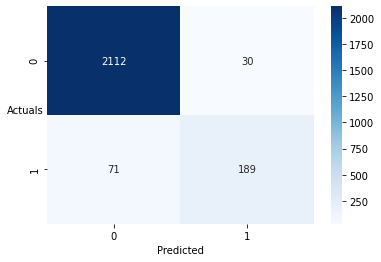

In [852]:
sns.heatmap((metrics.confusion_matrix(train['default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [853]:
print(metrics.classification_report(train['default'],y_class_pred,digits=3))

              precision    recall  f1-score   support

           0      0.967     0.986     0.977      2142
           1      0.863     0.727     0.789       260

    accuracy                          0.958      2402
   macro avg      0.915     0.856     0.883      2402
weighted avg      0.956     0.958     0.956      2402



## Prediction on the Data

In [854]:
y_prob_pred_29 = model_29.predict()

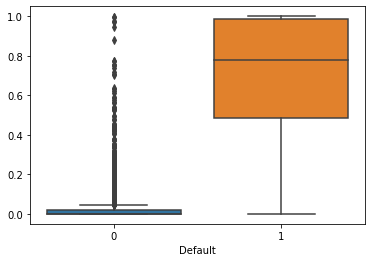

In [855]:
sns.boxplot(x=train['default'],y=y_prob_pred_29)
plt.xlabel('Default');

### Choosing the optimal threshold

In [856]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train['default'],y_prob_pred_29)

In [857]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.181723567422846

In [858]:
print('The Optimum Threshold for the data:',optimal_threshold)

The Optimum Threshold for the data: 0.181723567422846


In [859]:
y_class_pred_29=[]
for i in range(0,len(y_prob_pred_29)):
    if np.array(y_prob_pred_train)[i]>0.18:
        a=1
    else:
        a=0
    y_class_pred_29.append(a)

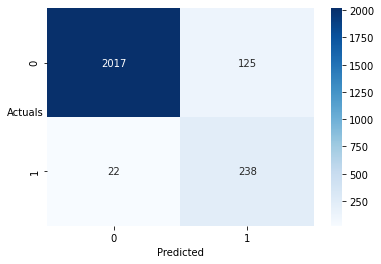

In [860]:
sns.heatmap((metrics.confusion_matrix(train['default'],y_class_pred_29)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [861]:
print(metrics.classification_report(train['default'],y_class_pred_29,digits=3))

              precision    recall  f1-score   support

           0      0.989     0.942     0.965      2142
           1      0.656     0.915     0.764       260

    accuracy                          0.939      2402
   macro avg      0.822     0.929     0.864      2402
weighted avg      0.953     0.939     0.943      2402



### Validating on the test set

In [862]:
y_prob_pred_test = model_29.predict(test)

In [863]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_test)):
    if np.array(y_prob_pred_test)[i]>0.18:
        a=1
    else:
        a=0
    y_class_pred.append(a)

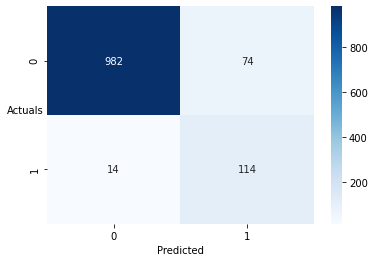

In [864]:
sns.heatmap((metrics.confusion_matrix(test['default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [865]:
print(metrics.classification_report(test['default'],y_class_pred,digits=3))

              precision    recall  f1-score   support

           0      0.986     0.930     0.957      1056
           1      0.606     0.891     0.722       128

    accuracy                          0.926      1184
   macro avg      0.796     0.910     0.839      1184
weighted avg      0.945     0.926     0.932      1184



In [866]:
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score
log_train_acc = round(accuracy_score(train['default'],y_class_pred_29),2)
log_train_recall = round(recall_score(train['default'],y_class_pred_29,pos_label=1,average='binary'),2)
log_train_precision = round(precision_score(train['default'],y_class_pred_29,pos_label=1,average='binary'),2)
log_train_f1score = round(f1_score(train['default'],y_class_pred_29,pos_label=1,average='binary'),2)

In [867]:
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score
log_test_acc = round(accuracy_score(test['default'],y_class_pred),2)
log_test_precision = round(precision_score(test['default'],y_class_pred,pos_label=1,average='binary'),2)
log_test_recall = round(recall_score(test['default'],y_class_pred,pos_label=1,average='binary'),2)
log_test_f1score = round(f1_score(test['default'],y_class_pred,pos_label=1,average='binary'),2)

In [868]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
grid = {
    'penalty':['l2','none'],
    'solver' : ['saga','lbfgs','sag','liblinear'],
    'tol' : [0.0001,0.00001,0.001,0.000001]
}

LogRegmodel1 = LogisticRegression(max_iter=10000,n_jobs=2,random_state=1)
grid_search = GridSearchCV(LogRegmodel1,param_grid=grid,cv=5,n_jobs=-1,scoring='f1')
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=10000, multi_class='auto',
                                          n_jobs=2, penalty='l2',
                                          random_state=1, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'penalty': ['l2', 'none'],
                         'solver': ['saga', 'lbfgs', 'sag', 'liblinear'],
                         'tol': [0.0001, 1e-05, 0.001, 1e-06]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=0)

In [869]:
log_best_model = grid_search.best_estimator_
log_best_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=2, penalty='none', random_state=1,
                   solver='saga', tol=0.0001, verbose=0, warm_start=False)

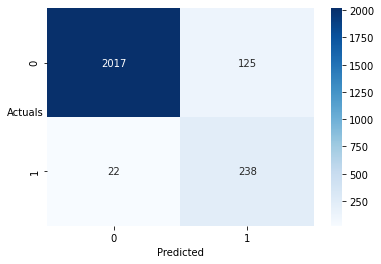

In [870]:
sns.heatmap((metrics.confusion_matrix(y_train,y_class_pred_29)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [871]:
print(metrics.classification_report(y_train,y_class_pred_29,digits=3))

              precision    recall  f1-score   support

           0      0.989     0.942     0.965      2142
           1      0.656     0.915     0.764       260

    accuracy                          0.939      2402
   macro avg      0.822     0.929     0.864      2402
weighted avg      0.953     0.939     0.943      2402



AUC of the Logistic Regression for Train data: 0.978


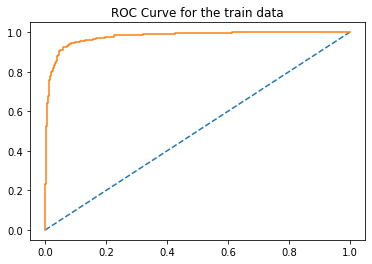

In [872]:
# predict probabilities
probs = log_best_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
log_train_auc = roc_auc_score(y_train, probs)
print('AUC of the Logistic Regression for Train data: %.3f' % log_train_auc)
# calculate roc curve
log_train_fpr, log_train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(log_train_fpr, log_train_tpr);
plt.title('ROC Curve for the train data');

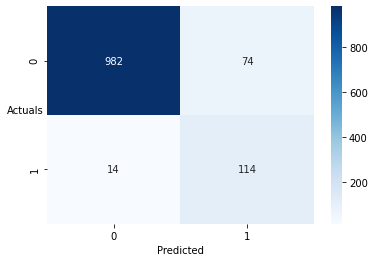

In [873]:
sns.heatmap((metrics.confusion_matrix(y_test,y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [874]:
print(metrics.classification_report(y_test,y_class_pred,digits=3))

              precision    recall  f1-score   support

           0      0.986     0.930     0.957      1056
           1      0.606     0.891     0.722       128

    accuracy                          0.926      1184
   macro avg      0.796     0.910     0.839      1184
weighted avg      0.945     0.926     0.932      1184



AUC of the Logistic Regression for Test data: 0.968


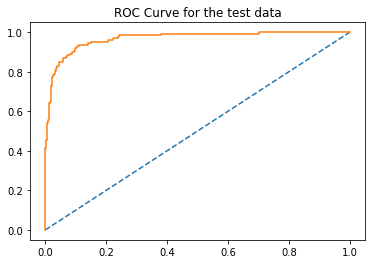

In [875]:
# predict probabilities
probs = log_best_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
log_test_auc = roc_auc_score(y_test, probs)
print('AUC of the Logistic Regression for Test data: %.3f' % log_test_auc)
# calculate roc curve
logr_test_fpr, logr_test_tpr, train_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(logr_test_fpr, logr_test_tpr);
plt.title('ROC Curve for the test data');

### EDA

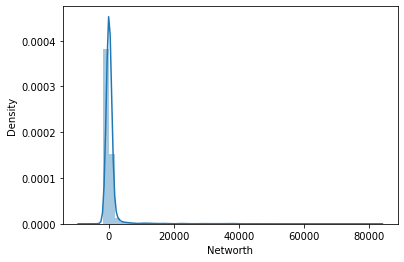

In [876]:
sns.distplot(credit['Networth'])

In [877]:
df_credit1 = credit[['Networth','PBITM_perc_Latest','CEPS_annualised_Unit_Curr','Market_Capitalisation','Total_Debt','ROG_Net_Worth_perc','Book_Value_Adj_Unit_Curr','ROG_Cost_of_Prod_perc','Curr_Ratio_Latest','Debtors_Vel_Days','Inventory_Ratio_Latest','Co_Code']]

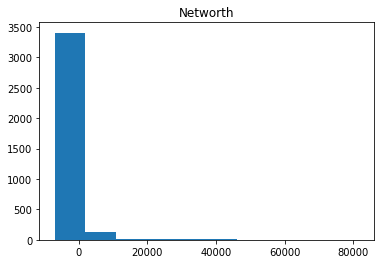

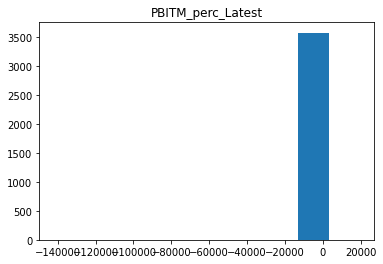

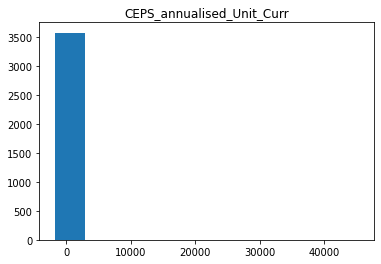

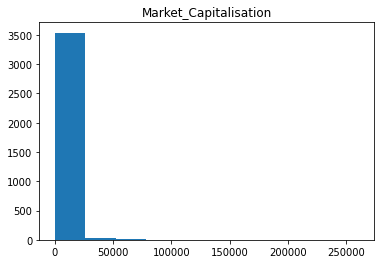

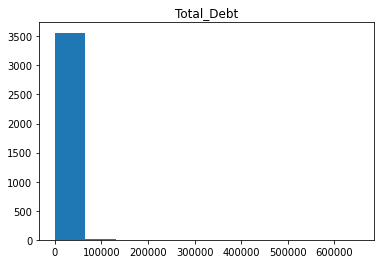

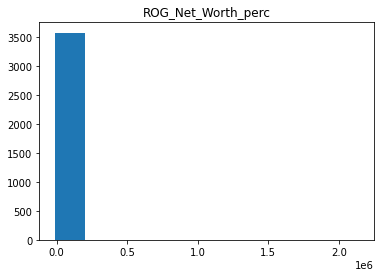

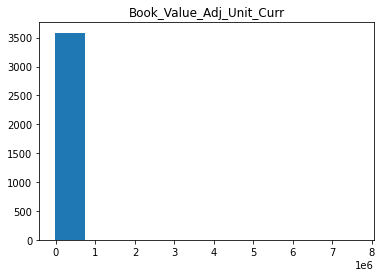

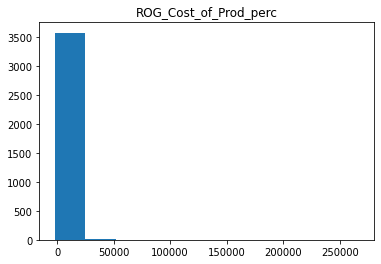

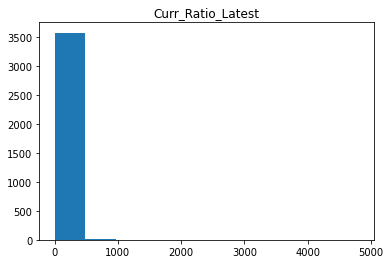

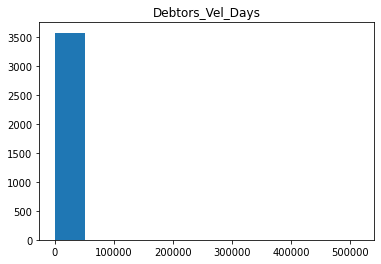

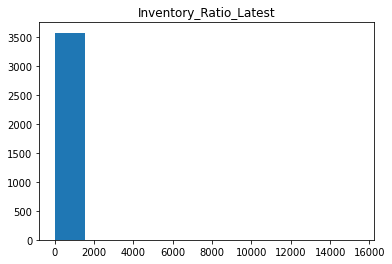

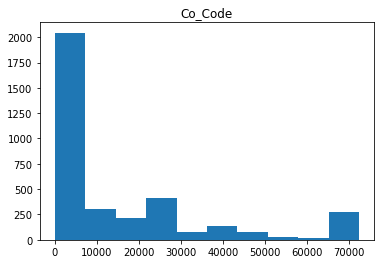

In [878]:
for i in df_credit1.columns:
    plt.figure()
    plt.hist(df_credit1[i].astype('float'))
    plt.title(i)
    plt.show()

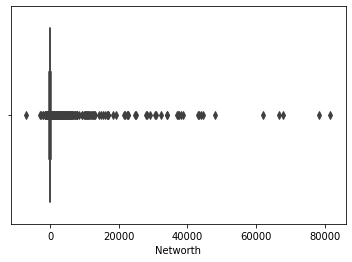

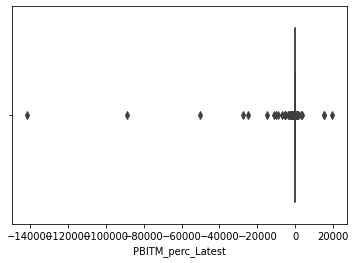

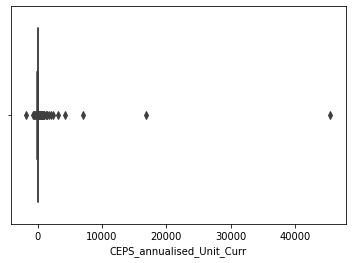

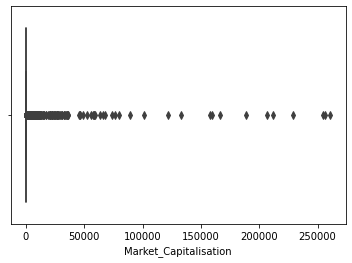

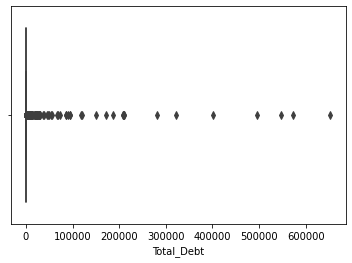

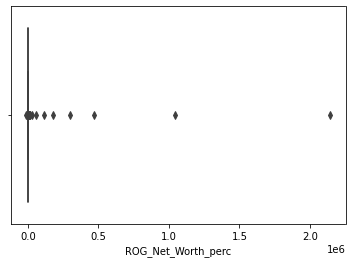

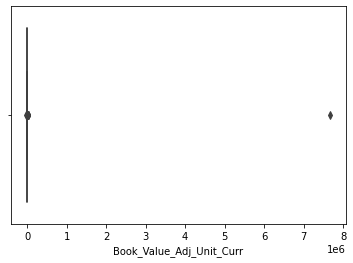

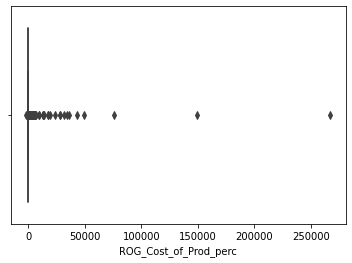

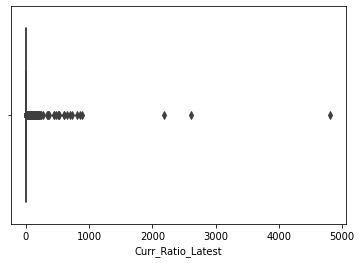

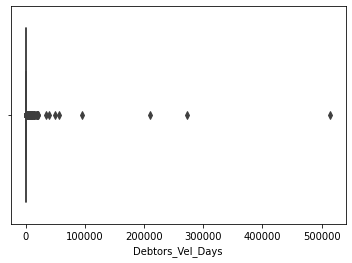

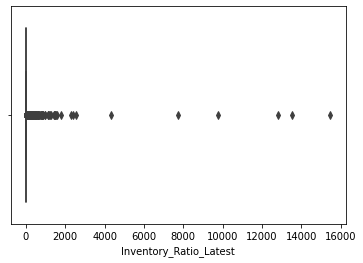

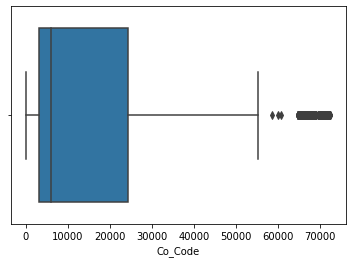

In [879]:
for col in df_credit1:
    plt.figure()
    sns.boxplot(df_credit1[col])

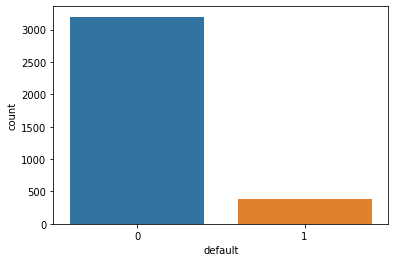

In [880]:
sns.countplot(credit['default'])

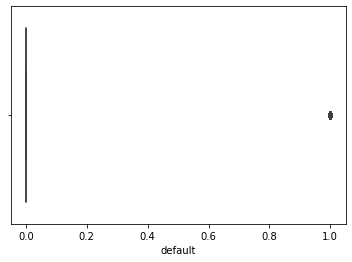

In [881]:
sns.boxplot(credit['default'])

In [882]:
credit['default'].value_counts()

0    3198
1     388
Name: default, dtype: int64

In [883]:
credit['default'].value_counts(normalize = True)

0   0.89
1   0.11
Name: default, dtype: float64

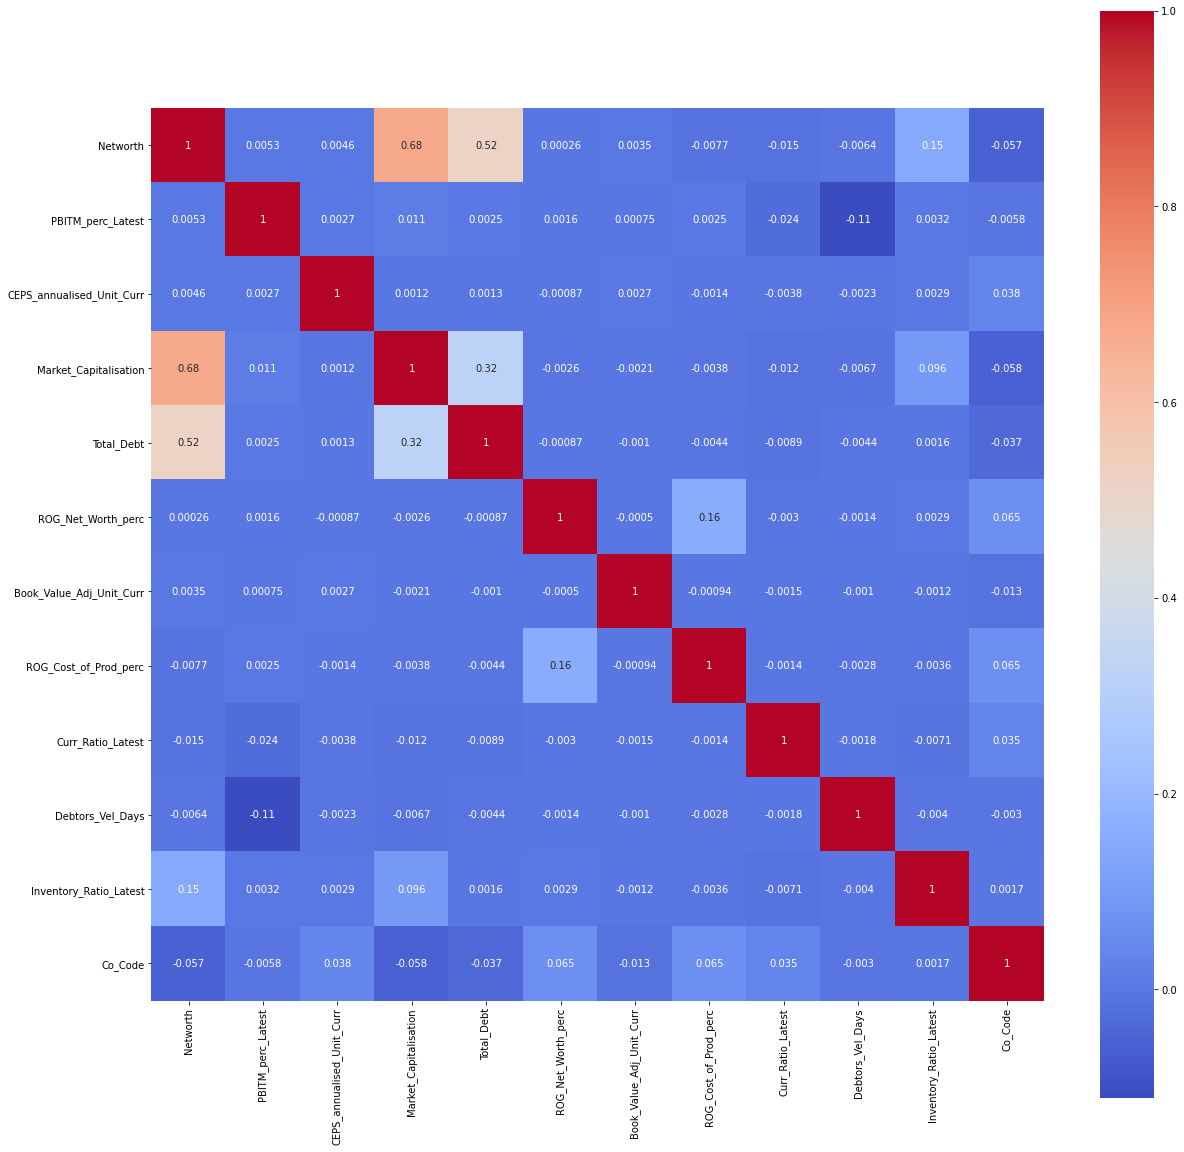

In [884]:
plt.figure(figsize=(20,20))
sns.heatmap(df_credit1.corr(), annot=True,cmap='coolwarm',square=True)

### Model Building - Random Forest

In [885]:
train.head()

,Co_Code,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block,Net_Working_Capital,Curr_Assets,Curr_Liab_and_Prov,Total_Assets_to_Liab,Gross_Sales,Net_Sales,Other_Income,Value_Of_Output,Cost_of_Prod,Selling_Cost,PBIDT,PBDT,PBIT,PBT,PAT,Adjusted_PAT,CP,Rev_earn_in_forex,Rev_exp_in_forex,Capital_exp_in_forex,Book_Value_Unit_Curr,Book_Value_Adj_Unit_Curr,Market_Capitalisation,CEPS_annualised_Unit_Curr,Cash_Flow_From_Opr,Cash_Flow_From_Inv,Cash_Flow_From_Fin,ROG_Net_Worth_perc,ROG_Capital_Employed_perc,ROG_Gross_Block_perc,ROG_Gross_Sales_perc,ROG_Net_Sales_perc,ROG_Cost_of_Prod_perc,ROG_Total_Assets_perc,ROG_PBIDT_perc,ROG_PBDT_perc,ROG_PBIT_perc,ROG_PBT_perc,ROG_PAT_perc,ROG_CP_perc,ROG_Rev_earn_in_forex_perc,ROG_Rev_exp_in_forex_perc,ROG_Market_Capitalisation_perc,Curr_Ratio_Latest,Fixed_Assets_Ratio_Latest,Inventory_Ratio_Latest,Debtors_Ratio_Latest,Total_Asset_Turnover_Ratio_Latest,Interest_Cover_Ratio_Latest,PBIDTM_perc_Latest,PBITM_perc_Latest,PBDTM_perc_Latest,CPM_perc_Latest,APATM_perc_Latest,Debtors_Vel_Days,Creditors_Vel_Days,Inventory_Vel_Days,Value_of_Output_to_Total_Assets,Value_of_Output_to_Gross_Block,default
842,-0.46,-0.77,-0.62,-0.72,-0.69,-0.69,-0.57,-0.72,-0.71,-0.73,-0.71,-0.71,-0.71,-0.71,-0.71,-0.66,-0.59,-0.48,-0.54,-0.40,-0.39,-0.38,-0.49,-0.61,-0.62,-0.07,-0.58,-0.55,-0.67,-0.49,-0.44,0.41,0.29,-0.27,-0.26,-0.30,-0.13,-0.13,-0.11,-0.44,-0.55,-0.47,-0.90,-0.78,-0.75,-0.35,-0.06,-0.02,-0.48,1.95,-0.77,-0.83,-0.90,-0.79,-0.53,1.56,1.49,1.89,1.88,1.80,-0.92,-0.92,-0.84,-0.80,-0.76,0
1057,2.40,-0.66,-0.61,-0.71,-0.70,-0.70,-0.56,-0.72,-0.71,-0.72,-0.70,-0.70,-0.50,-0.70,-0.70,-0.63,-0.57,-0.46,-0.51,-0.35,-0.33,-0.31,-0.45,-0.61,-0.62,-0.07,-0.57,-0.54,-0.67,-0.42,-0.47,0.20,0.51,1.85,1.94,1.81,1.19,1.19,0.86,2.01,1.89,1.91,1.90,1.95,1.96,1.89,-0.06,-0.02,-0.48,1.95,0.00,2.22,0.78,-0.20,-1.59,-0.62,-0.88,-0.61,-0.65,-1.20,-0.82,-0.73,-0.75,0.22,0.19,0
1595,0.57,-0.07,-0.53,-0.67,-0.70,-0.70,-0.39,-0.64,-0.71,-0.70,-0.71,-0.71,-0.49,-0.71,-0.71,-0.67,-0.59,-0.48,-0.52,-0.37,-0.37,-0.35,-0.48,-0.61,-0.62,-0.07,-0.74,-0.74,1.72,-0.53,-0.44,0.41,0.30,-0.20,-0.19,-0.39,-1.13,-1.12,-1.83,-0.27,-0.11,-0.08,-0.06,-0.04,-0.02,-0.06,-0.06,-0.02,-1.12,1.95,-0.83,-0.55,-0.63,-0.65,-0.53,-0.47,-0.37,-0.34,-0.35,-0.20,2.17,-0.92,2.39,-0.35,-0.82,0
100,-0.62,2.08,-1.19,-1.01,-0.66,-0.55,-2.04,-0.69,0.79,-0.62,-0.71,-0.71,-0.61,-0.71,-0.71,-0.66,-2.08,-1.86,-1.97,-1.70,-1.68,-1.67,-1.86,-0.61,-0.62,-0.07,-0.90,-0.93,-0.62,-2.00,-0.44,0.41,0.30,-1.74,-1.94,-0.39,-1.40,-1.40,-0.98,-2.01,-1.90,-1.91,-1.91,-1.92,-1.94,-1.90,-0.06,-0.02,-0.83,-1.15,-0.82,1.97,2.22,-0.89,-0.53,-2.06,-1.87,-1.84,-1.82,-1.60,2.17,-0.70,0.09,-0.92,-0.80,1
1191,2.40,-0.71,-0.60,-0.63,-0.49,-0.64,-0.50,-0.57,-0.47,-0.62,-0.07,-0.05,0.06,-0.06,0.08,-0.51,-0.44,-0.37,-0.37,-0.28,-0.28,-0.26,-0.38,-0.61,-0.62,-0.07,-0.51,-0.73,-0.67,-0.16,-0.45,0.37,0.21,0.69,0.10,-0.00,0.43,0.43,0.46,0.55,0.19,0.27,0.12,0.11,0.25,0.46,-0.06,-0.02,-0.48,-0.59,2.05,-0.83,0.11,2.50,0.34,-0.33,-0.21,-0.23,-0.26,-0.12,-0.27,-0.51,-0.84,2.66,2.08,0


In [886]:
test.head()

,Co_Code,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block,Net_Working_Capital,Curr_Assets,Curr_Liab_and_Prov,Total_Assets_to_Liab,Gross_Sales,Net_Sales,Other_Income,Value_Of_Output,Cost_of_Prod,Selling_Cost,PBIDT,PBDT,PBIT,PBT,PAT,Adjusted_PAT,CP,Rev_earn_in_forex,Rev_exp_in_forex,Capital_exp_in_forex,Book_Value_Unit_Curr,Book_Value_Adj_Unit_Curr,Market_Capitalisation,CEPS_annualised_Unit_Curr,Cash_Flow_From_Opr,Cash_Flow_From_Inv,Cash_Flow_From_Fin,ROG_Net_Worth_perc,ROG_Capital_Employed_perc,ROG_Gross_Block_perc,ROG_Gross_Sales_perc,ROG_Net_Sales_perc,ROG_Cost_of_Prod_perc,ROG_Total_Assets_perc,ROG_PBIDT_perc,ROG_PBDT_perc,ROG_PBIT_perc,ROG_PBT_perc,ROG_PAT_perc,ROG_CP_perc,ROG_Rev_earn_in_forex_perc,ROG_Rev_exp_in_forex_perc,ROG_Market_Capitalisation_perc,Curr_Ratio_Latest,Fixed_Assets_Ratio_Latest,Inventory_Ratio_Latest,Debtors_Ratio_Latest,Total_Asset_Turnover_Ratio_Latest,Interest_Cover_Ratio_Latest,PBIDTM_perc_Latest,PBITM_perc_Latest,PBDTM_perc_Latest,CPM_perc_Latest,APATM_perc_Latest,Debtors_Vel_Days,Creditors_Vel_Days,Inventory_Vel_Days,Value_of_Output_to_Total_Assets,Value_of_Output_to_Gross_Block,default
251,-0.81,-0.84,-0.70,-0.74,-0.64,-0.69,-0.66,-0.73,-0.64,-0.73,-0.71,-0.71,-0.71,-0.70,-0.70,-0.66,-0.62,-0.56,-0.57,-0.51,-0.54,-0.46,-0.58,-0.61,-0.26,-0.07,-1.18,-1.27,-0.62,-1.02,-0.47,0.41,0.34,-1.74,-1.94,-0.39,-0.21,-0.21,1.84,2.01,-1.90,-1.32,-1.91,-1.06,-1.02,-1.34,-0.06,-0.02,-0.76,-0.75,2.05,0.26,-0.10,1.52,-0.53,-0.54,-0.47,-0.73,-0.79,-0.86,-0.27,0.30,2.39,2.08,1.82,1
3493,-0.86,2.08,1.89,1.94,1.96,2.01,1.93,1.97,1.96,1.97,1.98,1.98,1.92,1.99,1.99,-0.67,1.88,1.78,1.85,1.74,1.73,1.74,1.78,1.83,1.86,-0.07,2.03,2.02,1.92,1.90,1.79,1.74,-1.72,-0.11,-0.34,-0.60,0.30,0.30,0.05,-0.30,-0.07,0.04,0.16,0.48,0.41,0.01,-0.04,-0.02,-0.33,-0.36,-0.77,2.22,2.22,-0.71,0.22,1.95,1.87,1.89,1.88,1.80,-0.69,-0.46,-0.57,-0.72,-0.76,0
3063,-0.71,1.31,1.89,0.95,-0.70,-0.66,-0.56,-0.69,-0.67,0.52,-0.70,-0.70,-0.70,-0.70,-0.71,-0.59,-0.53,-0.38,-0.45,-0.22,-0.17,-0.17,-0.37,-0.61,-0.62,-0.07,1.05,1.40,0.41,-0.48,-0.57,0.57,0.30,-0.26,-0.23,-1.70,-1.22,-1.22,-0.42,-0.28,-0.53,-0.44,-0.45,-0.34,1.17,1.49,-0.06,-0.02,0.37,1.25,-0.43,-0.83,-0.90,-0.87,-0.53,-1.31,-1.43,-1.38,1.88,1.80,-0.92,-0.86,-0.84,-0.92,-0.64,0
2384,-0.79,-0.78,-0.09,-0.30,-0.32,-0.44,0.46,-0.02,-0.30,-0.33,-0.27,-0.28,-0.60,-0.29,-0.20,0.28,-0.68,-0.81,-0.74,-1.08,-0.94,-0.94,-0.67,-0.40,1.00,-0.07,-0.06,0.05,0.25,-0.69,-0.31,-0.05,0.35,-0.52,-0.23,-1.70,-0.30,-0.30,-0.45,-0.09,0.25,-0.05,0.27,0.07,0.16,0.10,-0.06,-0.02,1.44,-0.30,0.02,-0.28,-0.47,0.22,-0.36,-0.32,-0.29,-0.42,-0.23,-0.23,1.56,0.15,0.62,0.24,-0.09,0
1679,-0.78,-0.47,-0.53,-0.67,-0.70,-0.59,-0.60,-0.73,-0.70,-0.69,-0.70,-0.70,-0.71,-0.69,-0.70,-0.66,-0.51,-0.35,-0.46,-0.25,-0.24,-0.22,-0.35,-0.61,-0.62,-0.07,-0.44,-0.38,-0.18,-0.28,-0.35,-0.30,0.30,0.23,0.18,1.81,1.85,1.86,1.84,0.43,0.57,0.50,0.40,0.33,0.25,0.46,-0.06,-0.02,-0.09,1.95,2.05,0.20,-0.90,-0.73,-0.53,1.95,1.87,1.89,1.88,1.80,-0.39,-0.92,1.01,-0.70,-0.67,0


In [887]:
X = df_credit.drop('default', axis = 1)
y = df_credit['default']

In [888]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42, stratify = y)

In [889]:
print(X_train.shape)
print(X_test.shape)

(2402, 65)
(1184, 65)


In [890]:
from sklearn.ensemble import RandomForestClassifier

In [891]:
rf = RandomForestClassifier(n_estimators=301,max_features = 10,oob_score= True, random_state=1)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=10,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=301,
                       n_jobs=None, oob_score=True, random_state=1, verbose=0,
                       warm_start=False)

In [892]:
rf.oob_score_

0.97751873438801

In [893]:
ytrain_predict = rf.predict(X_train)
ytest_predict = rf.predict(X_test)

In [894]:
rf.score(X_train,y_train)

1.0

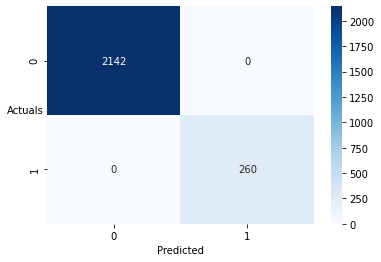

In [895]:
sns.heatmap((metrics.confusion_matrix(train['default'],ytrain_predict)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [896]:
print(metrics.classification_report(train['default'],ytrain_predict,digits=3))

              precision    recall  f1-score   support

           0      1.000     1.000     1.000      2142
           1      1.000     1.000     1.000       260

    accuracy                          1.000      2402
   macro avg      1.000     1.000     1.000      2402
weighted avg      1.000     1.000     1.000      2402



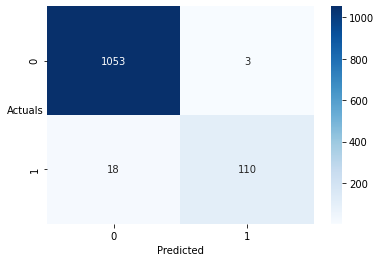

In [897]:
sns.heatmap((metrics.confusion_matrix(test['default'],ytest_predict)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [898]:
print(metrics.classification_report(test['default'],ytest_predict,digits=3))

              precision    recall  f1-score   support

           0      0.983     0.997     0.990      1056
           1      0.973     0.859     0.913       128

    accuracy                          0.982      1184
   macro avg      0.978     0.928     0.951      1184
weighted avg      0.982     0.982     0.982      1184



In [899]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [8, 9, 10],
    'max_features': [10, 13, 16],
    'min_samples_leaf': [18, 20],
    'min_samples_split': [45, 50],
    'n_estimators': [101]
}

rfcl = RandomForestClassifier()

rf_grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid)



In [900]:
rf_grid_search.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [901]:
rf_grid_search.best_params_

{'max_depth': 10,
 'max_features': 10,
 'min_samples_leaf': 20,
 'min_samples_split': 45,
 'n_estimators': 101}

In [902]:
rf_best_grid = rf_grid_search.best_estimator_

In [903]:
ytrain_predict = rf_best_grid.predict(X_train)
ytest_predict = rf_best_grid.predict(X_test)

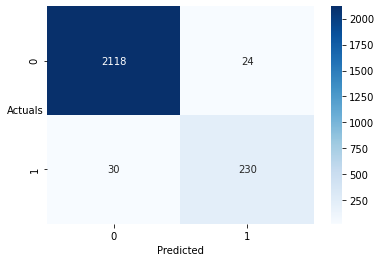

In [904]:
sns.heatmap((metrics.confusion_matrix(train['default'],ytrain_predict)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [905]:
print(metrics.classification_report(train['default'],ytrain_predict,digits=3))

              precision    recall  f1-score   support

           0      0.986     0.989     0.987      2142
           1      0.906     0.885     0.895       260

    accuracy                          0.978      2402
   macro avg      0.946     0.937     0.941      2402
weighted avg      0.977     0.978     0.977      2402



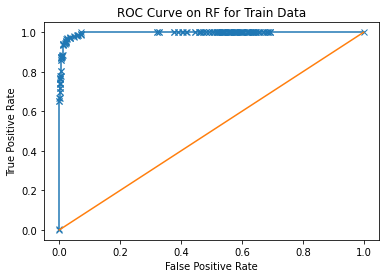

AUC score on RF for Train Data: 0.9962166918049271


In [906]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_train_fpr, rf_train_tpr,_=roc_curve(y_train,rf_best_grid.predict_proba(X_train)[:,1])
#plt.figure(figsize=(10,5))
plt.plot(rf_train_fpr,rf_train_tpr, marker='x', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve on RF for Train Data')
plt.show()
rf_train_auc = roc_auc_score(y_train,rf_best_grid.predict_proba(X_train)[:,1])
print('AUC score on RF for Train Data:', rf_train_auc)

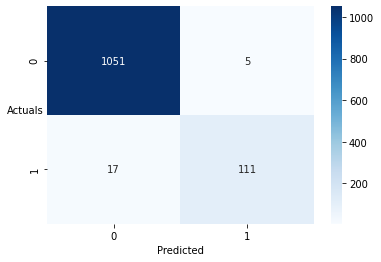

In [907]:
sns.heatmap((metrics.confusion_matrix(test['default'],ytest_predict)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [908]:
print(metrics.classification_report(test['default'],ytest_predict,digits=3))

              precision    recall  f1-score   support

           0      0.984     0.995     0.990      1056
           1      0.957     0.867     0.910       128

    accuracy                          0.981      1184
   macro avg      0.970     0.931     0.950      1184
weighted avg      0.981     0.981     0.981      1184



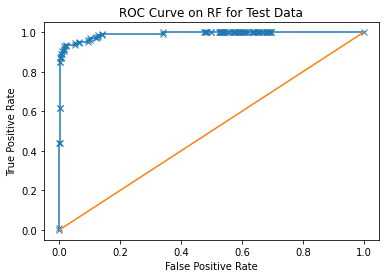

AUC score on RF for Test Data: 0.9903823390151516


In [909]:
#from sklearn.metrics import roc_curve,roc_auc_score
rf_test_fpr, rf_test_tpr,_=roc_curve(y_test,rf_best_grid.predict_proba(X_test)[:,1])
#plt.figure(figsize=(10,5))
plt.plot(rf_test_fpr,rf_test_tpr, marker='x', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve on RF for Test Data')
plt.show()
rf_test_auc = roc_auc_score(y_test,rf_best_grid.predict_proba(X_test)[:,1])
print('AUC score on RF for Test Data:', rf_test_auc)

In [910]:
from sklearn.metrics import precision_score,recall_score,f1_score
rf_train_recall = round(recall_score(y_train,ytrain_predict,pos_label=1,average='binary'),2)
rf_train_precision = round(precision_score(y_train,ytrain_predict,pos_label=1,average='binary'),2)
rf_train_f1score = round(f1_score(y_train,ytrain_predict,pos_label=1,average='binary'),2)

In [911]:
from sklearn.metrics import precision_score,recall_score,f1_score
rf_test_recall = round(recall_score(y_test,ytest_predict,pos_label=1,average='binary'),2)
rf_test_precision = round(precision_score(y_test,ytest_predict,pos_label=1,average='binary'),2)
rf_test_f1score = round(f1_score(y_test,ytest_predict,pos_label=1,average='binary'),2)

In [912]:
rf_Feat_Imp = rf_best_grid.feature_importances_

In [913]:
rf_Feat_Imp

array([1.89942681e-03, 3.29159409e-04, 2.06401594e-01, 3.88531902e-02,
       5.28166723e-03, 5.41561986e-04, 8.96083936e-03, 5.59480587e-04,
       1.55564785e-03, 2.74028642e-03, 1.07110889e-03, 3.19498576e-04,
       3.91135757e-04, 9.27111058e-04, 9.58191493e-04, 2.28541148e-04,
       1.54767709e-02, 2.10470357e-02, 1.85901542e-02, 6.33465181e-03,
       7.40979994e-03, 3.13458776e-03, 1.79008053e-02, 5.47468625e-05,
       5.15337830e-04, 4.52707962e-05, 2.48672583e-01, 2.85114154e-01,
       8.13191063e-04, 1.18719461e-02, 2.60994534e-04, 1.18389770e-04,
       9.13254878e-04, 9.65667910e-03, 3.46886857e-03, 1.23518722e-04,
       3.55460394e-04, 1.98343734e-04, 8.86254303e-04, 8.90139265e-04,
       7.27361491e-04, 7.30009828e-04, 2.98758725e-04, 2.37147787e-04,
       1.11929383e-03, 1.82621265e-03, 3.37213745e-05, 1.01924873e-05,
       2.61040602e-04, 4.51421538e-02, 2.22241415e-03, 6.04623392e-05,
       1.33065478e-04, 2.53751828e-03, 1.90930063e-03, 6.46694127e-03,
      

In [914]:
rf_Feat_Imp_df=pd.DataFrame(rf_Feat_Imp, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False)

In [915]:
rf_Feat_Imp_df.head(20)

,Imp
Book_Value_Adj_Unit_Curr,0.29
Book_Value_Unit_Curr,0.25
Networth,0.21
Curr_Ratio_Latest,0.05
Capital_Employed,0.04
PBDT,0.02
PBIT,0.02
CP,0.02
PBIDT,0.02
CEPS_annualised_Unit_Curr,0.01


Text(0.5, 1.0, 'Importance of Features in Random Forest')

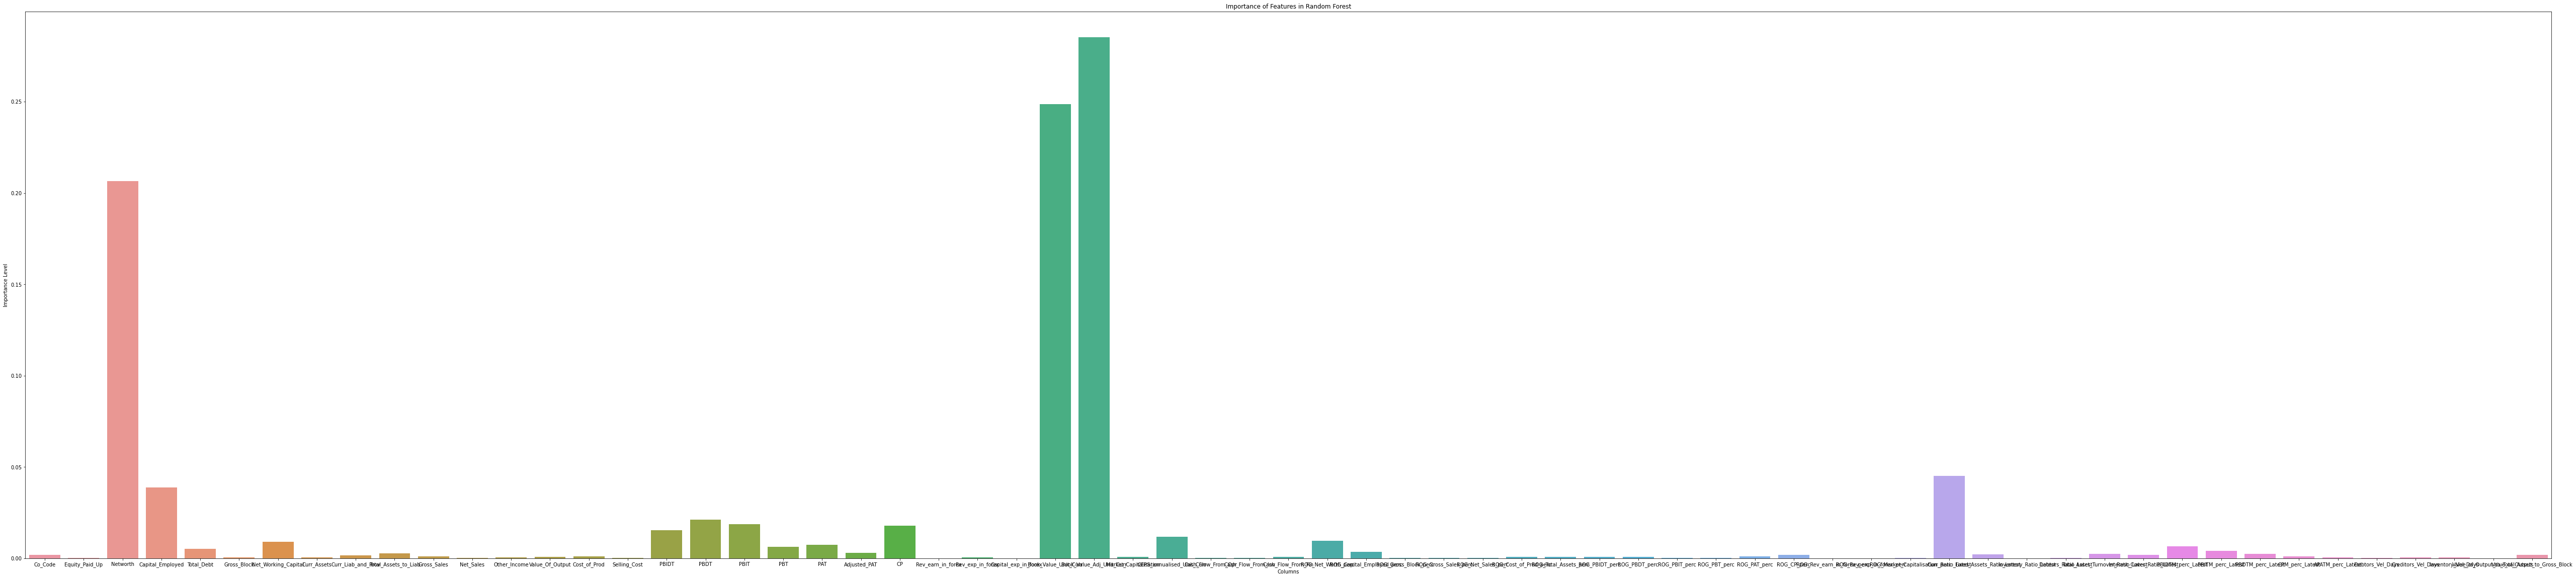

In [916]:
col = X_train.columns
plt.figure(figsize=(90,20))
sns.barplot(x=col, y=rf_Feat_Imp)
plt.xlabel('Columns')
plt.ylabel('Importance Level')
plt.title('Importance of Features in Random Forest')

In [917]:
df_credit_imp = df_credit[['Networth','Capital_Employed','Book_Value_Adj_Unit_Curr','Book_Value_Unit_Curr','Curr_Ratio_Latest','PBIDT','PBDT','CP','PBIT','CEPS_annualised_Unit_Curr','PAT','ROG_Net_Worth_perc','PBT','Net_Working_Capital','Adjusted_PAT','CPM_perc_Latest','Total_Asset_Turnover_Ratio_Latest']]

In [918]:
df_credit_imp

,Networth,Capital_Employed,Book_Value_Adj_Unit_Curr,Book_Value_Unit_Curr,Curr_Ratio_Latest,PBIDT,PBDT,CP,PBIT,CEPS_annualised_Unit_Curr,PAT,ROG_Net_Worth_perc,PBT,Net_Working_Capital,Adjusted_PAT,CPM_perc_Latest,Total_Asset_Turnover_Ratio_Latest
0,-2.12,-2.28,-2.20,-2.21,-1.14,-2.08,-1.86,-1.86,-1.97,-2.00,-1.68,-1.36,-1.70,-2.13,-1.67,-0.43,-0.89
1,-2.12,1.94,-1.06,-1.01,-1.11,1.88,-0.80,-0.86,1.50,-0.54,-1.68,-1.74,-1.70,-2.13,-1.67,-1.82,-0.62
2,1.89,1.94,1.12,0.81,-0.57,-2.08,-1.86,-1.86,-1.97,-2.00,-1.68,-1.74,-1.70,1.93,-1.67,-1.82,-0.89
3,-2.12,1.94,-1.55,-1.42,-1.10,-2.08,-1.86,-1.86,-1.97,-2.00,-1.68,-1.74,-1.70,-2.13,-1.67,-1.82,-0.89
4,-2.12,1.94,-2.20,-2.21,-0.88,-2.08,-1.86,-1.86,-1.97,-2.00,-1.68,-1.74,-1.70,1.93,-1.67,1.88,-0.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3581,1.89,1.94,2.02,2.03,-1.15,1.88,1.78,1.78,1.85,1.90,1.73,1.85,1.74,-0.62,1.74,-0.43,-0.89
3582,1.89,1.94,1.53,1.16,-0.93,1.88,1.78,1.78,1.85,0.57,1.73,-0.21,1.74,1.93,1.74,1.88,-0.62
3583,1.89,1.94,0.64,2.03,-0.73,1.88,1.78,1.78,1.85,1.90,1.73,-0.08,1.74,1.93,1.74,0.03,1.47
3584,1.89,1.94,1.22,0.89,-0.68,1.88,1.78,1.78,1.85,1.46,1.73,-0.63,1.74,1.93,1.74,1.16,-0.54


In [919]:
X = df_credit_imp
y = df_credit['default']

In [920]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42, stratify = y)

In [921]:
print(X_train.shape)
print(X_test.shape)

(2402, 17)
(1184, 17)


In [922]:
from sklearn.ensemble import RandomForestClassifier

In [923]:
rf = RandomForestClassifier(n_estimators=301,max_features = 10,oob_score= True, random_state=1)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=10,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=301,
                       n_jobs=None, oob_score=True, random_state=1, verbose=0,
                       warm_start=False)

In [924]:
rf.oob_score_

0.9762697751873439

In [925]:
ytrain_predict = rf.predict(X_train)
ytest_predict = rf.predict(X_test)

In [926]:
rf.score(X_train,y_train)

1.0

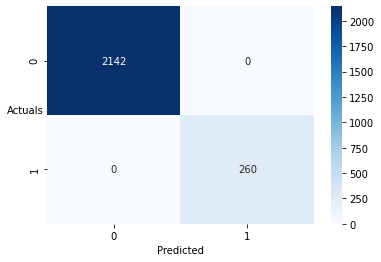

In [927]:
sns.heatmap((metrics.confusion_matrix(train['default'],ytrain_predict)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [928]:
print(metrics.classification_report(train['default'],ytrain_predict,digits=3))

              precision    recall  f1-score   support

           0      1.000     1.000     1.000      2142
           1      1.000     1.000     1.000       260

    accuracy                          1.000      2402
   macro avg      1.000     1.000     1.000      2402
weighted avg      1.000     1.000     1.000      2402



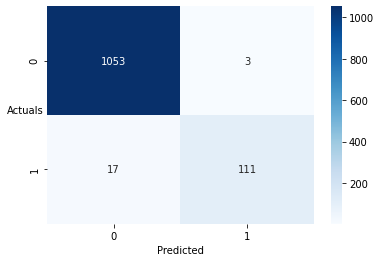

In [929]:
sns.heatmap((metrics.confusion_matrix(test['default'],ytest_predict)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [930]:
print(metrics.classification_report(test['default'],ytest_predict,digits=3))

              precision    recall  f1-score   support

           0      0.984     0.997     0.991      1056
           1      0.974     0.867     0.917       128

    accuracy                          0.983      1184
   macro avg      0.979     0.932     0.954      1184
weighted avg      0.983     0.983     0.983      1184



In [931]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [8, 10, 11],
    'max_features': [10, 12, 13],
    'min_samples_leaf': [16, 18, 20],
    'min_samples_split': [50, 60, 70],
    'n_estimators': [101,301]
}

rfcl = RandomForestClassifier()

rf_grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid)



In [932]:
rf_grid_search.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [933]:
rf_grid_search.best_params_

{'max_depth': 8,
 'max_features': 10,
 'min_samples_leaf': 16,
 'min_samples_split': 70,
 'n_estimators': 301}

In [934]:
rf_best_grid = rf_grid_search.best_estimator_

In [935]:
ytrain_predict = rf_best_grid.predict(X_train)
ytest_predict = rf_best_grid.predict(X_test)

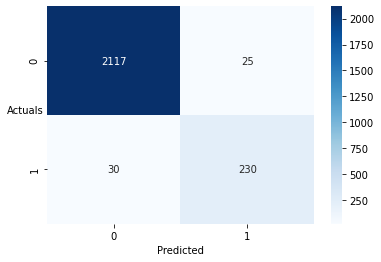

In [936]:
sns.heatmap((metrics.confusion_matrix(train['default'],ytrain_predict)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [937]:
print(metrics.classification_report(train['default'],ytrain_predict,digits=3))

              precision    recall  f1-score   support

           0      0.986     0.988     0.987      2142
           1      0.902     0.885     0.893       260

    accuracy                          0.977      2402
   macro avg      0.944     0.936     0.940      2402
weighted avg      0.977     0.977     0.977      2402



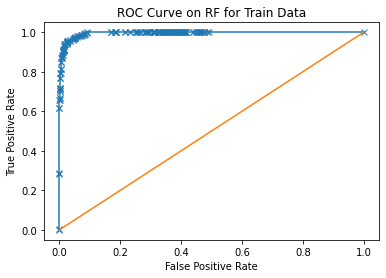

AUC score on RF for Train Data: 0.99522732169791


In [938]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_train_fpr, rf_train_tpr,_=roc_curve(y_train,rf_best_grid.predict_proba(X_train)[:,1])
#plt.figure(figsize=(10,5))
plt.plot(rf_train_fpr,rf_train_tpr, marker='x', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve on RF for Train Data')
plt.show()
rf_train_auc = roc_auc_score(y_train,rf_best_grid.predict_proba(X_train)[:,1])
print('AUC score on RF for Train Data:', rf_train_auc)

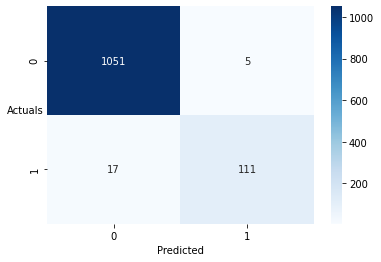

In [939]:
sns.heatmap((metrics.confusion_matrix(test['default'],ytest_predict)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [940]:
print(metrics.classification_report(test['default'],ytest_predict,digits=3))

              precision    recall  f1-score   support

           0      0.984     0.995     0.990      1056
           1      0.957     0.867     0.910       128

    accuracy                          0.981      1184
   macro avg      0.970     0.931     0.950      1184
weighted avg      0.981     0.981     0.981      1184



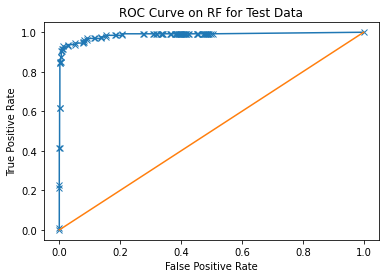

AUC score on RF for Test Data: 0.9864095052083335


In [941]:
#from sklearn.metrics import roc_curve,roc_auc_score
rf_test_fpr, rf_test_tpr,_=roc_curve(y_test,rf_best_grid.predict_proba(X_test)[:,1])
#plt.figure(figsize=(10,5))
plt.plot(rf_test_fpr,rf_test_tpr, marker='x', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve on RF for Test Data')
plt.show()
rf_test_auc = roc_auc_score(y_test,rf_best_grid.predict_proba(X_test)[:,1])
print('AUC score on RF for Test Data:', rf_test_auc)

In [942]:
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score
rf_train_recall = round(recall_score(y_train,ytrain_predict,pos_label=1,average='binary'),2)
rf_train_precision = round(precision_score(y_train,ytrain_predict,pos_label=1,average='binary'),2)
rf_train_f1score = round(f1_score(y_train,ytrain_predict,pos_label=1,average='binary'),2)
rf_train_acc = round(accuracy_score(y_train,ytrain_predict),2)

In [943]:
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score
rf_test_recall = round(recall_score(y_test,ytest_predict,pos_label=1,average='binary'),2)
rf_test_precision = round(precision_score(y_test,ytest_predict,pos_label=1,average='binary'),2)
rf_test_f1score = round(f1_score(y_test,ytest_predict,pos_label=1,average='binary'),2)
rf_test_acc = round(accuracy_score(y_test,y_test_p),2)

In [944]:
rf_Feat_Imp = rf_best_grid.feature_importances_

In [945]:
rf_Feat_Imp

array([0.35786767, 0.00241452, 0.37544004, 0.21617318, 0.00881681,
       0.00326268, 0.00659162, 0.00231394, 0.00401901, 0.00832336,
       0.00073918, 0.00685865, 0.00149514, 0.00048234, 0.00081609,
       0.00356413, 0.00082162])

In [946]:
rf_Feat_Imp_df=pd.DataFrame(rf_Feat_Imp, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False)

In [947]:
rf_Feat_Imp_df.head(20)

,Imp
Book_Value_Adj_Unit_Curr,0.38
Networth,0.36
Book_Value_Unit_Curr,0.22
Curr_Ratio_Latest,0.01
CEPS_annualised_Unit_Curr,0.01
ROG_Net_Worth_perc,0.01
PBDT,0.01
PBIT,0.00
CPM_perc_Latest,0.00
PBIDT,0.00


Text(0.5, 1.0, 'Importance of Features in Random Forest')

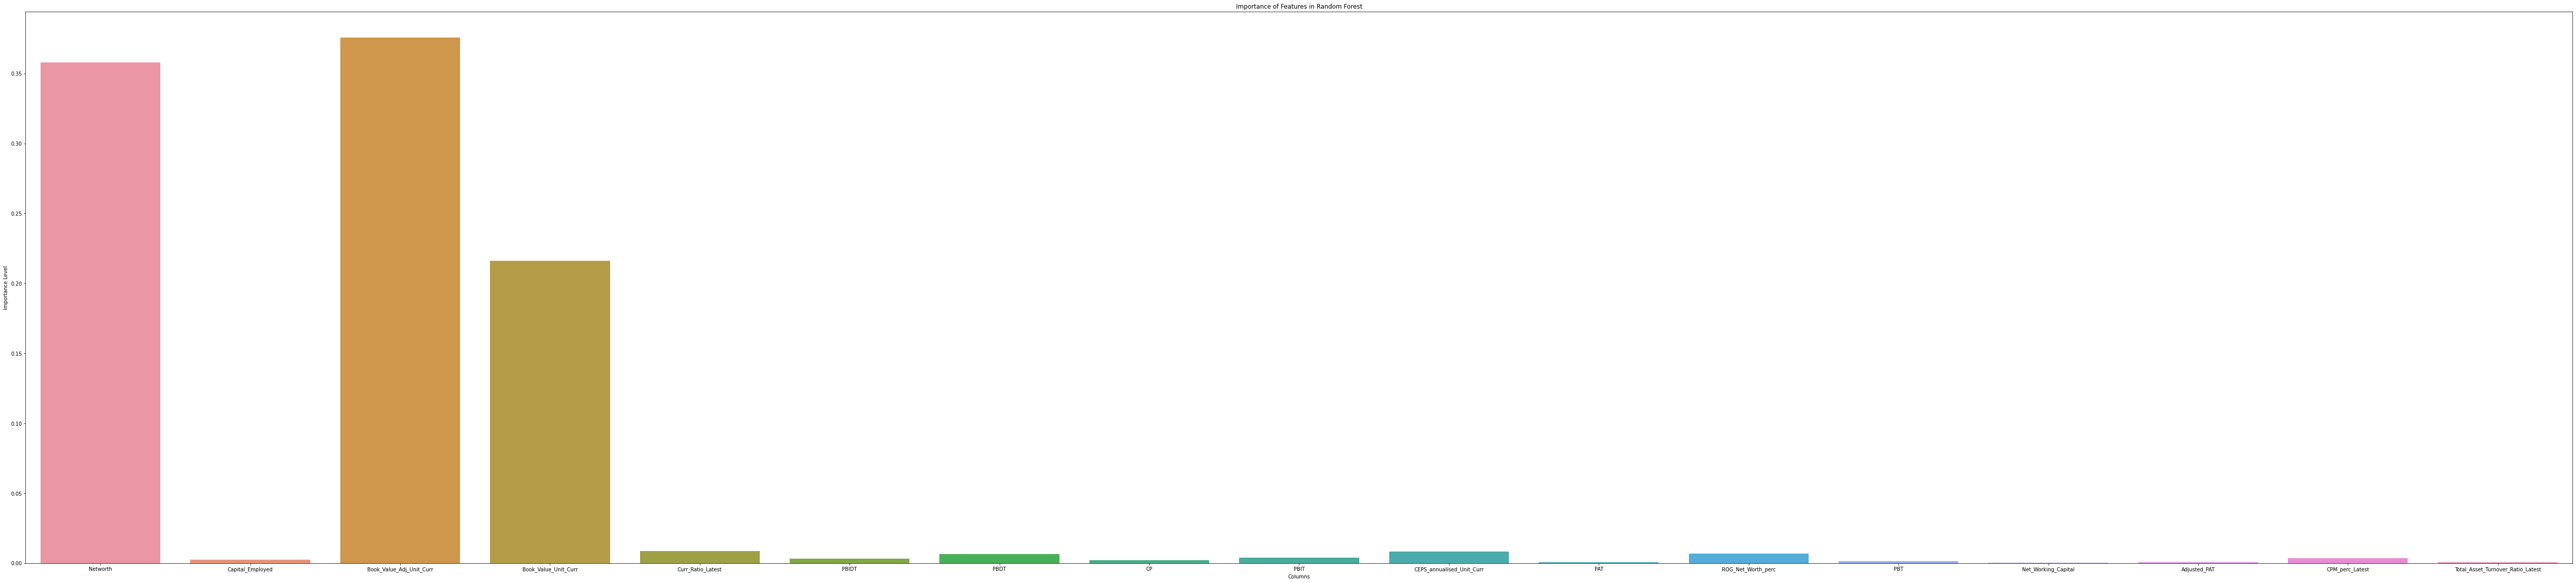

In [948]:
col = X_train.columns
plt.figure(figsize=(90,20))
sns.barplot(x=col, y=rf_Feat_Imp)
plt.xlabel('Columns')
plt.ylabel('Importance Level')
plt.title('Importance of Features in Random Forest')

### MODEL BUILDING - LDA

In [1003]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [1004]:
X = df_credit.drop('default', axis = 1)
y = df_credit['default']

In [1005]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

In [1006]:
LDAmodel = LinearDiscriminantAnalysis()
LDAmodel.fit(X_train,y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [1007]:
y_test_p = LDAmodel.predict(X_test)
y_train_p = LDAmodel.predict(X_train)

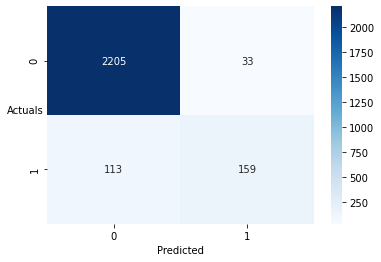

In [1008]:
sns.heatmap((metrics.confusion_matrix(y_train,y_train_p)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [1009]:
print(metrics.classification_report(y_train,y_train_p,digits=3))

              precision    recall  f1-score   support

           0      0.951     0.985     0.968      2238
           1      0.828     0.585     0.685       272

    accuracy                          0.942      2510
   macro avg      0.890     0.785     0.827      2510
weighted avg      0.938     0.942     0.937      2510



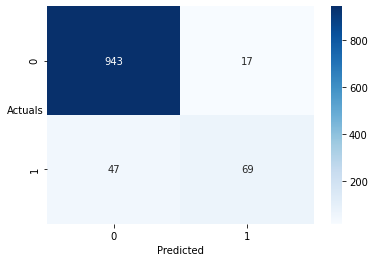

In [1010]:
sns.heatmap((metrics.confusion_matrix(y_test,y_test_p)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [1011]:
print(metrics.classification_report(y_test,y_test_p,digits=3))

              precision    recall  f1-score   support

           0      0.953     0.982     0.967       960
           1      0.802     0.595     0.683       116

    accuracy                          0.941      1076
   macro avg      0.877     0.789     0.825      1076
weighted avg      0.936     0.941     0.937      1076



AUC of the Linear Discriminant Analysis for Train data: 0.963


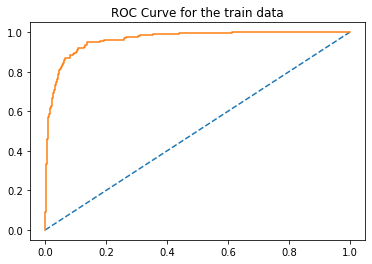

In [1012]:
# predict probabilities
probs = LDAmodel.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lda_train_auc = roc_auc_score(y_train, probs)
print('AUC of the Linear Discriminant Analysis for Train data: %.3f' % lda_train_auc)
# calculate roc curve
lda_train_fpr, lda_train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_train_fpr, lda_train_tpr);
plt.title('ROC Curve for the train data');

AUC of the Linear Discriminant Analysis for Test data: 0.953


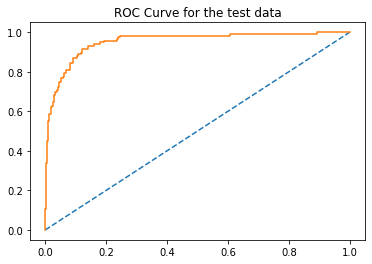

In [1013]:

# predict probabilities
probs = LDAmodel.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lda_test_auc = roc_auc_score(y_test, probs)
print('AUC of the Linear Discriminant Analysis for Test data: %.3f' % lda_test_auc)
# calculate roc curve
lda_test_fpr, lda_test_tpr, train_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_test_fpr, lda_test_tpr);
plt.title('ROC Curve for the test data');

In [1014]:
pred_train_lda_prob = LDAmodel.predict_proba(X_train)[:,1]
pred_test_lda_prob = LDAmodel.predict_proba(X_test)[:,1]

In [1015]:
fpr, tpr, thresholds = roc_curve(y_train,pred_train_lda_prob)

In [1016]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.06143740465501364

In [1017]:
y_class_pred=[]
for i in range(0,len(pred_train_lda_prob)):
    if np.array(pred_train_lda_prob)[i]>0.06:
        a=1
    else:
        a=0
    y_class_pred.append(a)

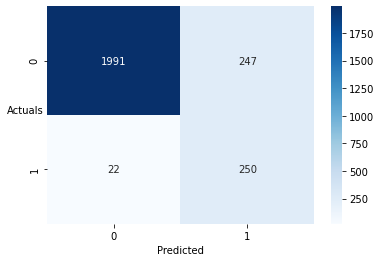

In [1018]:
sns.heatmap((metrics.confusion_matrix(y_train,y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [1019]:
print(metrics.classification_report(y_train,y_class_pred,digits=3))

              precision    recall  f1-score   support

           0      0.989     0.890     0.937      2238
           1      0.503     0.919     0.650       272

    accuracy                          0.893      2510
   macro avg      0.746     0.904     0.793      2510
weighted avg      0.936     0.893     0.906      2510



In [1020]:
y_test_pred=[]
for i in range(0,len(pred_test_lda_prob)):
    if np.array(pred_test_lda_prob)[i]>0.06:
        a=1
    else:
        a=0
    y_test_pred.append(a)

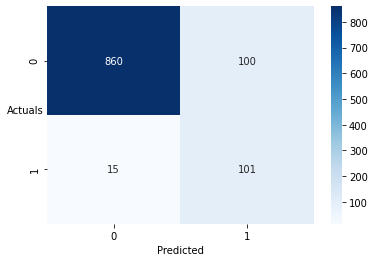

In [1021]:
sns.heatmap((metrics.confusion_matrix(y_test,y_test_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [1022]:
print(metrics.classification_report(y_test,y_test_pred,digits=3))

              precision    recall  f1-score   support

           0      0.983     0.896     0.937       960
           1      0.502     0.871     0.637       116

    accuracy                          0.893      1076
   macro avg      0.743     0.883     0.787      1076
weighted avg      0.931     0.893     0.905      1076



AUC of the Linear Discriminant Analysis for Train data: 0.963


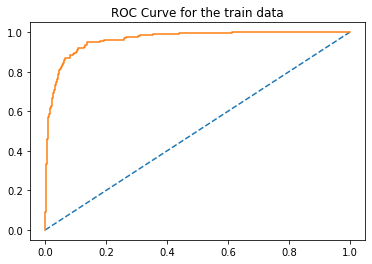

In [1023]:
# predict probabilities
probs = LDAmodel.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lda_train_auc = roc_auc_score(y_train, probs)
print('AUC of the Linear Discriminant Analysis for Train data: %.3f' % lda_train_auc)
# calculate roc curve
lda_train_fpr, lda_train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_train_fpr, lda_train_tpr);
plt.title('ROC Curve for the train data');

AUC of the Linear Discriminant Analysis for Test data: 0.953


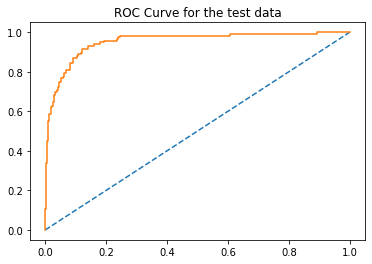

In [1024]:
# predict probabilities
probs = LDAmodel.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lda_test_auc = roc_auc_score(y_test, probs)
print('AUC of the Linear Discriminant Analysis for Test data: %.3f' % lda_test_auc)
# calculate roc curve
lda_test_fpr, lda_test_tpr, train_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_test_fpr, lda_test_tpr);
plt.title('ROC Curve for the test data');

In [1025]:
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score
lda_train_acc = round(accuracy_score(y_train,y_class_pred),2)
lda_train_recall = round(recall_score(y_train,y_class_pred,pos_label=1,average='binary'),2)
lda_train_precision = round(precision_score(y_train,y_class_pred,pos_label=1,average='binary'),2)
lda_train_f1score = round(f1_score(y_train,y_class_pred,pos_label=1,average='binary'),2)

In [1026]:
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score
lda_test_acc = round(accuracy_score(y_test,y_test_pred),2)
lda_test_precision = round(precision_score(y_test,y_test_pred,pos_label=1,average='binary'),2)
lda_test_recall = round(recall_score(y_test,y_test_pred,pos_label=1,average='binary'),2)
lda_test_f1score = round(f1_score(y_test,y_test_pred,pos_label=1,average='binary'),2)

In [1027]:
coef1 = LDAmodel.coef_[0].T
coef1

array([-4.12343781e-01, -1.52505954e-02, -2.98746723e+00,  3.16443693e-01,
        1.60182480e-01,  4.03452180e-01,  2.12548127e-01, -8.67060721e-01,
        8.66012288e-01,  1.82625628e+00, -9.92248788e-01,  2.31037264e+00,
        4.78733619e-01, -8.28307068e-01, -9.69096818e-01, -2.47315894e-01,
       -5.97267298e-01, -4.39158248e-01,  1.68191014e-02,  6.65350622e-01,
       -3.55753666e-01,  2.79645184e-01,  3.07613417e-01, -1.97497269e-01,
        1.62140532e-01,  6.75688031e-03, -2.30066337e-01, -1.18229954e+00,
        3.77869808e-02,  4.98977700e-01,  1.37686877e-01,  2.10576492e-03,
        1.69626180e-01, -7.45899304e-01,  1.25471577e-01,  2.22952018e-02,
        1.26523233e+00, -1.29724363e+00, -2.57112709e-01, -2.92329350e-01,
       -1.49942411e-01,  8.10453133e-02,  7.90482386e-02,  3.58890247e-02,
       -6.02050100e-02, -8.90224841e-02, -4.27227917e-02,  1.20270569e-02,
       -4.17617687e-02, -1.06921311e+00,  1.36947709e-02, -1.50344713e-01,
       -1.51255624e-01, -

In [1028]:
lda_feat_imp = pd.DataFrame(coef1, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False)
lda_feat_imp.head(38)

,Imp
Net_Sales,2.31
Total_Assets_to_Liab,1.83
APATM_perc_Latest,1.27
ROG_Gross_Sales_perc,1.27
Curr_Liab_and_Prov,0.87
PBT,0.67
CEPS_annualised_Unit_Curr,0.50
Other_Income,0.48
Gross_Block,0.40
Value_of_Output_to_Total_Assets,0.33


In [1029]:
lda_feat_imp.tail(20)

,Imp
Selling_Cost,-0.25
ROG_Cost_of_Prod_perc,-0.26
ROG_Total_Assets_perc,-0.29
PAT,-0.36
Co_Code,-0.41
PBDT,-0.44
Debtors_Vel_Days,-0.48
PBIDT,-0.60
Total_Asset_Turnover_Ratio_Latest,-0.68
ROG_Net_Worth_perc,-0.75


Text(0.5, 1.0, 'Importance of Features in LDA')

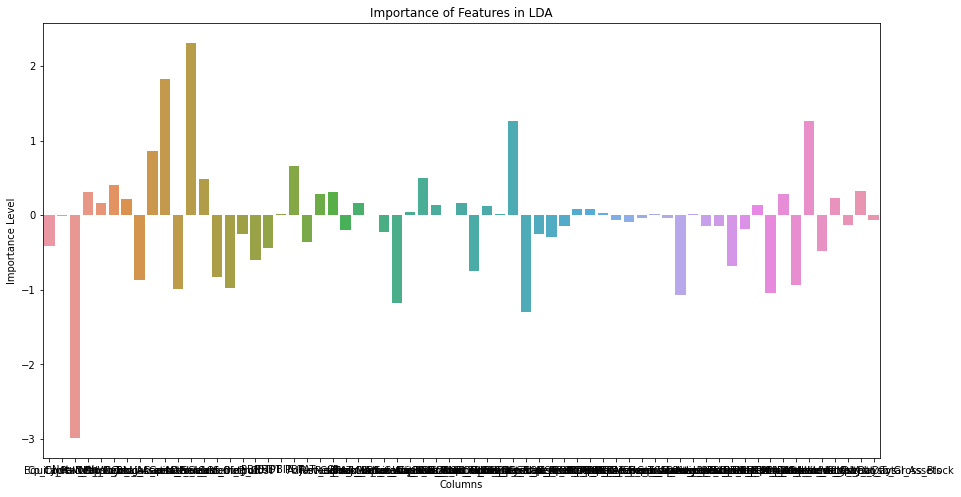

In [1030]:
col = X_train.columns
plt.figure(figsize=(15,8))
sns.barplot(x=col, y=coef1)
plt.xlabel('Columns')
plt.ylabel('Importance Level')
plt.title('Importance of Features in LDA')

In [1031]:
df_credit_imp1= df_credit[['Net_Sales','Total_Assets_to_Liab','APATM_perc_Latest','ROG_Gross_Sales_perc','Curr_Liab_and_Prov','PBT','CEPS_annualised_Unit_Curr','Other_Income','Gross_Block','Value_of_Output_to_Total_Assets','Capital_Employed','CP','PBDTM_perc_Latest','Adjusted_PAT','Creditors_Vel_Days','Net_Working_Capital','Cash_Flow_From_Fin','Rev_exp_in_forex','Total_Debt','Cash_Flow_From_Opr','PBIDTM_perc_Latest','ROG_Capital_Employed_perc','ROG_PBDT_perc','ROG_PBIT_perc','Market_Capitalisation','ROG_PBT_perc','ROG_Gross_Block_perc','PBIT','Fixed_Assets_Ratio_Latest','ROG_Rev_exp_in_forex_perc','Capital_exp_in_forex']]

In [1032]:
X = df_credit_imp1
y = df_credit['default']

In [1033]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42, stratify = y)

In [1034]:
print(X_train.shape)
print(X_test.shape)

(2402, 31)
(1184, 31)


In [1035]:
LDAmodel1 = LinearDiscriminantAnalysis()
LDAmodel1.fit(X_train,y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [1036]:
y_test_p = LDAmodel1.predict(X_test)
y_train_p = LDAmodel1.predict(X_train)

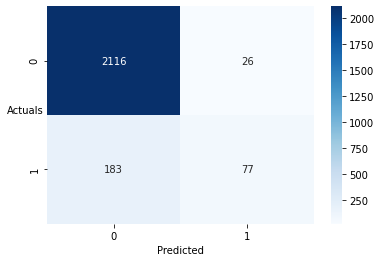

In [1037]:
sns.heatmap((metrics.confusion_matrix(y_train,y_train_p)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [1038]:
print(metrics.classification_report(y_train,y_train_p,digits=3))

              precision    recall  f1-score   support

           0      0.920     0.988     0.953      2142
           1      0.748     0.296     0.424       260

    accuracy                          0.913      2402
   macro avg      0.834     0.642     0.689      2402
weighted avg      0.902     0.913     0.896      2402



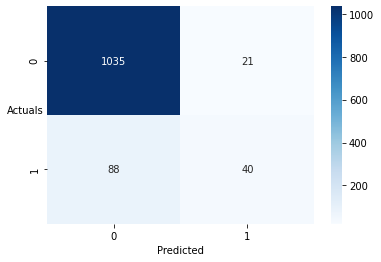

In [1039]:
sns.heatmap((metrics.confusion_matrix(y_test,y_test_p)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [1040]:
print(metrics.classification_report(y_test,y_test_p,digits=3))

              precision    recall  f1-score   support

           0      0.922     0.980     0.950      1056
           1      0.656     0.312     0.423       128

    accuracy                          0.908      1184
   macro avg      0.789     0.646     0.687      1184
weighted avg      0.893     0.908     0.893      1184



In [1041]:
pred_train_lda_prob = LDAmodel1.predict_proba(X_train)[:,1]
pred_test_lda_prob = LDAmodel1.predict_proba(X_test)[:,1]

In [1042]:
fpr, tpr, thresholds = roc_curve(y_train,pred_train_lda_prob)

In [1043]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.0767088435199073

In [1044]:
y_class_pred=[]
for i in range(0,len(pred_train_lda_prob)):
    if np.array(pred_train_lda_prob)[i]>0.07:
        a=1
    else:
        a=0
    y_class_pred.append(a)

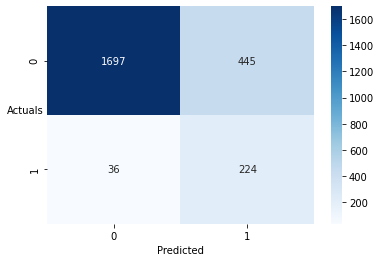

In [1045]:
sns.heatmap((metrics.confusion_matrix(y_train,y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [1046]:
print(metrics.classification_report(y_train,y_class_pred,digits=3))

              precision    recall  f1-score   support

           0      0.979     0.792     0.876      2142
           1      0.335     0.862     0.482       260

    accuracy                          0.800      2402
   macro avg      0.657     0.827     0.679      2402
weighted avg      0.909     0.800     0.833      2402



In [1047]:
y_test_pred=[]
for i in range(0,len(pred_test_lda_prob)):
    if np.array(pred_test_lda_prob)[i]>0.07:
        a=1
    else:
        a=0
    y_test_pred.append(a)

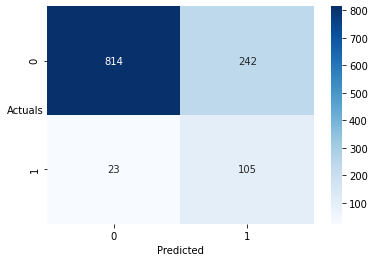

In [1048]:
sns.heatmap((metrics.confusion_matrix(y_test,y_test_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [1049]:
print(metrics.classification_report(y_test,y_test_pred,digits=3))

              precision    recall  f1-score   support

           0      0.973     0.771     0.860      1056
           1      0.303     0.820     0.442       128

    accuracy                          0.776      1184
   macro avg      0.638     0.796     0.651      1184
weighted avg      0.900     0.776     0.815      1184



AUC of the Linear Discriminant Analysis for Train data: 0.896


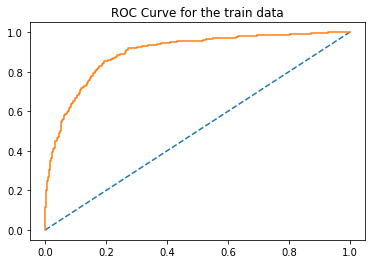

In [1050]:
# predict probabilities
probs = LDAmodel1.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lda_train_auc1 = roc_auc_score(y_train, probs)
print('AUC of the Linear Discriminant Analysis for Train data: %.3f' % lda_train_auc1)
# calculate roc curve
lda_train_fpr1, lda_train_tpr1, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_train_fpr1, lda_train_tpr1);
plt.title('ROC Curve for the train data');

AUC of the Linear Discriminant Analysis for Test data: 0.894


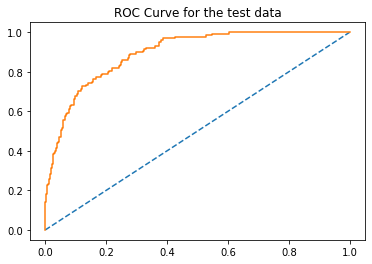

In [1051]:

# predict probabilities
probs = LDAmodel1.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lda_test_auc1 = roc_auc_score(y_test, probs)
print('AUC of the Linear Discriminant Analysis for Test data: %.3f' % lda_test_auc1)
# calculate roc curve
lda_test_fpr1, lda_test_tpr1, train_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_test_fpr1, lda_test_tpr1);
plt.title('ROC Curve for the test data');

In [1052]:
coef2 = LDAmodel1.coef_[0].T
coef2

array([-0.23202268,  1.22247112,  0.46182376, -0.22449348,  0.63512745,
        0.76008334, -0.4847098 ,  0.10288534,  0.32420319, -0.08155392,
       -2.19617367, -0.27468548, -0.36904828, -0.32846572,  0.18311763,
       -0.40817811,  0.1530672 ,  0.00824571,  1.17325562, -0.07536231,
       -0.50022169, -0.41429056,  0.09776623, -0.0623718 , -0.25371547,
        0.05526931, -0.11262147, -0.54522597, -0.3988358 , -0.02188589,
       -0.02441763])

In [1053]:
lda_feat_imp1=pd.DataFrame(coef2, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False)

In [1054]:
lda_feat_imp1.head(20)

,Imp
Total_Assets_to_Liab,1.22
Total_Debt,1.17
PBT,0.76
Curr_Liab_and_Prov,0.64
APATM_perc_Latest,0.46
Gross_Block,0.32
Creditors_Vel_Days,0.18
Cash_Flow_From_Fin,0.15
Other_Income,0.10
ROG_PBDT_perc,0.10


Text(0.5, 1.0, 'Importance of Features in Linear Discriminant Analysis')

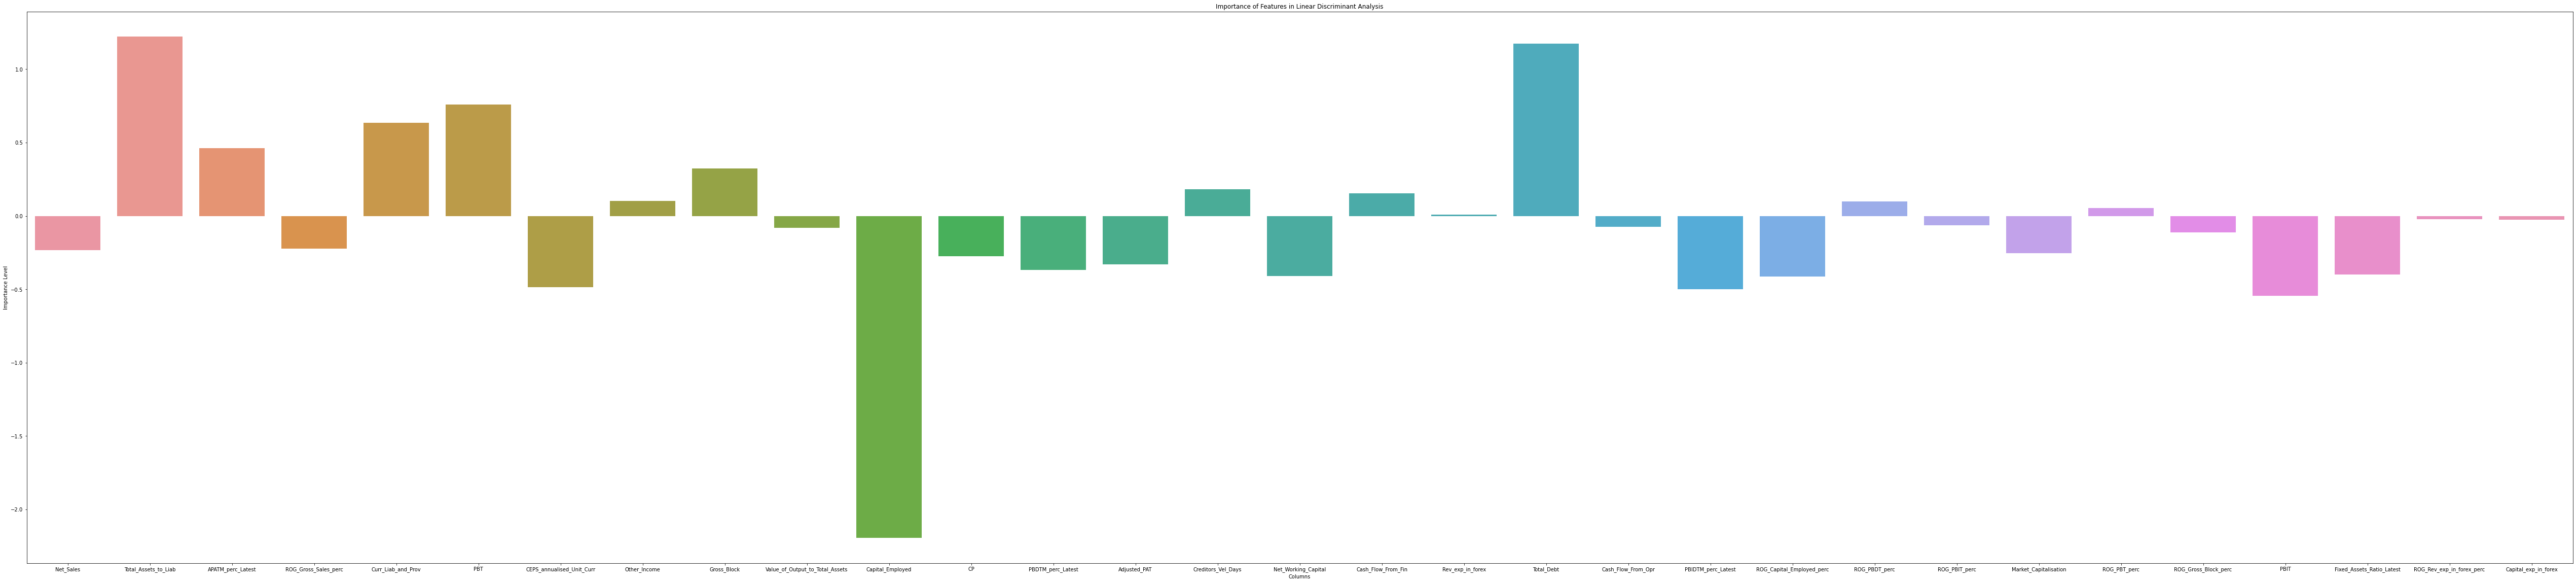

In [1055]:
col = X_train.columns
plt.figure(figsize=(90,20))
sns.barplot(x=col, y=coef2)
plt.xlabel('Columns')
plt.ylabel('Importance Level')
plt.title('Importance of Features in Linear Discriminant Analysis')

In [1056]:
df = pd.DataFrame(data = [[log_train_acc,log_test_acc,rf_train_acc,rf_test_acc,lda_train_acc,lda_test_acc],
                             [log_train_auc,log_test_auc,rf_train_auc,rf_test_auc,lda_train_auc,lda_test_auc], 
                             [log_train_recall,log_test_recall,rf_train_recall,rf_test_recall,lda_train_recall,lda_test_recall],
                             [log_train_precision,log_test_precision,rf_train_precision,rf_test_precision,lda_train_precision,lda_test_precision],
                             [log_train_f1score,log_test_f1score,rf_train_f1score,rf_test_f1score,lda_train_f1score,lda_test_f1score]],
                   columns=['Logit Train', 'Logit Test', 'RF Train', 'RF Test','LDA Train', 'LDA Test'],
                   index=['Accuracy','AUC Score','Recall','Precision','F1 Score'])
round(df,2)

,Logit Train,Logit Test,RF Train,RF Test,LDA Train,LDA Test
Accuracy,0.94,0.93,0.98,0.91,0.89,0.89
AUC Score,0.98,0.97,1.00,0.99,0.96,0.95
Recall,0.92,0.89,0.88,0.87,0.92,0.87
Precision,0.66,0.61,0.90,0.96,0.50,0.50
F1 Score,0.76,0.72,0.89,0.91,0.65,0.64


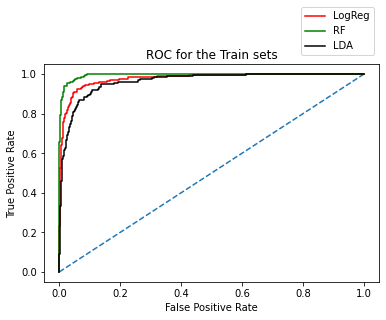

In [1057]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(log_train_fpr, log_train_tpr,color='red',label="LogReg")
plt.plot(rf_train_fpr,rf_train_tpr,color='green',label="RF")
plt.plot(lda_train_fpr,lda_train_tpr,color='black',label="LDA")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for the Train sets')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

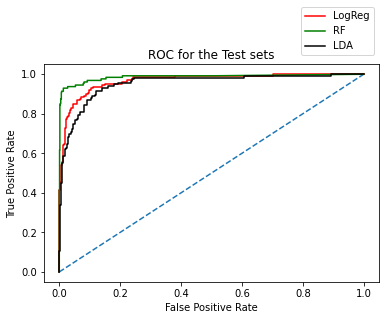

In [1058]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(logr_test_fpr, logr_test_tpr,color='red',label="LogReg")
plt.plot(rf_test_fpr,rf_test_tpr,color='green',label="RF")
plt.plot(lda_test_fpr,lda_test_tpr,color='black',label="LDA")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for the Test sets')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')